In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def tektronixToDict(file):
  d = {}
  c = np.loadtxt(file, delimiter=',', skiprows=0, dtype={'names': ('col1', 'col2', 'col3', 'time', 'val'),'formats': ('S99', 'S99', 'S99', 'S99', 'S99')})
  d[c[0][0] + b' ' + c[0][2]] = int(c[0][1])
  d[c[1][0] + b' ' + c[0][2]] = float(c[1][1])
  d[c[2][0] + b' ' + c[0][2]] = float(c[2][1])ever
  d[c[2][0] + b' ' + c[0][2]] = float(c[2][1])
  d[c[8][0] + b' ' + c[7][1]] = float(c[8][1])
  d[c[11][0] + b' ' + c[10][1]] = float(c[11][1])
  d['date'] = c[16][1]
  d['time'] = []
  d['data'] = []
  for i in c:
    d['time'].append(float(i[3]) - float(c[0][3]))
    d['data'].append(float(i[4]) * 100)
    
  d['time'] = np.array(d['time'])
  d['data'] = np.array(d['data'])
  return d

In [4]:
d = tektronixToDict('logs/test_logs/short_receive.csv')
print(d)

{b'Record Length Points': 2500, b'Sample Interval Points': 0.00019999999495, b'Trigger Point Points': 660.000013097, b'Vertical Scale Volts': 0.20478123589, b'Horizontal Scale s': 0.04999999874, 'date': b'TDS 2001C - 1:26:20 AM   2019/06/09', 'time': array([0.00000000e+00, 2.00003400e-04, 4.00006800e-04, ...,
       4.99399990e-01, 4.99599993e-01, 4.99799997e-01]), 'data': array([1.59999989, 0.79999994, 0.79999994, ..., 0.79999994, 1.59999989,
       0.79999994])}


In [5]:
def duration(d, thresh):
    for t, c in zip(d['time'], d['data']):
        if c > thresh:
            rising_edge = t
            break
    for t, c in zip(d['time'][::-1], d['data'][::-1]):
        if c > thresh:
            falling_edge = t
            break
    return falling_edge - rising_edge

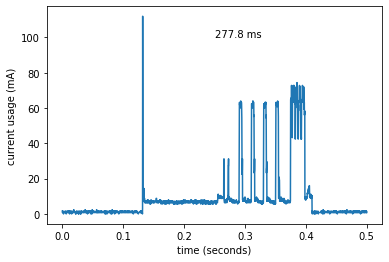

In [6]:
plt.plot(d['time'], d['data'])
plt.ylabel('current usage (mA)')
plt.xlabel('time (seconds)')
plt.text(0.25, 100, ('%.1f ms' % (duration(d, 10) * 1000)))
plt.savefig('img/typical_edrx.png')
plt.show()

In [7]:
dt = d['time'][1:] - d['time'][:-1]

In [8]:
p = d['data'][:-1] * dt
sum(p)

4.659998943113846

In [9]:
# for t, d in zip(dt, d['data']):
#     print(t, d)

In [10]:
d['data']

array([1.59999989, 0.79999994, 0.79999994, ..., 0.79999994, 1.59999989,
       0.79999994])

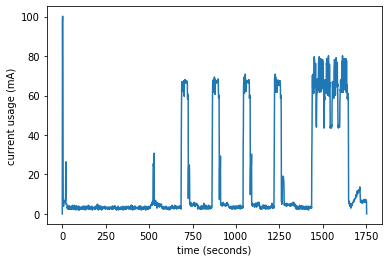

In [11]:
e = np.array([0,198,205,114,56,8,8,8,8,9,12,14,12,13,12,13,13,13,14,17,54,10,10,10,10,10,10,9,6,7,6,6,5,8,6,5,7,8,8,5,8,8,7,5,8,7,6,7,6,6,5,6,5,6,7,6,5,5,9,6,6,6,8,6,5,6,5,5,5,6,9,5,6,6,6,5,6,8,4,6,6,8,5,8,6,5,6,7,6,6,6,8,5,4,6,8,5,6,7,4,7,5,7,6,5,6,6,6,5,7,5,6,7,6,5,6,6,6,5,6,8,5,7,8,5,5,6,5,6,5,8,6,4,6,6,6,6,5,8,6,5,6,7,8,6,7,6,6,6,6,5,9,6,5,8,6,6,5,7,7,5,5,6,7,6,6,7,6,5,6,8,6,6,7,4,5,7,7,6,6,6,6,6,6,6,7,6,5,6,5,5,8,7,5,6,7,6,7,6,8,9,10,10,8,9,8,7,4,5,7,9,6,7,6,5,6,7,6,8,6,5,7,5,8,6,5,4,6,6,5,6,7,6,5,7,7,6,6,7,7,6,7,7,7,6,8,7,5,6,6,6,5,6,6,6,6,7,6,7,6,6,5,6,6,5,5,7,7,6,6,5,6,7,6,6,5,7,6,6,6,6,7,6,6,6,5,7,5,8,6,5,8,7,5,7,7,6,6,6,8,8,7,8,6,6,7,8,6,5,6,6,4,5,6,6,6,6,6,5,6,8,6,4,7,6,5,5,6,6,5,6,6,6,5,7,5,5,5,6,7,5,6,7,6,5,6,6,5,6,8,6,4,6,7,6,5,7,6,5,7,6,6,5,6,6,6,5,8,6,5,7,7,6,6,6,7,6,6,6,6,8,7,6,5,6,7,6,6,7,6,5,5,7,7,7,9,8,5,6,7,9,6,7,6,6,4,6,8,5,7,7,7,5,6,7,5,6,7,8,6,8,7,7,5,7,6,6,6,6,6,6,6,6,7,6,6,6,5,7,6,5,5,7,8,5,7,8,5,8,6,7,5,7,8,6,4,6,6,5,5,7,6,5,6,6,5,6,7,6,6,5,7,7,6,8,6,6,6,6,5,4,8,7,6,5,6,5,5,6,7,6,6,7,5,5,6,7,5,8,6,6,7,6,6,6,7,6,8,7,9,9,9,10,9,10,10,11,10,12,9,13,10,10,41,52,50,49,50,51,63,11,10,9,9,11,10,9,14,9,9,9,11,8,10,12,8,6,10,10,11,9,10,8,9,9,11,8,10,10,7,8,9,10,8,10,10,8,8,9,10,9,10,9,7,6,7,7,6,7,7,6,5,7,5,6,7,7,7,7,7,7,5,6,6,7,8,7,6,6,7,7,7,5,6,5,5,6,6,6,7,6,6,6,6,6,7,4,5,6,5,6,7,6,5,7,7,6,7,7,6,6,7,8,9,7,6,8,6,6,7,7,6,6,6,5,6,8,9,7,7,8,6,6,7,8,6,6,7,8,5,7,7,6,7,7,7,6,7,6,6,6,8,7,6,8,7,7,7,8,8,6,6,7,7,5,74,99,124,137,132,129,135,134,127,136,135,128,134,138,126,132,138,122,137,137,137,139,137,139,136,137,136,138,137,136,137,138,138,137,137,137,121,119,120,121,124,16,44,50,50,51,50,50,39,10,10,11,9,9,10,12,8,10,10,9,9,9,10,9,8,9,10,10,9,10,9,10,11,12,10,9,10,8,10,10,10,8,10,11,9,9,11,10,10,10,10,10,9,10,8,7,5,9,7,7,6,6,6,6,6,7,6,5,6,7,6,7,7,5,8,5,8,5,8,8,8,5,7,8,7,7,7,6,7,6,11,7,5,7,9,6,7,9,8,6,7,7,5,9,7,7,7,6,6,5,6,7,8,8,7,6,6,5,9,8,6,8,7,7,6,8,7,5,7,7,7,6,8,6,6,6,7,7,52,76,117,135,136,131,139,138,126,133,139,127,132,142,127,131,140,124,136,138,138,136,137,138,136,137,136,136,138,137,138,139,137,137,137,140,126,120,120,121,123,65,15,48,49,51,52,48,60,14,9,9,11,11,10,10,10,10,8,9,10,9,10,9,12,10,9,10,9,10,10,10,9,9,9,10,8,10,10,8,9,10,9,9,10,11,9,12,9,10,10,9,10,9,9,9,7,7,7,7,7,6,7,7,6,6,7,7,8,6,7,6,5,7,7,6,8,7,5,6,7,7,6,8,6,8,7,7,7,5,8,8,6,7,7,7,8,5,7,6,8,6,8,7,6,7,8,6,6,6,7,6,7,8,6,6,9,8,6,6,8,6,5,9,9,6,7,7,6,6,7,7,6,7,8,8,6,7,7,75,87,132,137,126,135,142,125,132,142,127,130,145,129,129,139,127,127,137,138,137,137,138,138,138,136,137,137,138,136,137,139,136,138,139,137,120,123,121,120,123,20,42,49,50,50,51,50,62,11,9,9,10,11,8,10,9,10,9,9,9,9,9,10,9,7,8,9,9,10,11,10,9,9,11,9,7,11,10,8,9,11,11,8,10,12,10,10,10,9,10,12,10,10,9,6,7,6,7,6,6,5,6,8,5,7,7,6,5,6,7,6,7,9,8,7,9,9,6,6,6,6,6,6,7,9,6,7,7,5,9,7,7,7,7,8,6,5,7,6,7,6,7,6,6,8,7,5,7,7,7,6,7,7,6,6,8,7,6,7,8,7,7,7,7,7,11,8,7,6,7,7,6,7,8,7,6,7,39,76,114,141,126,133,145,128,131,142,130,130,139,130,130,137,131,126,135,136,137,137,139,136,138,138,137,133,138,138,137,138,137,137,138,138,134,120,121,120,123,105,13,13,10,12,12,12,39,36,37,38,37,39,36,36,33,27,10,9,10,11,10,10,9,10,9,10,10,8,9,10,10,8,11,10,10,9,10,9,9,10,9,9,9,10,10,9,9,10,10,8,9,10,9,10,8,10,9,9,10,10,11,10,9,9,9,12,10,9,11,9,10,12,10,10,8,10,10,9,9,9,10,7,6,9,7,6,5,8,7,7,6,7,5,8,7,6,5,7,6,5,6,6,6,5,6,9,6,8,6,7,7,6,8,5,7,8,7,8,8,7,6,5,7,8,5,8,6,6,6,6,7,6,5,7,6,6,5,7,5,6,8,7,5,6,5,7,8,6,7,5,6,7,6,5,6,8,4,6,6,6,7,7,7,7,6,8,7,7,7,6,7,7,7,7,6,59,75,118,136,144,130,134,145,128,133,144,125,155,159,163,161,159,155,133,137,131,154,156,134,134,100,91,90,116,124,126,130,140,126,132,140,128,130,141,157,156,158,155,163,157,133,126,139,158,154,158,160,161,159,140,127,132,159,154,159,160,156,160,141,130,130,158,132,135,134,93,89,108,122,118,133,139,125,133,139,125,130,126,126,156,155,161,160,156,159,129,123,132,156,149,161,164,159,156,125,122,140,155,132,134,136,89,90,91,90,90,92,90,89,91,92,91,117,118,137,134,127,135,136,127,134,137,120,148,155,160,160,158,157,136,142,123,153,157,159,162,158,156,132,138,132,156,157,132,135,110,91,92,89,90,92,90,91,91,91,90,95,117,123,129,128,139,132,128,136,133,126,138,158,153,158,159,164,160,140,126,132,159,154,161,157,156,161,143,129,129,159,151,161,160,155,161,137,129,126,159,126,134,134,120,121,119,123,125,123,122,87,14,12,11,12,13,12,8,9,10,9,9,10,8,6,10,8,9,8,10,10,9,10,11,11,12,12,12,12,12,14,13,13,15,15,15,15,16,16,16,16,17,17,18,20,18,19,18,21,22,21,24,23,22,21,23,24,23,24,25,24,23,24,25,24,26,28,22,16,13,12,13,13,12,14,13,14,13,13,11,11,13,12,14,13,14,14,13,13,12,15,13,13,12,13,13,13,12,13,15,13,14,14,14,13,0,])
# 1752
t = 277
tStep = t / len(e)
e = e / 1023 * 5 * 100
plt.plot(e)
plt.ylabel('current usage (mA)')
plt.xlabel('time (seconds)')
# plt.text(0.25, 100, ('%.1f ms' % (duration(d, 10) * 1000)))
plt.savefig('img/arduino_edrx.png')
plt.show()

In [12]:
tStep

0.15792474344355759

In [13]:
tStep * sum(e) / 1000

4.839552047491486

# Module comparison

In [14]:
ps = power_saving = {}
ps['ublox_psm_drx'] = [3, 6] # deep sleep, active
ps['ublox_tx_rx'] = [220, 46]
ps['quectel'] = [3.6]
ps['nordic'] = [3, 7] # psm, edrx
ps['nordic_1kB_12hrs'] = [5.5]
ps['nordic_gps_coords_2.7min'] = [750]
ps['simcom'] = [3.4, 236]
ps

{'ublox_psm_drx': [3, 6],
 'ublox_tx_rx': [220, 46],
 'quectel': [3.6],
 'nordic': [3, 7],
 'nordic_1kB_12hrs': [5.5],
 'nordic_gps_coords_2.7min': [750],
 'simcom': [3.4, 236]}

In [15]:
pc = power_consumption = {}
pc['ublox'] = []
pc['quectel'] = []
ps['quectel_idle_@drx=1.28s'] = [2000]
pc['nordic_downlink'] = [150]
pc['simcom'] = []

# SimCom current measurements

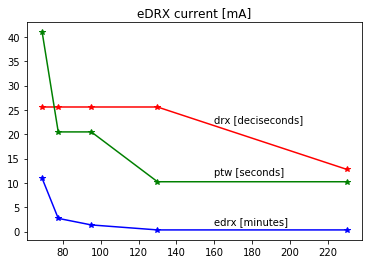

In [16]:
drx = np.array([1.28, 2.56, 2.56, 2.56, 2.56]) * 10
ptw = np.array([10.24, 10.24, 20.48, 20.48, 40.96])
edrx = np.array([20.48, 20.48, 81.92, 162.84, 655.36]) / 60
typical_uA = np.array([230, 130, 95, 77.5, 69])

plt.figure()
plt.title('eDRX current [mA]')
plt.plot(typical_uA, drx, 'r-*')
plt.plot(typical_uA, ptw, 'g-*')
plt.plot(typical_uA, edrx, 'b-*')
plt.text(160, 22.5, 'drx [deciseconds]')
plt.text(160, 11.5, 'ptw [seconds]')
plt.text(160, 1.5, 'edrx [minutes]')
plt.show()

In [17]:
def qf(x, y, title):
    plt.figure()
    plt.title(title)
    plt.plot(x, y, '-*')
    plt.show()
# qf(bp[:,0], bp[:,1], txt[1])

## bandpower from docs

In [18]:
bp = 'bandpower'

txt = ['band', '23dBm', '13dBm', '3dbm', 'freq'] # mA
xu = [23, 13, 3, -7, -40]
bpu = np.array( \
[[8, 222, 100, 78, 75, 74, 0.9],
[5, 222, 100, 78, 75, 74, 0.85],
[20,  222, 100, 78, 75, 74, 0.8],
[28,  222, 100, 78, 75, 74, 0.7]])

txt = ['band', '23dBm', '12dBm', '0dbm', 'freq'] # mA
xq = [23, 12, 0]
bpq = np.array( \
[[8, 220, 80, 65, 0.9],
[5, 220, 80, 65, 0.85],
[20,  220, 80, 65, 0.8],
[28,  250, 80, 65, 0.7]])

txt = ['band', '23dBm', '10dBm', '0dbm', 'freq'] # mA
xn = [23, 10, 0]
# bpn = np.array( \
# [[4, 140, 55, 45, 2.09],
# [3, 140, 55, 45, 1.8],
# [20,  110, 50, 45, 0.8],
# [13,  105, 50, 45, 0.7]])
bpn = np.array( \
[[4, 365, 90, 65, 2.1],
[3, 380, 95, 65, 1.8],
[20,  275, 85, 60, 0.8],
[13,  255, 80, 60, 0.7]])

txt = ['band', '23dBm', '10dBm', '0dbm', 'freq'] # mA
xs = [23, 10, 0]
bps = np.array( \
[[1, 134, 42, 32, 2.1],
[3, 116, 44, 31, 1.8],
[8, 128, 35, 25, 0.9],
[5, 116, 35, 25, 0.85],
[20,  113, 34, 26, 0.8],
[28,  126, 38, 27, 0.7]])

# bpu.T[-1] = bpu[:,-1] / 1000.0
# bpq.T[-1] = bpq[:,-1] / 1000.0
# bpn.T[-1] = bpn[:,-1] / 1000.0
# bps.T[-1] = bps[:,-1] / 1000.0

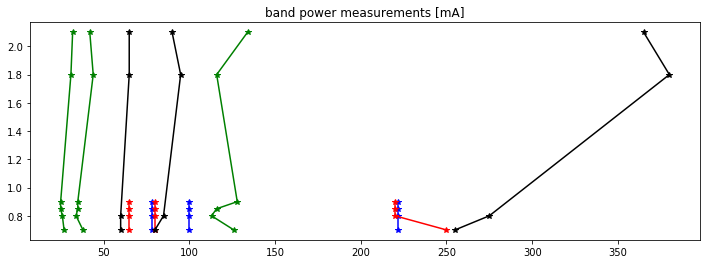

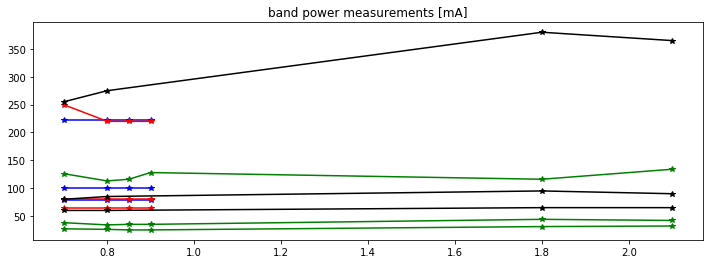

In [19]:
plt.figure(figsize=(12,4))
plt.title('band power measurements [mA]')

plt.plot(bpu[:,1], bpu[:,-1], 'b-*')
plt.plot(bpu[:,2], bpu[:,-1], 'b-*')
plt.plot(bpu[:,3], bpu[:,-1], 'b-*')

plt.plot(bpq[:,1], bpq[:,-1], 'r-*')
plt.plot(bpq[:,2], bpq[:,-1], 'r-*')
plt.plot(bpq[:,3], bpq[:,-1], 'r-*')
               
plt.plot(bpn[:,1], bpn[:,-1], 'k-*')
plt.plot(bpn[:,2], bpn[:,-1], 'k-*')
plt.plot(bpn[:,3], bpn[:,-1], 'k-*')

plt.plot(bps[:,1], bps[:,-1], 'g-*')
plt.plot(bps[:,2], bps[:,-1], 'g-*')
plt.plot(bps[:,3], bps[:,-1], 'g-*')

plt.show()

plt.figure(figsize=(12,4))
plt.title('band power measurements [mA]')

plt.plot(bpu[:,-1], bpu[:,1], 'b-*')
plt.plot(bpu[:,-1], bpu[:,2], 'b-*')
plt.plot(bpu[:,-1], bpu[:,3], 'b-*')

plt.plot(bpq[:,-1], bpq[:,1], 'r-*')
plt.plot(bpq[:,-1], bpq[:,2], 'r-*')
plt.plot(bpq[:,-1], bpq[:,3], 'r-*')
               
plt.plot(bpn[:,-1], bpn[:,1], 'k-*')
plt.plot(bpn[:,-1], bpn[:,2], 'k-*')
plt.plot(bpn[:,-1], bpn[:,3], 'k-*')

plt.plot(bps[:,-1], bps[:,1], 'g-*')
plt.plot(bps[:,-1], bps[:,2], 'g-*')
plt.plot(bps[:,-1], bps[:,3], 'g-*')

plt.show()

In [ ]:
# yint = range(min(y), math.ceil(max(y))+1)
# matplotlib.pyplot.yticks(yint)

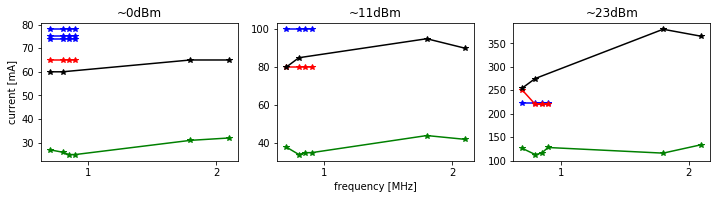

In [23]:
h = 12
plt.figure(figsize=(h,h*3))
plt.title('band power measurements [mA]')

plt.subplot(h,3,1)
plt.title('~0dBm')
plt.ylabel('current [mA]')
plt.xticks([1, 2])
plt.plot(bpu[:,-1], bpu[:,3], 'b-*')
plt.plot(bpu[:,-1], bpu[:,4], 'b-*')
plt.plot(bpu[:,-1], bpu[:,5], 'b-*')
plt.plot(bpq[:,-1], bpq[:,3], 'r-*')
plt.plot(bpn[:,-1], bpn[:,3], 'k-*')
plt.plot(bps[:,-1], bps[:,3], 'g-*')

plt.subplot(h,3,2)
plt.title('~11dBm')
plt.xlabel('frequency [MHz]')
plt.xticks([1, 2])
plt.plot(bpu[:,-1], bpu[:,2], 'b-*')
plt.plot(bpq[:,-1], bpq[:,2], 'r-*')
plt.plot(bpn[:,-1], bpn[:,2], 'k-*')
plt.plot(bps[:,-1], bps[:,2], 'g-*')

plt.subplot(h,3,3)
plt.title('~23dBm')
plt.xticks([1, 2])
plt.plot(bpu[:,-1], bpu[:,1], 'b-*')
plt.plot(bpq[:,-1], bpq[:,1], 'r-*')
plt.plot(bpn[:,-1], bpn[:,1], 'k-*')
plt.plot(bps[:,-1], bps[:,1], 'g-*')

plt.show()

In [127]:
yu = np.apply_along_axis(np.mean, 1, bpu[:,1:-1].T)
# xu = xu[:-2]
yq = np.apply_along_axis(np.mean, 1, bpq[:,1:-1].T)
yn = np.apply_along_axis(np.mean, 1, bpn[:,1:-1].T)
ys = np.apply_along_axis(np.mean, 1, bps[:,1:-1].T)

In [ ]:
plt.figure(figsize=(12,3))
plt.title('current [mA] vs tx power [dBm]')
plt.plot(xu, yu, 'b-*')
plt.plot(xq, yq, 'r-*')
plt.plot(xn, yn, 'k-*')
plt.plot(xs, ys, 'g-*')
plt.show()

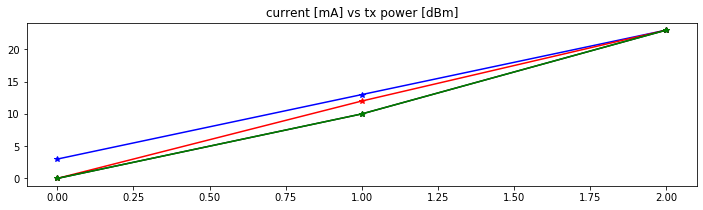

In [197]:
plt.figure(figsize=(12,3))
plt.title('current [mA] vs tx power [dBm]')
plt.plot(xu[2::-1], 'b-*')
plt.plot(xq[::-1], 'r-*')
plt.plot(xn[::-1], 'k-*')
plt.plot(xs[::-1], 'g-*')
plt.show()

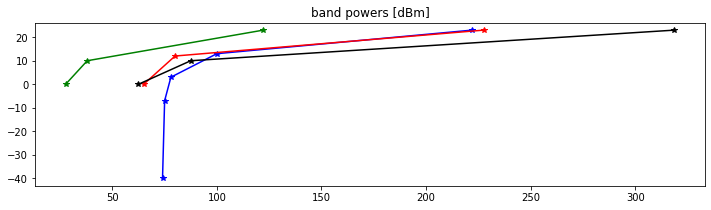

In [148]:
plt.figure(figsize=(12,3))
plt.title('band powers [dBm]')
plt.plot(yu, xu, 'b-*')
plt.plot(yq, xq, 'r-*')
plt.plot(yn, xn, 'k-*')
plt.plot(ys, xs, 'g-*')
plt.show()

# Quectel current measurements

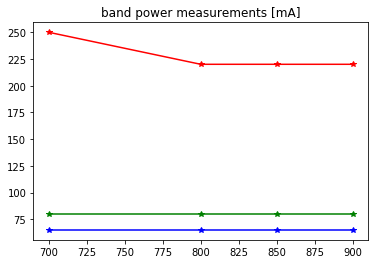

In [73]:
txt = ['band', '23dBm', '12dBm', '0dbm', 'freq'] # mA
qbandpower = \
[[8, 220, 80, 65, 900],
[5, 220, 80, 65, 850],
[20,  220, 80, 65, 800],
[28,  250, 80, 65, 700]]

qbp = np.array(qbandpower)
# qf(bp[:,0], bp[:,1], txt[1])
plt.figure()
plt.title('band power measurements [mA]')
plt.plot(bp[:,4], bp[:,1], 'r-*')
plt.plot(bp[:,4], bp[:,2], 'g-*')
plt.plot(bp[:,4], bp[:,3], 'b-*')
# plt.text(1600, 121, '23dBm')
# plt.text(1600, 45, '10dBm')
# plt.text(1600, 32, '0dBm')
plt.show()

# Empirical analysis

The goal of this thesis is to evaluate NB-IoT from the perspective of an application developer, technology adopter or cellular operator in terms of the UE and NW.

The following metrics will be measured:
* UE/NW behavior
* Energy Consumption
* Latency/Delay
* Cost
* Coverage

It will make use of the following UE Vendors:
* U-blox
* Quectel
* SimCom
* Nordic

And it will be tested against the following NW Vendors:

| BSS Manufacturer | Cellular operator |
| ---------------- | ----------------- |
| Huawei           | Vodacom           |
| Ericsson         | MTN               |
| ZTE              | MTN               |
| Nokia            | Vodacom           |

## Literature study

### UE/NW Behavior

Martinez did an empirical evaluation of NB-IoT using U-blox and Quectel on the Vodafone network in the Metropolitan area of Barcelona.

Starting off the UE behavior was evaluated by sending a datagram of 512 bytes with different network settings and current traces were measured.

![](martinez/release.jpg "")

The connection is immediately released after sending the datagram, thus preventing C-DRX cycles of idle listening. I-DRX is also disabled by setting the Active Timer to zero. This setting provides minimal power.

In [233]:
!pytest -vm setup

============================= test session starts =============================
platform win32 -- Python 3.7.3, pytest-4.6.2, py-1.8.0, pluggy-0.12.0 -- c:\users\d7rob\appdata\local\programs\python\python37\python.exe
cachedir: .pytest_cache
rootdir: C:\GIT\masters\code, inifile: pytest.ini
collecting ... collected 18 items / 11 deselected / 7 selected

test_setup.py::test_AT PASSED                                            [ 14%]
test_setup.py::test_NCONFIG PASSED                                       [ 28%]
test_setup.py::test_URC PASSED                                           [ 42%]
test_setup.py::test_CFUN PASSED                                          [ 57%]
test_setup.py::test_COPS FAILED                                          [ 71%]
test_setup.py::test_CEREG FAILED                                         [ 85%]
test_setup.py::test_ping FAILED                                          [100%]

================================== FAILURES ===================================
___

![](martinez/cdrx.jpg "")

The UE is listening for the control channel (NPDCCH) in C-DRX. The network connection is released 20 s after sending the datagram, which is the expiration time of the Inactivity Timer. I-DRX is disabled.


![](martinez/idrx.jpg "")

The connection is immediately released after sending the datagram (No DRX). The module continues listening in I-DRX for 20 seconds. This value is controlled by the Active Timer.


![](martinez/edrx.jpg "")

Same settings as in figure above. In this case, a downlink message is noticed while listening in I-DRX. When the message is downloaded, it triggers a C-DRX cycle until Inactivity Timer expires.

### Performance analysis

Operational boundaries for NB-IoT are explorerd in terms of energy consumption, latency and reliability. Three different UE and NW configuration modes are used throughout the study.

| Mode       | NW Configuration                                             |
| ---------- | ------------------------------------------------------------ |
| **Mode 1** | Inactivity timer = 20s (network default)<br />T3324 = 0s (disabled)<br />C-DRX = 2.048s (network default) |
| **Mode 2** | Inactivity timer = Immediate Release<br />T3324 = 8s<br />I-DRX = 2.56s<br />eDRX/PTW = Disabled |
| **Mode 3** | Inactivity timer = Immediate Release<br />T3324 = 0s (disabled) |

![](martinez/mode_energy.jpg "")

Energy consumed when sending a single datagram using the three network settings defined in Table II for each of the tested platforms.

![](martinez/payload_energy.jpg "")

Energy expenditure per datagram by payload size for each platform.

![](martinez/snr_energy.jpg "")

Energy per datagram as a function of the SNR reported by the UE after completing transmission.

![](martinez/paging_energy.jpg "")

Histograms of the energy corresponding to the peaks produced by listening for paging occasions, compiled in the set of all tests.

![](martinez/delay_energy.jpg "")

Delay of arrival to the server and its relationship to the energy measured on the device. The dots are split by colors according to the enforced attenuation.

![](martinez/ecl_energy.jpg "")

Delivery delay and its relationship to the energy measured. The dots are split according to the reported ECL after transmission.

![](martinez/lora_energy.jpg "")

Boxplot representation of NBIoT energy traces compared to LoRaWAN. The median, first and third quartiles are depicted with the box. The whiskers indicate 5th-95th percentiles and the black cross the mean value. LoRaWAN values are depicted for different spreading factors and size.

# Design test results

For ZTE and U-blox the same results are achieved, except that the inactivity timer is 300 seconds and not 20s.

# Capabilities

What all can I do?
For a start, I can use AT commands on different UE and NW vendors.
Each vendor has different configurations.
I can measure current usage and timing on all the vendors.

I need to be creative. I've been very very unproductive over the course of my masters, but mostly because I reach stumbling blocks which are  essentially things that other people have already done. I hate redoing things.

From the perspective of an end user, they would appreciate the technology working.


## Ublox Application Development Guide

* AT commands
* NW Registration
* BSS Scanning
* RRC Connection & Release
* PTW, eDRX, PSM
* UDP
* CoAP
* Non-ip messaging
* Operation tests
* Debugging
* Power profile
* Design for reduced power consumption
* NW architecture mapping on AT commands
* NB-IoT best practices
* FOTA
* End user test
* Datagram messages with Huawei Ocean connect

* AT commands
    * AT+CLAC? for the full list
    * Compare list with datasheet
* NW Registration
    * AT+COPS?
    * how long does it really take?
    * how much energy?
* BSS Scanning
    * does it see the other towers?
* RRC Connection & Release
    * C-DRX
* PTW, eDRX, PSM
* UDP
    * 512, 200 byte messages
    * which values area actually available?
* CoAP
    * ?
* Non-ip messaging
    * ?
* Operation tests
    * band, sim, cops?=?, ping, echo, T3324, T3412
* Debugging
    * What do things mean?
* Power profile
    * current measurement
* Design for reduced power consumption
    * reference. not doing
* NW architecture mapping on AT commands
    * hmmmm
* NB-IoT best practices
    * add to this
* FOTA
    * if it works?
* End user test
    * RX, TX
* Datagram messages with Huawei Ocean connect
    * CoAP over UDP. Server not always available

## MTN Tests

* Testing connection between base station and UE
* GSM drive test
    * Handover failures
    * Call drops
    * 

## My own design tests

* Drive test
    * RSSI, coverage
    * Send UDP packet every 5 seconds
    * Measure RSSI in IDRX mode
    * Measure RSSI in CDRX mode
    * Latency
* Debug log viewer
    * Cost
* eDRX

In [134]:
# tPeriodicTau = [600, 3600, 36000, 2, 30, 60, 1152000, 0]
# tActive = [2, 60, 360, 0]

# tPeriodicTauFull = []
# tActiveFull = []

# for i in range(1, 8):
#     for p in tPeriodicTau:
#         tPeriodicTauFull.append(p * i)
#     for a in tActive:
#         tActiveFull.append(a * i)

# tPeriodicTauFull.sort() # sort
# tPeriodicTauFull = np.trim_zeros(tPeriodicTauFull) # remove zeros
# tPeriodicTauFull = list(dict.fromkeys(tPeriodicTauFull)) # remove duplicates
# print(tPeriodicTauFull)

# tActiveFull.sort() # sort
# tActiveFull = np.trim_zeros(tActiveFull) # remove zeros
# tActiveFull = list(dict.fromkeys(tActiveFull)) # remove duplicates
# print(tActiveFull)

In [247]:
# 
config = []
for p in tPTW:
    for ec in tEDRX:
        for a in tActive:
            for tau in tPeriodicTau:
                active =  min(a, tau)
                ecycle = min(ec, a, tau)
                page =  min(p, ec, a, tau)
                c = [page, ecycle, active, tau]
                for i in config:
                    if i == c:
                        break
                else:
                    print(c)
                    config.append(c)
                
                

[2, 2, 2, 2]
[2, 2, 2, 4]
[2, 2, 2, 6]
[2, 2, 2, 8]
[2, 2, 2, 10]
[2, 2, 2, 12]
[2, 2, 2, 14]
[2, 2, 2, 30]
[2, 2, 2, 60]
[2, 2, 2, 90]
[2, 2, 2, 120]
[2, 2, 2, 150]
[2, 2, 2, 180]
[2, 2, 2, 210]
[2, 2, 2, 240]
[2, 2, 2, 300]
[2, 2, 2, 360]
[2, 2, 2, 420]
[2, 2, 2, 600]
[2, 2, 2, 1200]
[2, 2, 2, 1800]
[2, 2, 2, 2400]
[2, 2, 2, 3000]
[2, 2, 2, 3600]
[2, 2, 2, 4200]
[2, 2, 2, 7200]
[2, 2, 2, 10800]
[2, 2, 2, 14400]
[2, 2, 2, 18000]
[2, 2, 2, 21600]
[2, 2, 2, 25200]
[2, 2, 2, 36000]
[2, 2, 2, 72000]
[2, 2, 2, 108000]
[2, 2, 2, 144000]
[2, 2, 2, 180000]
[2, 2, 2, 216000]
[2, 2, 2, 252000]
[2, 2, 2, 1152000]
[2, 2, 2, 2304000]
[2, 2, 2, 3456000]
[2, 2, 2, 4608000]
[2, 2, 2, 5760000]
[2, 2, 2, 6912000]
[2, 2, 2, 8064000]
[2.56, 4, 4, 4]
[2.56, 4, 4, 6]
[2.56, 4, 4, 8]
[2.56, 4, 4, 10]
[2.56, 4, 4, 12]
[2.56, 4, 4, 14]
[2.56, 4, 4, 30]
[2.56, 4, 4, 60]
[2.56, 4, 4, 90]
[2.56, 4, 4, 120]
[2.56, 4, 4, 150]
[2.56, 4, 4, 180]
[2.56, 4, 4, 210]
[2.56, 4, 4, 240]
[2.56, 4, 4, 300]
[2.56, 4, 4, 360]

In [325]:
c = np.array(config)
c.shape

(36416, 4)

In [250]:
8064000/3600/24

93.33333333333333

In [287]:
np.set_printoptions(precision=1, suppress=True)
for ed in tEDRX:
    if ed in tPTW:
        print('edrx:', ed)
        ac = np.array(tActive)/ed
        print(ac)
#         for a in ac:
#             if a

edrx: 10.24
[  0.2   0.4   0.6   0.8   1.    1.2   1.4   5.9  11.7  17.6  23.4  29.3
  35.2  41.   70.3 105.5 140.6 175.8 210.9 246.1]
edrx: 20.48
[  0.1   0.2   0.3   0.4   0.5   0.6   0.7   2.9   5.9   8.8  11.7  14.6
  17.6  20.5  35.2  52.7  70.3  87.9 105.5 123. ]
edrx: 40.96
[ 0.   0.1  0.1  0.2  0.2  0.3  0.3  1.5  2.9  4.4  5.9  7.3  8.8 10.3
 17.6 26.4 35.2 43.9 52.7 61.5]


In [297]:
edrx10=[0.2,0.4,0.6,0.8,1.0,1.2,1.4,5.9,11.7,17.6,23.4,29.3,35.2,41.0,70.3,105.5,140.6,175.8,210.9,246.1]
edrx20=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,2.9,5.9, 8.8, 11.7,14.6,17.6,20.5,35.2,52.7, 70.3, 87.9, 105.5,123.]
edrx40=[0.0,0.1,0.1,0.2,0.2,0.3,0.3,1.5,2.9, 4.4, 5.9, 7.3, 8.8, 10.3,17.6,26.4, 35.2, 43.9, 52.7, 61.5]

In [298]:
for i in edrx10:
    if i % 1 == 0:
        print(i)

1.0
41.0


In [302]:
41*10.24

419.84000000000003

In [303]:
420/60

7.0

In [299]:
for i in edrx20:
    if i % 1 == 0:
        print(i)

123.0


In [301]:
123*20.48

2519.04

In [304]:
2400/60

40.0

In [300]:
for i in edrx40:
    if i % 1 == 0:
        print(i)

0.0


In [305]:
2621.44/60

43.690666666666665

In [316]:
2520/60

42.0

In [313]:
np.array(tPeriodicTau)/2520.0

array([   0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,    0. ,
          0. ,    0. ,    0. ,    0.1,    0.1,    0.1,    0.1,    0.1,
          0.1,    0.2,    0.2,    0.5,    0.7,    1. ,    1.2,    1.4,
          1.7,    2.9,    4.3,    5.7,    7.1,    8.6,   10. ,   14.3,
         28.6,   42.9,   57.1,   71.4,   85.7,  100. ,  457.1,  914.3,
       1371.4, 1828.6, 2285.7, 2742.9, 3200. ])

In [315]:
(np.array(tPeriodicTau)/2520.0)[21]

0.9523809523809523

In [ ]:
tPeriodicTau

In [307]:
tPO = 1.28
tIDRX = [1.28, 2.56, 5.12, 7.68]
tEDRX = [10.24, 20.48, 40.96, 81.92, 163.84,
         327.68, 655.36, 1310.72, 1966.08, 2621.44]
tPTW = [2.56, 5.12, 7.68, 10.24, 12.8, 15.36, 17.92, 20.48,
        23.04, 25.6, 28.16, 30.72, 33.28, 35.84, 38.4, 40.96]
tActive = [2, 4, 6, 8, 10, 12, 14, 60, 120, 180, 240,
           300, 360, 420, 720, 1080, 1440, 1800, 2160, 2520]
tPeriodicTau = [2, 4, 6, 8, 10, 12, 14, 30, 60, 90, 120, 150, 180, 210, 240, 300, 360, 420, 600, 1200, 1800, 2400, 3000, 3600, 4200, 7200, 10800,
                14400, 18000, 21600, 25200, 36000, 72000, 108000, 144000, 180000, 216000, 252000, 1152000, 2304000, 3456000, 4608000, 5760000, 6912000, 8064000]

In [245]:
class edrx:
    def __init__(self):
        self.x = [0]
        self.y = [0]
        self.config = []
        self.xy = []

    def add(self, val, duration):
        self.x.append(self.x[-1])
        self.x.append(self.x[-1] + duration)
        self.y.append(val)
        self.y.append(val)
        
    def types(self):
        self.config = []
        self.xy = []
        for tau in tPeriodicTau:
            for a in tActive:
                for ec in tEDRX:
                    for p in tPTW:
                        self.param(2, 5, tau, a, ec, p, tIDRX[1], 1)

    def param(self, tMOT, tInactivity, tPeriodicTau, tActive, tEDRX, tPTW, tIDRX, repeat):
        self.x = [0]
        self.y = [0]
        
        # clamp overshoot
        tActive = min(tActive, tPeriodicTau)
        tEDRX = min(tEDRX, tActive, tPeriodicTau)
        tPTW = min(tPTW, tEDRX, tActive, tPeriodicTau)
        
        for i in self.config:
            if i == [tMOT, tInactivity, tPeriodicTau, tActive, tEDRX, tPTW, tIDRX, repeat]:
                return
            
        self.config.append([tMOT, tInactivity, tPeriodicTau, tActive, tEDRX, tPTW, tIDRX, repeat])

        for r in range(repeat):
            self.add(2, tMOT)
            self.add(0, 0.2)
            self.add(1, tInactivity)
            self.add(0, 0.2)

            for EDRX in range(int(tActive/tEDRX)):
                for DRX in range(int(tPTW/tIDRX)):
                    self.add(0, 2.286)
                    self.add(1, 0.274)

                self.add(0, tEDRX - tPTW)

            self.add(0, tPeriodicTau - tEDRX)
        
        # print('[self.x, self.y]', [self.x, self.y])
        for i in self.xy:
            # print('[i      ', i == [self.x, self.y], ']', i)
            if i == self.y:
                return
            
        self.xy.append(self.y)
        
        print(tMOT, tInactivity, tPeriodicTau, tActive, tEDRX, tPTW, tIDRX, repeat)
        plt.plot(self.x, self.y)
        plt.show()

    def test(self):
        self.__init__()
        self.add(2, 1)
        self.add(0, 0.2)
        self.add(1, 2.8)
        self.add(0, 2.3)
        for i in range(10):
            self.add(2, 0.2)
            self.add(0, 2.3)

        plt.plot(self.x, self.y)
        plt.show()

2 30 120 120 60 60 2.56 1


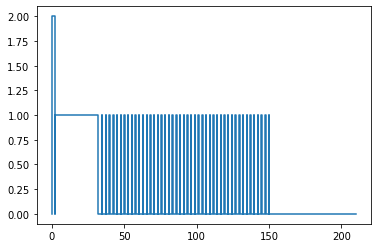

In [321]:
e = edrx()
e.param(2, 30, 120, 120, 60, 60, 2.56, 1)

In [318]:
1+1

2

2 5 2 2 2 2 2.56 1


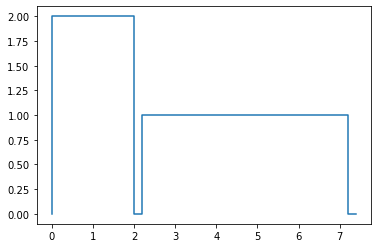

2 5 4 4 4 2.56 2.56 1


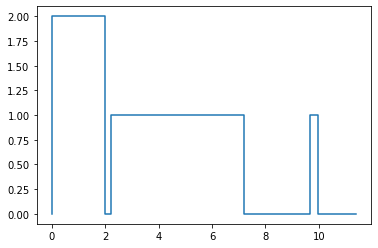

2 5 6 6 6 5.12 2.56 1


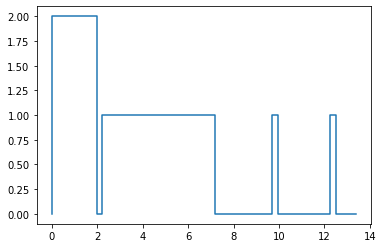

2 5 8 8 8 7.68 2.56 1


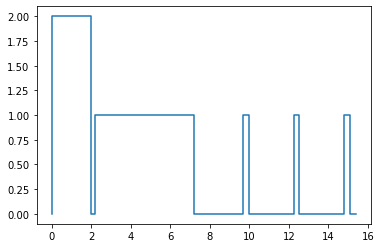

2 5 12 12 10.24 10.24 2.56 1


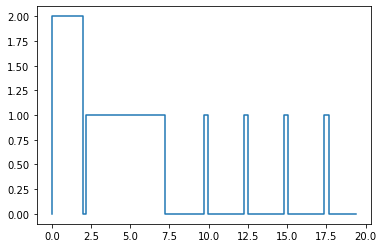

2 5 14 14 14 12.8 2.56 1


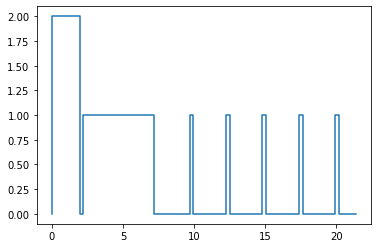

2 5 30 30 10.24 2.56 2.56 1


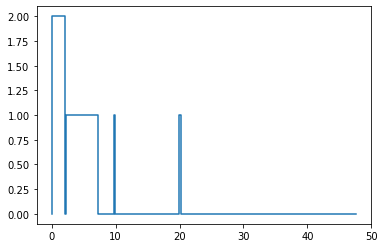

2 5 30 30 10.24 5.12 2.56 1


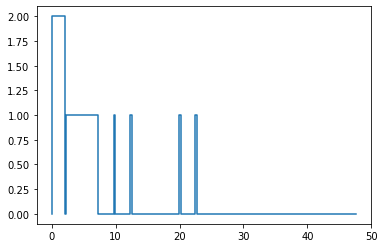

2 5 30 30 10.24 7.68 2.56 1


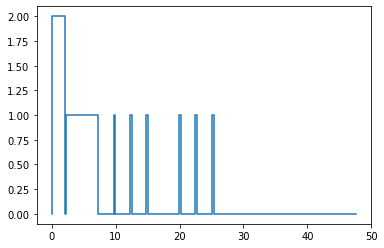

2 5 30 30 10.24 10.24 2.56 1


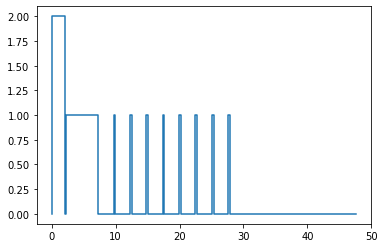

2 5 30 30 20.48 15.36 2.56 1


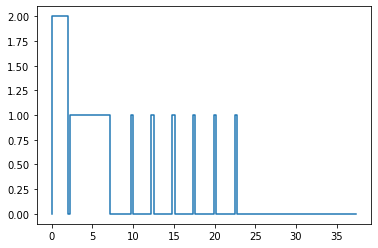

2 5 30 30 20.48 17.92 2.56 1


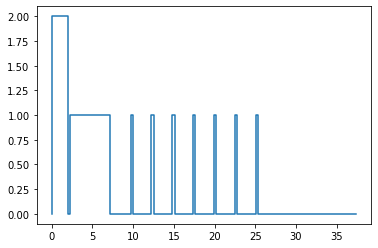

2 5 30 30 20.48 20.48 2.56 1


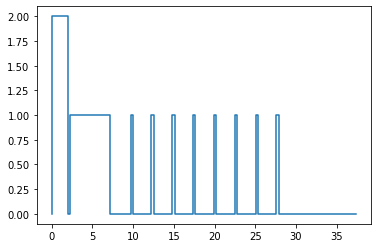

2 5 30 30 30 23.04 2.56 1


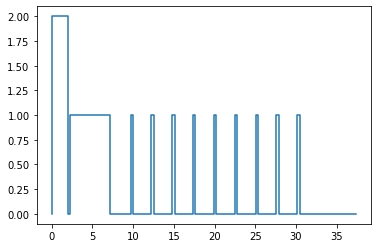

2 5 30 30 30 25.6 2.56 1


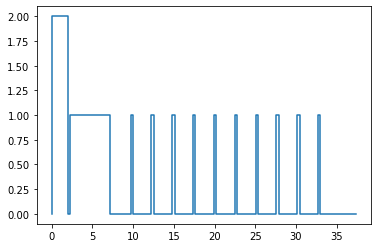

2 5 30 30 30 28.16 2.56 1


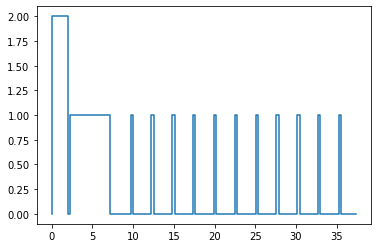

2 5 60 60 10.24 2.56 2.56 1


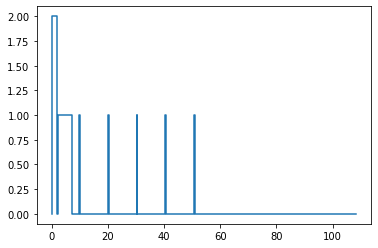

2 5 60 60 10.24 5.12 2.56 1


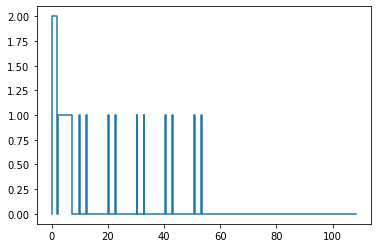

2 5 60 60 10.24 7.68 2.56 1


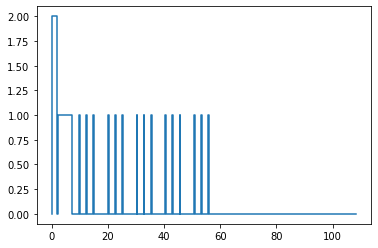

2 5 60 60 10.24 10.24 2.56 1


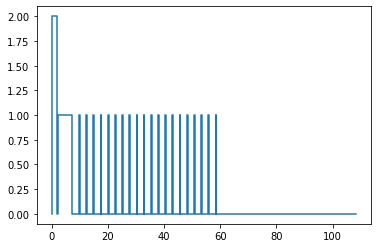

2 5 60 60 20.48 12.8 2.56 1


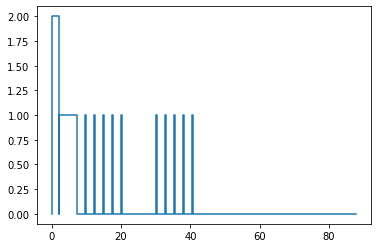

2 5 60 60 20.48 15.36 2.56 1


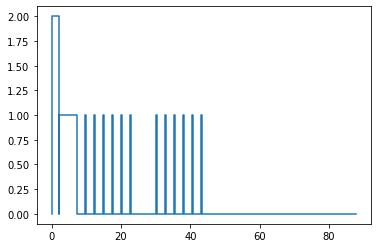

2 5 60 60 20.48 17.92 2.56 1


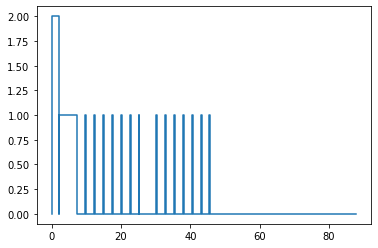

2 5 60 60 20.48 20.48 2.56 1


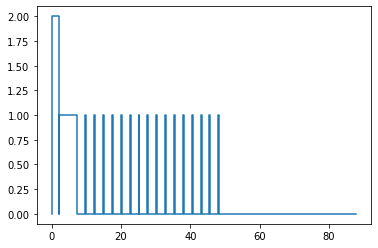

2 5 60 60 40.96 30.72 2.56 1


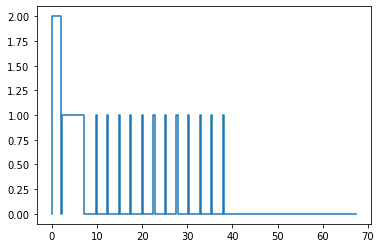

2 5 60 60 40.96 33.28 2.56 1


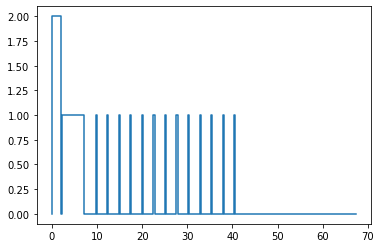

2 5 60 60 40.96 35.84 2.56 1


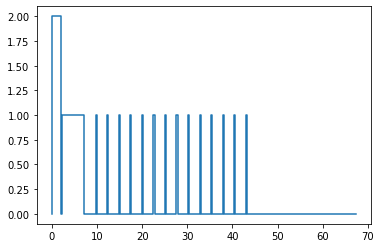

2 5 60 60 40.96 38.4 2.56 1


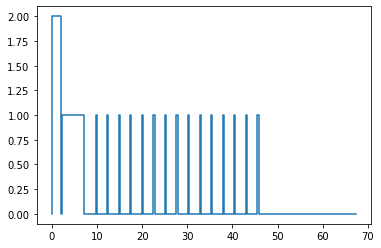

2 5 60 60 40.96 40.96 2.56 1


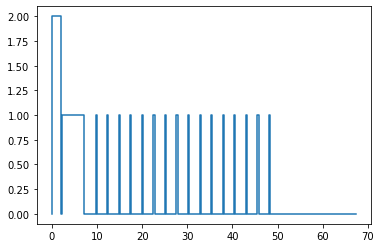

2 5 90 90 10.24 2.56 2.56 1


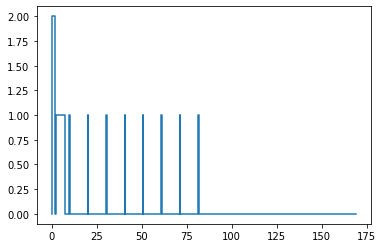

2 5 90 90 10.24 5.12 2.56 1


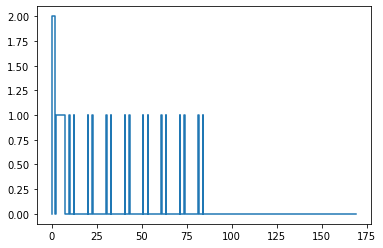

2 5 90 90 10.24 7.68 2.56 1


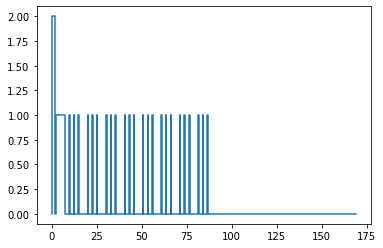

2 5 90 90 10.24 10.24 2.56 1


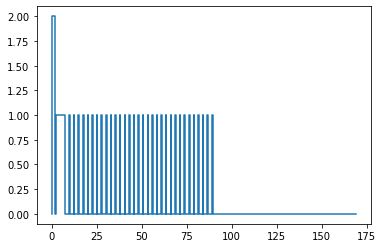

2 5 90 90 20.48 2.56 2.56 1


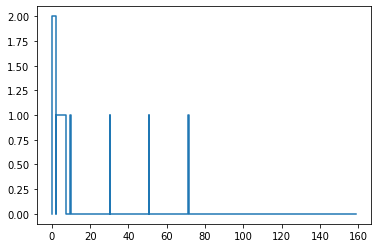

2 5 90 90 20.48 5.12 2.56 1


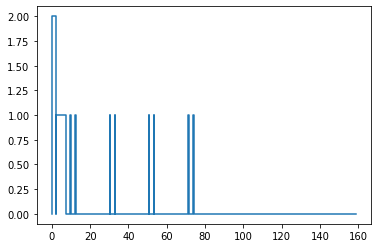

2 5 90 90 20.48 7.68 2.56 1


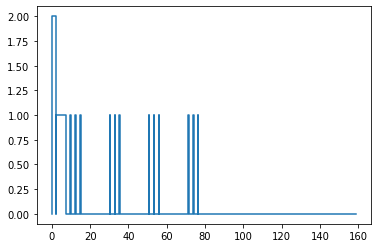

2 5 90 90 20.48 10.24 2.56 1


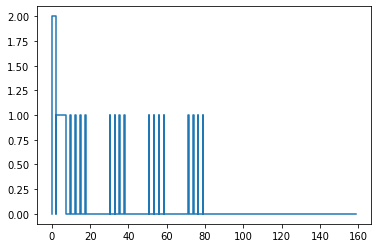

2 5 90 90 20.48 12.8 2.56 1


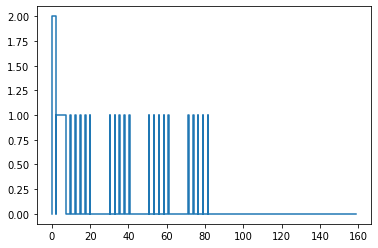

2 5 90 90 20.48 15.36 2.56 1


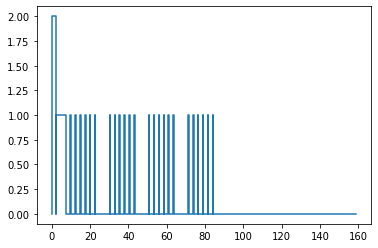

2 5 90 90 20.48 17.92 2.56 1


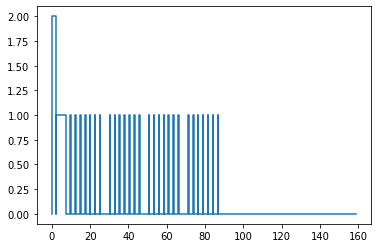

2 5 90 90 20.48 20.48 2.56 1


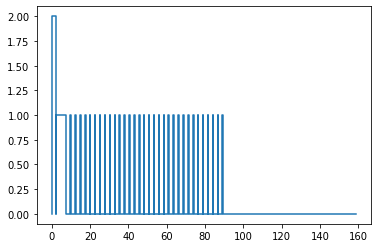

2 5 90 90 40.96 23.04 2.56 1


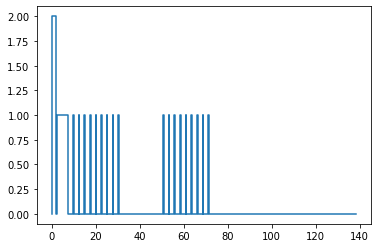

2 5 90 90 40.96 25.6 2.56 1


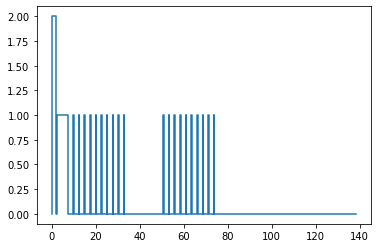

2 5 90 90 40.96 28.16 2.56 1


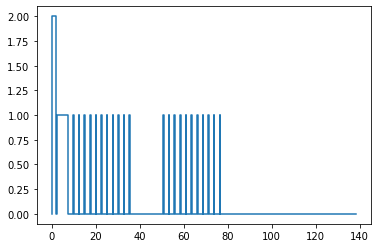

2 5 90 90 40.96 30.72 2.56 1


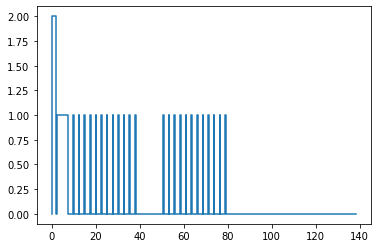

2 5 90 90 40.96 33.28 2.56 1


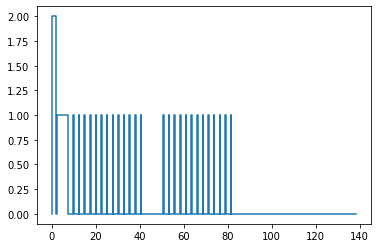

2 5 90 90 40.96 35.84 2.56 1


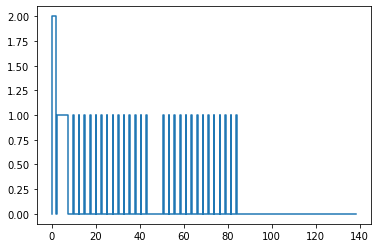

2 5 90 90 40.96 38.4 2.56 1


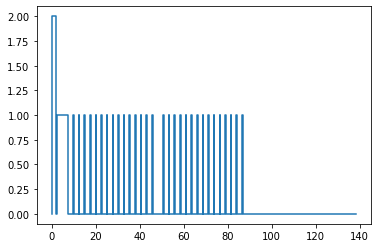

2 5 90 90 40.96 40.96 2.56 1


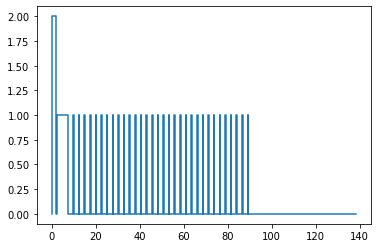

2 5 120 120 10.24 2.56 2.56 1


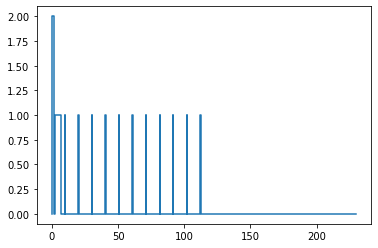

2 5 120 120 10.24 5.12 2.56 1


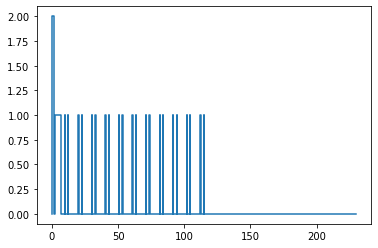

2 5 120 120 10.24 7.68 2.56 1


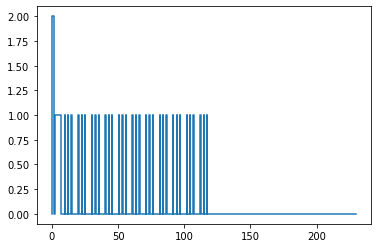

2 5 120 120 10.24 10.24 2.56 1


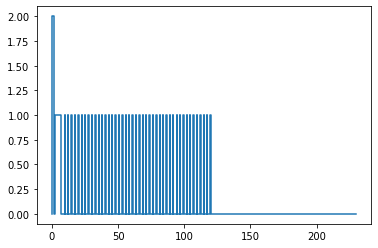

2 5 120 120 20.48 12.8 2.56 1


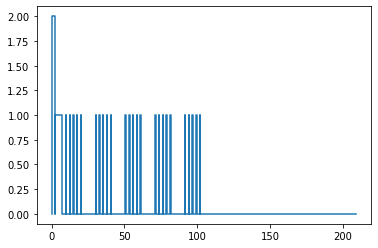

2 5 120 120 20.48 15.36 2.56 1


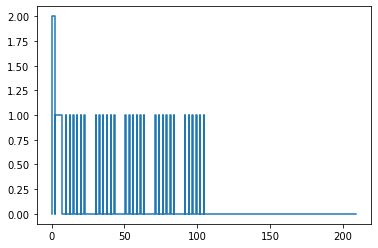

2 5 120 120 20.48 17.92 2.56 1


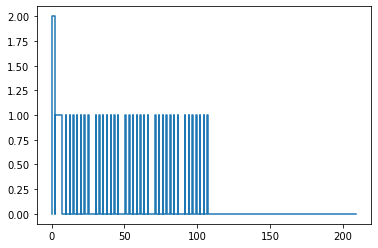

2 5 120 120 20.48 20.48 2.56 1


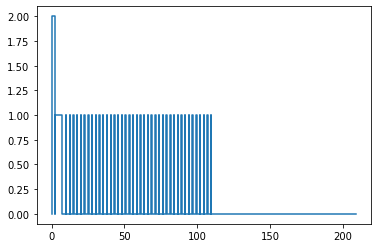

2 5 150 150 10.24 2.56 2.56 1


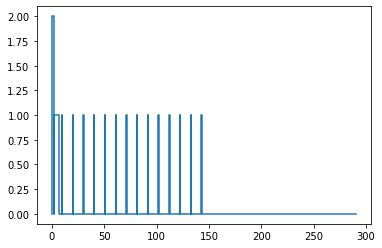

2 5 150 150 10.24 5.12 2.56 1


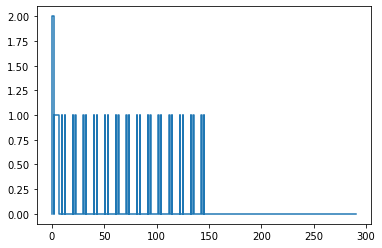

2 5 150 150 10.24 7.68 2.56 1


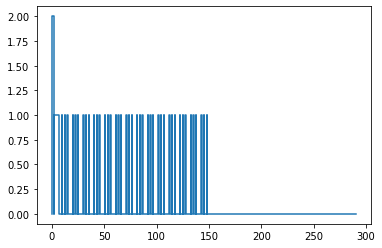

2 5 150 150 10.24 10.24 2.56 1


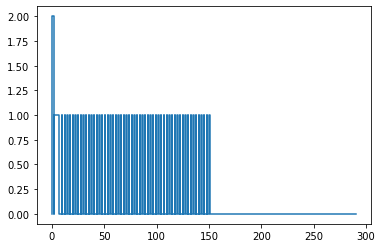

2 5 150 150 20.48 2.56 2.56 1


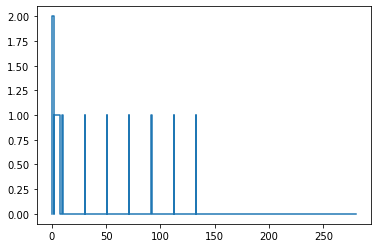

2 5 150 150 20.48 5.12 2.56 1


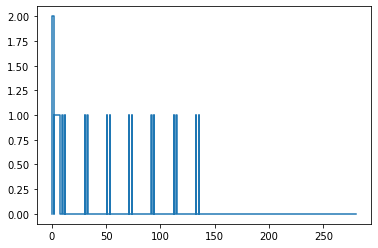

2 5 150 150 20.48 7.68 2.56 1


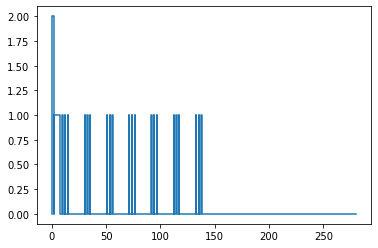

2 5 150 150 20.48 10.24 2.56 1


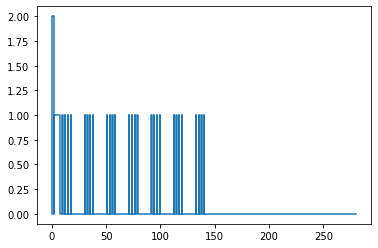

2 5 150 150 20.48 12.8 2.56 1


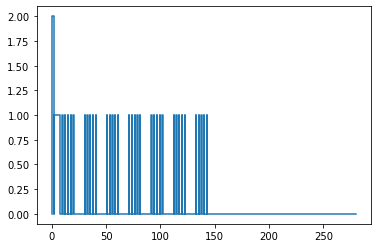

2 5 150 150 20.48 15.36 2.56 1


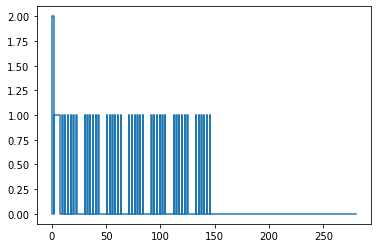

2 5 150 150 20.48 17.92 2.56 1


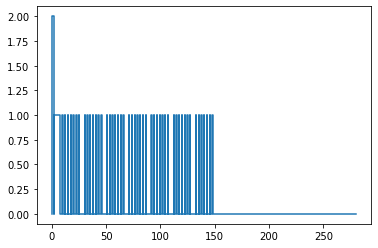

2 5 150 150 20.48 20.48 2.56 1


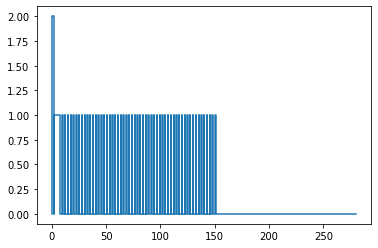

2 5 150 150 40.96 2.56 2.56 1


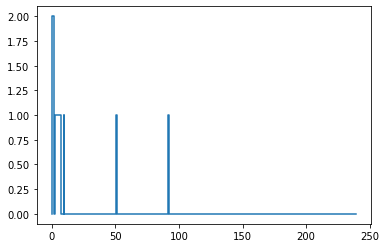

2 5 150 150 40.96 5.12 2.56 1


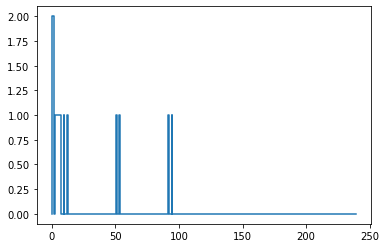

2 5 150 150 40.96 7.68 2.56 1


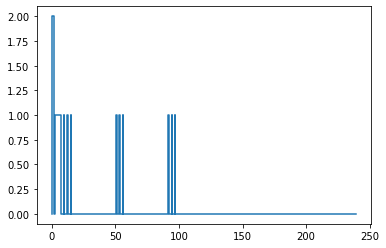

2 5 150 150 40.96 10.24 2.56 1


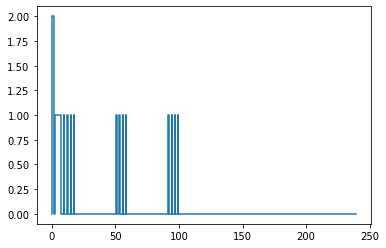

2 5 150 150 40.96 12.8 2.56 1


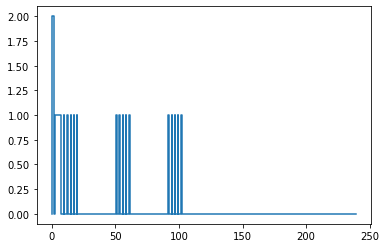

2 5 150 150 40.96 15.36 2.56 1


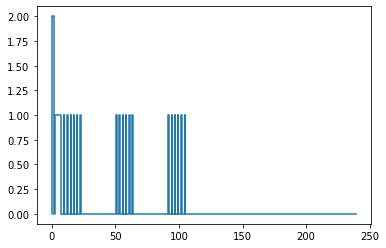

2 5 150 150 40.96 17.92 2.56 1


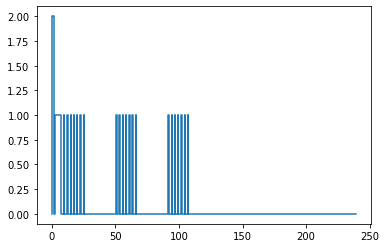

2 5 150 150 40.96 20.48 2.56 1


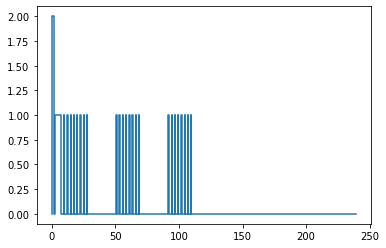

2 5 150 150 40.96 23.04 2.56 1


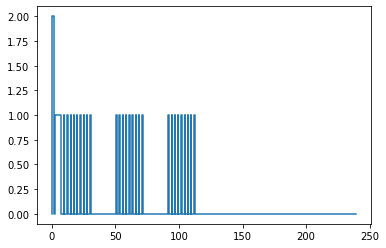

2 5 150 150 40.96 25.6 2.56 1


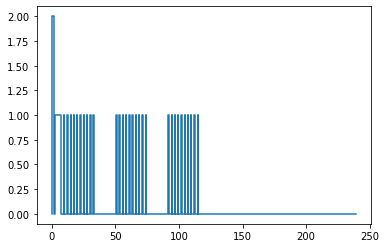

2 5 150 150 40.96 28.16 2.56 1


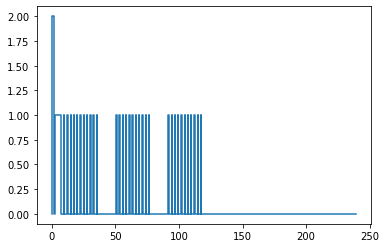

2 5 150 150 40.96 30.72 2.56 1


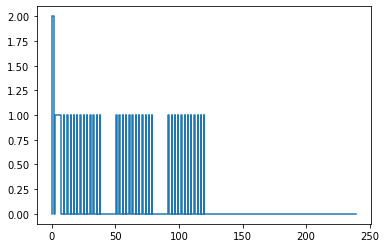

2 5 150 150 40.96 33.28 2.56 1


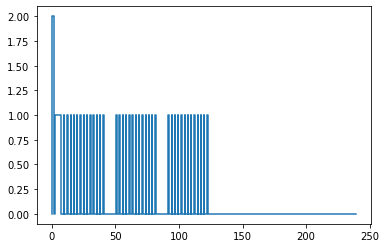

2 5 150 150 40.96 35.84 2.56 1


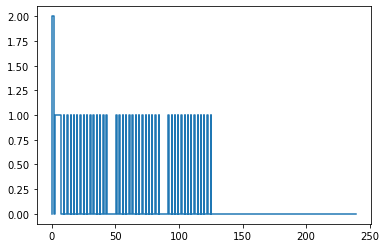

2 5 150 150 40.96 38.4 2.56 1


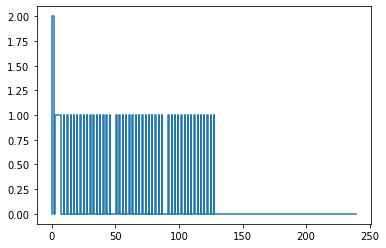

2 5 150 150 40.96 40.96 2.56 1


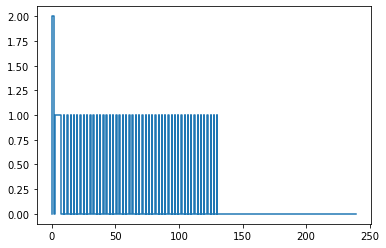

2 5 180 180 10.24 2.56 2.56 1


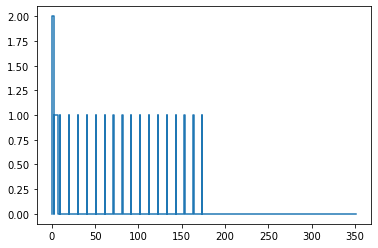

2 5 180 180 10.24 5.12 2.56 1


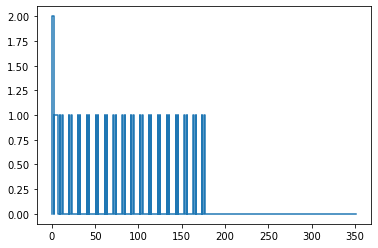

2 5 180 180 10.24 7.68 2.56 1


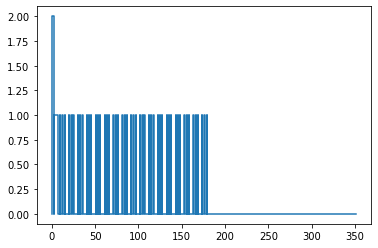

2 5 180 180 10.24 10.24 2.56 1


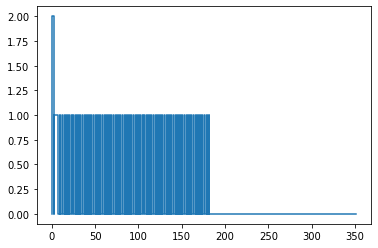

2 5 180 180 20.48 12.8 2.56 1


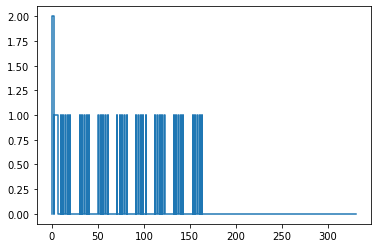

2 5 180 180 20.48 15.36 2.56 1


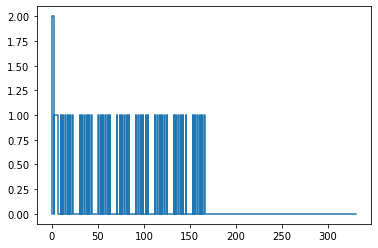

2 5 180 180 20.48 17.92 2.56 1


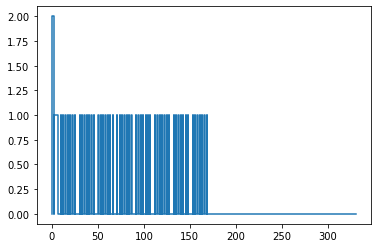

2 5 180 180 20.48 20.48 2.56 1


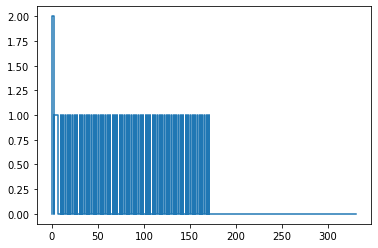

2 5 180 180 40.96 23.04 2.56 1


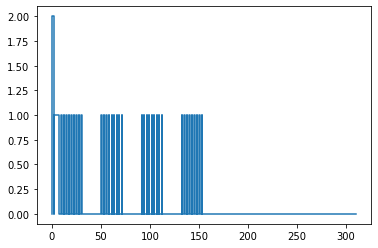

2 5 180 180 40.96 25.6 2.56 1


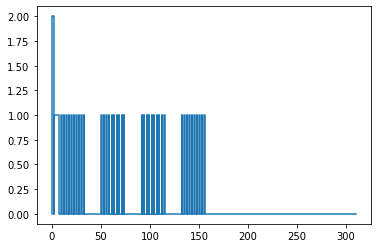

2 5 180 180 40.96 28.16 2.56 1


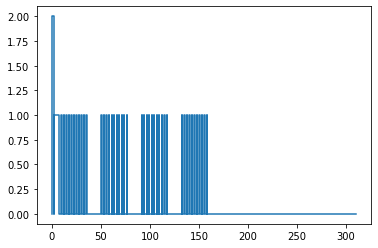

2 5 180 180 40.96 30.72 2.56 1


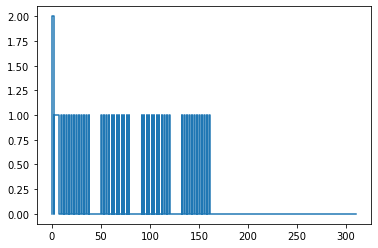

2 5 180 180 40.96 33.28 2.56 1


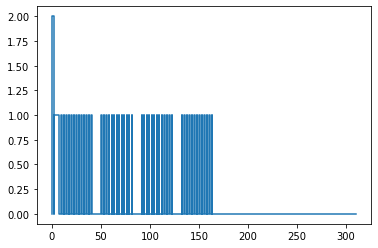

2 5 180 180 40.96 35.84 2.56 1


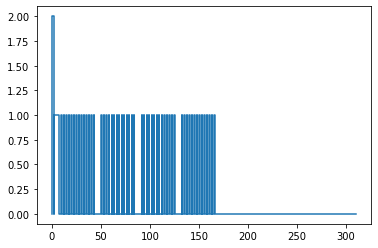

2 5 180 180 40.96 38.4 2.56 1


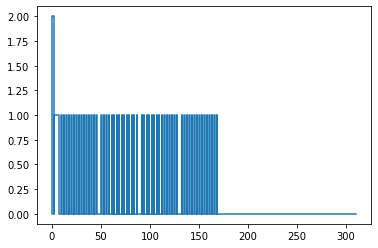

2 5 180 180 40.96 40.96 2.56 1


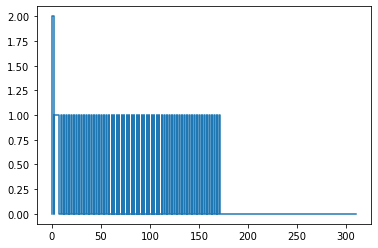

2 5 210 210 10.24 2.56 2.56 1


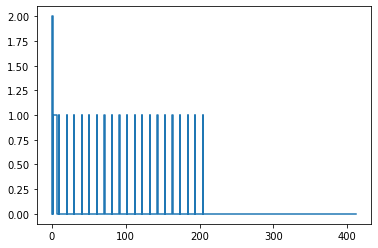

2 5 210 210 10.24 5.12 2.56 1


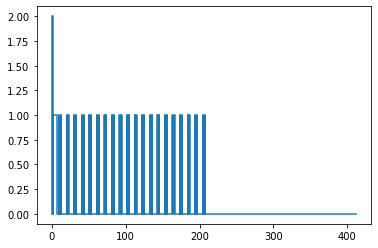

2 5 210 210 10.24 7.68 2.56 1


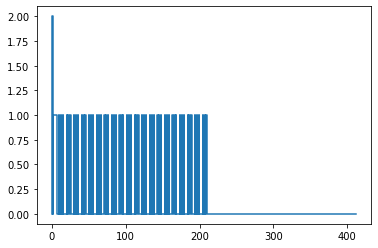

2 5 210 210 10.24 10.24 2.56 1


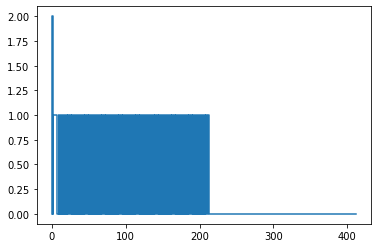

2 5 210 210 20.48 2.56 2.56 1


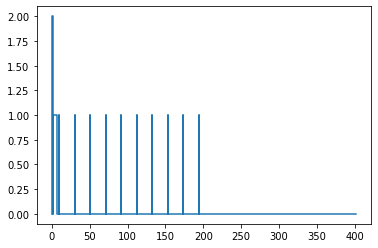

2 5 210 210 20.48 5.12 2.56 1


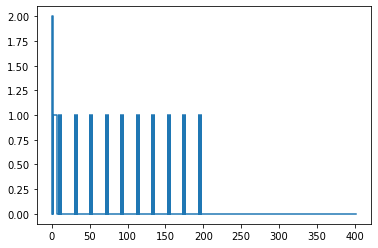

2 5 210 210 20.48 7.68 2.56 1


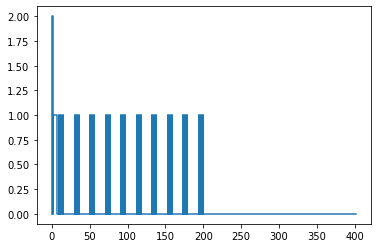

2 5 210 210 20.48 10.24 2.56 1


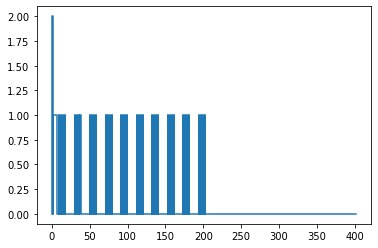

2 5 210 210 20.48 12.8 2.56 1


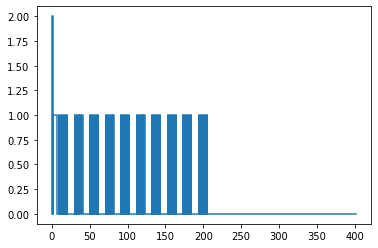

2 5 210 210 20.48 15.36 2.56 1


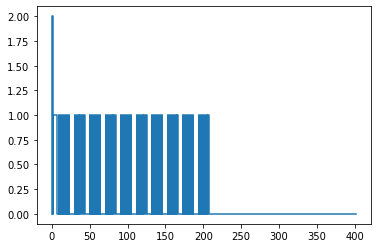

2 5 210 210 20.48 17.92 2.56 1


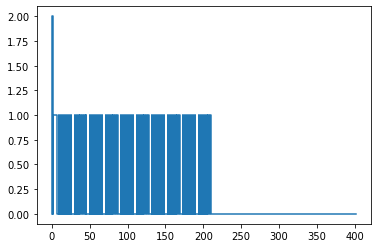

2 5 210 210 20.48 20.48 2.56 1


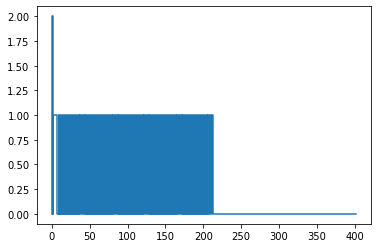

2 5 210 210 40.96 23.04 2.56 1


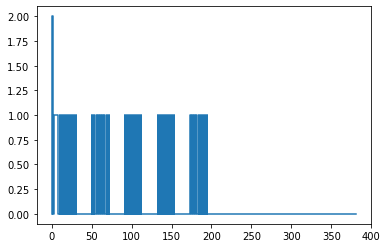

2 5 210 210 40.96 25.6 2.56 1


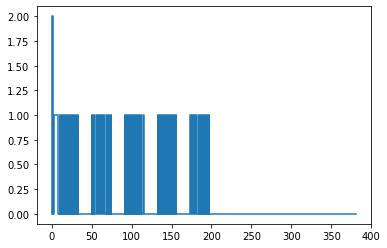

2 5 210 210 40.96 28.16 2.56 1


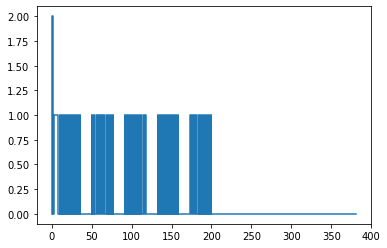

2 5 210 210 40.96 30.72 2.56 1


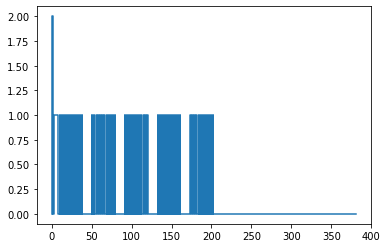

2 5 210 210 40.96 33.28 2.56 1


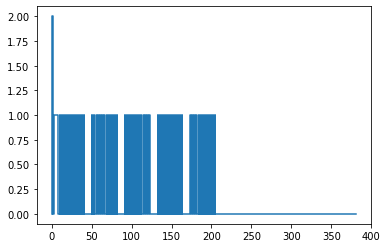

2 5 210 210 40.96 35.84 2.56 1


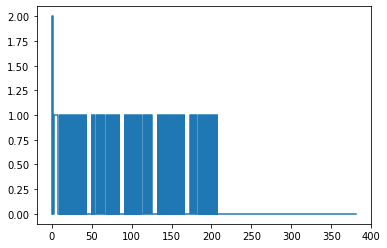

2 5 210 210 40.96 38.4 2.56 1


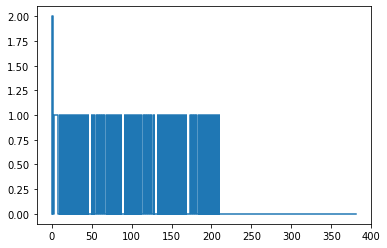

2 5 210 210 40.96 40.96 2.56 1


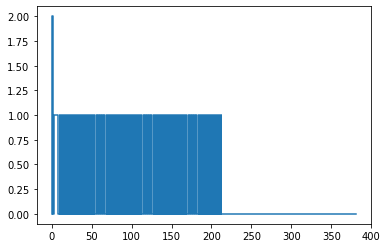

2 5 240 240 10.24 2.56 2.56 1


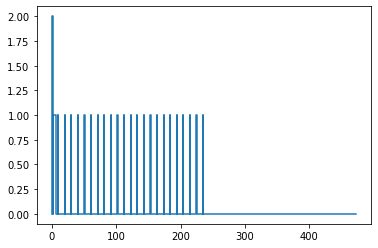

2 5 240 240 10.24 5.12 2.56 1


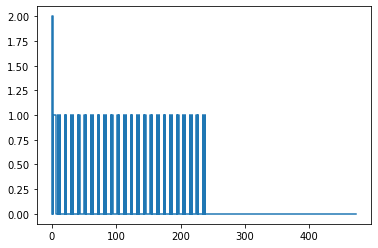

2 5 240 240 10.24 7.68 2.56 1


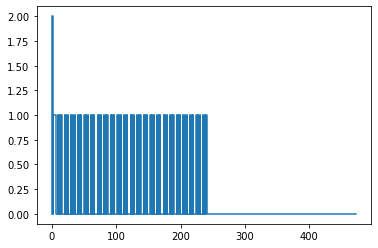

2 5 240 240 10.24 10.24 2.56 1


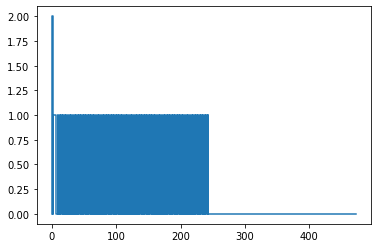

2 5 240 240 20.48 12.8 2.56 1


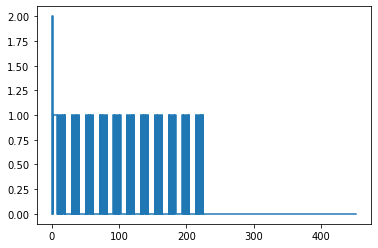

2 5 240 240 20.48 15.36 2.56 1


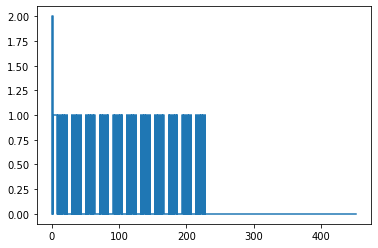

2 5 240 240 20.48 17.92 2.56 1


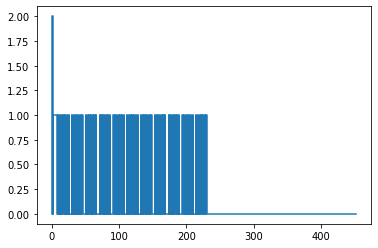

2 5 240 240 20.48 20.48 2.56 1


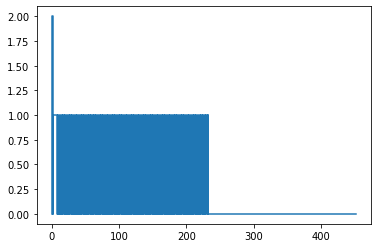

2 5 300 300 10.24 2.56 2.56 1


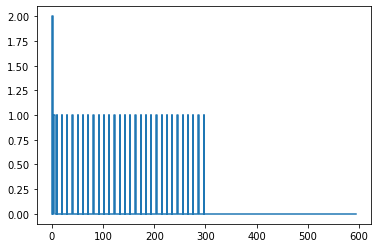

2 5 300 300 10.24 5.12 2.56 1


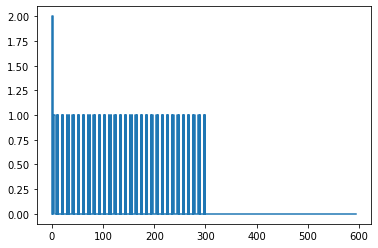

2 5 300 300 10.24 7.68 2.56 1


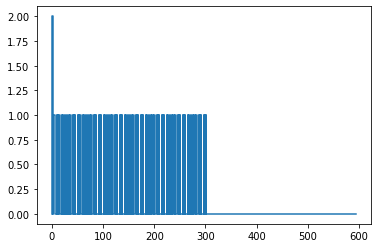

2 5 300 300 10.24 10.24 2.56 1


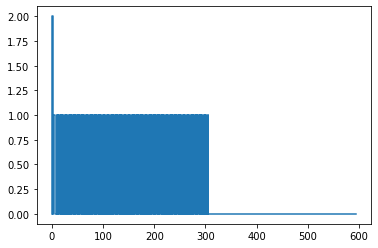

2 5 300 300 20.48 12.8 2.56 1


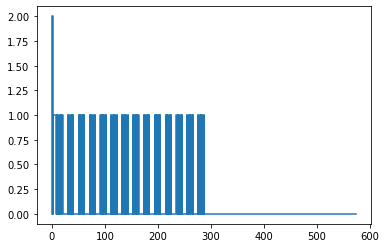

2 5 300 300 20.48 15.36 2.56 1


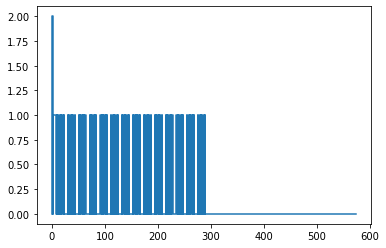

2 5 300 300 20.48 17.92 2.56 1


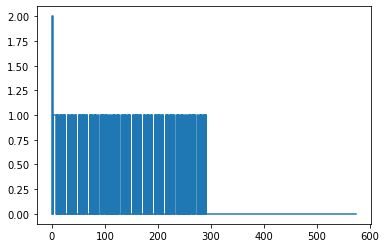

2 5 300 300 20.48 20.48 2.56 1


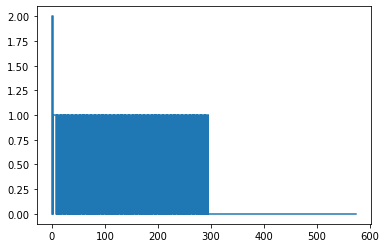

2 5 300 300 40.96 23.04 2.56 1


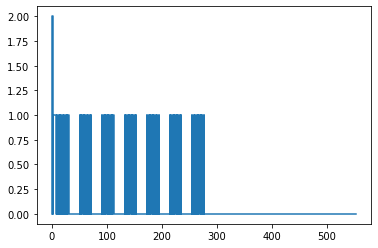

2 5 300 300 40.96 25.6 2.56 1


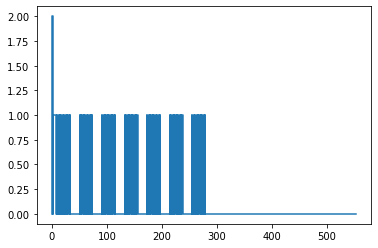

2 5 300 300 40.96 28.16 2.56 1


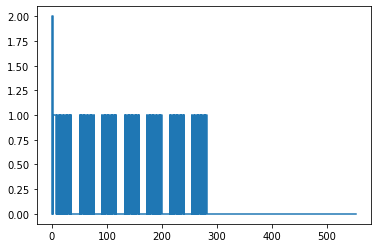

2 5 300 300 40.96 30.72 2.56 1


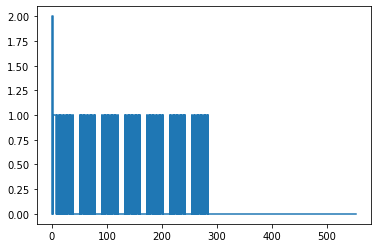

2 5 300 300 40.96 33.28 2.56 1


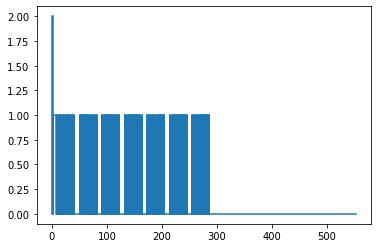

2 5 300 300 40.96 35.84 2.56 1


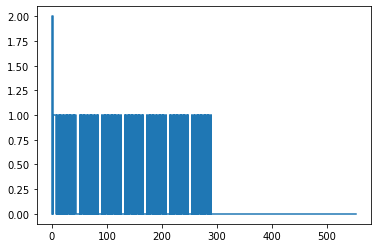

2 5 300 300 40.96 38.4 2.56 1


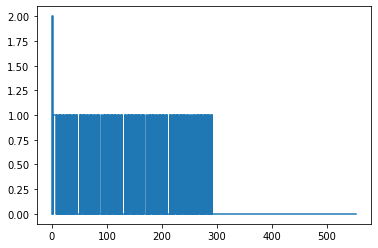

2 5 300 300 40.96 40.96 2.56 1


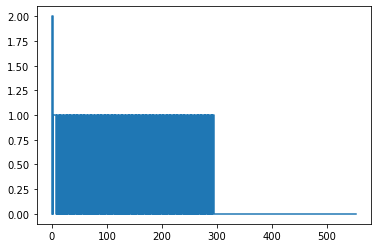

2 5 360 360 10.24 2.56 2.56 1


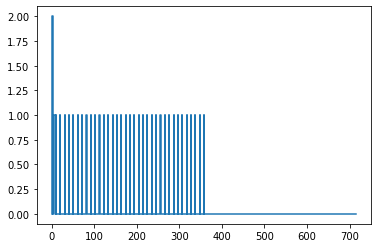

2 5 360 360 10.24 5.12 2.56 1


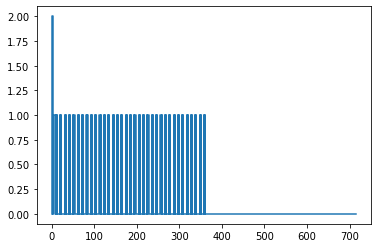

2 5 360 360 10.24 7.68 2.56 1


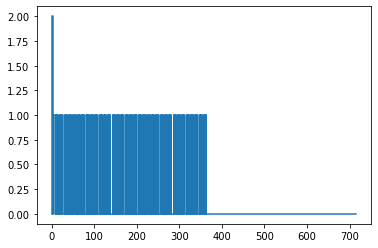

2 5 360 360 10.24 10.24 2.56 1


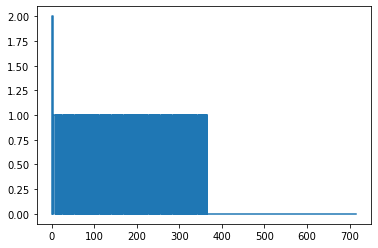

2 5 360 360 20.48 12.8 2.56 1


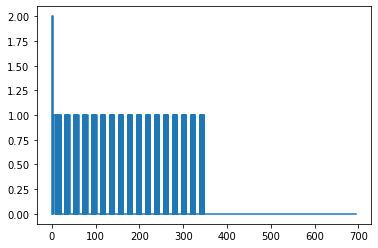

2 5 360 360 20.48 15.36 2.56 1


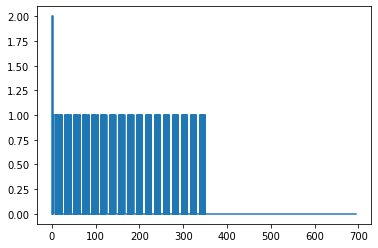

2 5 360 360 20.48 17.92 2.56 1


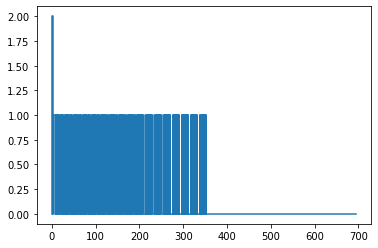

2 5 360 360 20.48 20.48 2.56 1


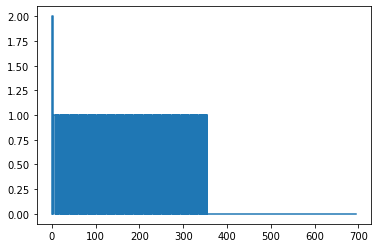

2 5 360 360 40.96 23.04 2.56 1


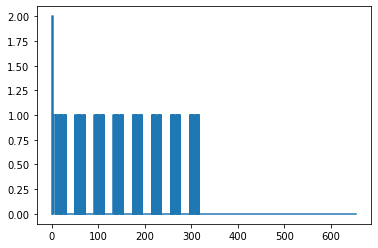

2 5 360 360 40.96 25.6 2.56 1


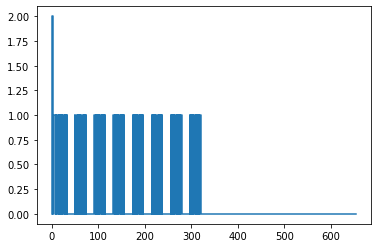

2 5 360 360 40.96 28.16 2.56 1


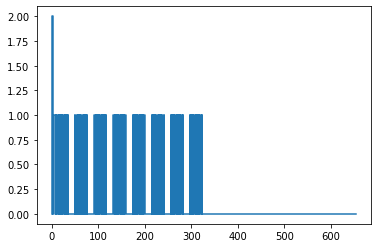

2 5 360 360 40.96 30.72 2.56 1


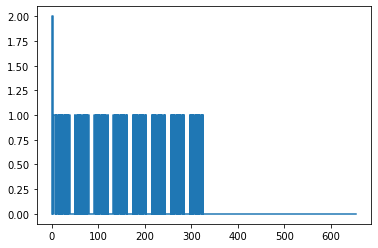

2 5 360 360 40.96 33.28 2.56 1


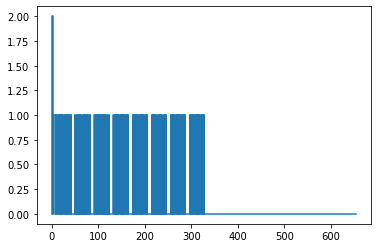

2 5 360 360 40.96 35.84 2.56 1


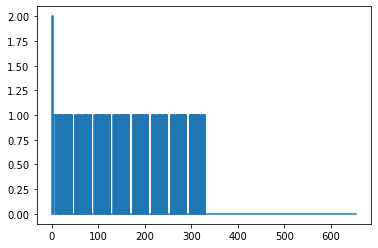

2 5 360 360 40.96 38.4 2.56 1


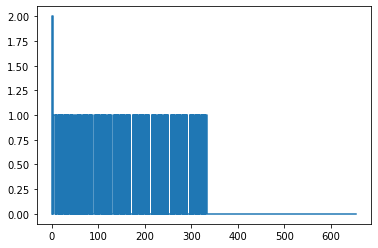

2 5 360 360 40.96 40.96 2.56 1


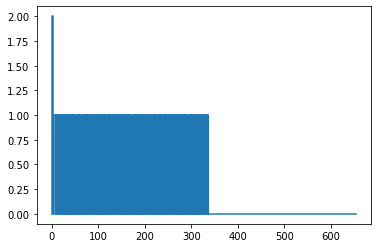

2 5 420 420 10.24 2.56 2.56 1


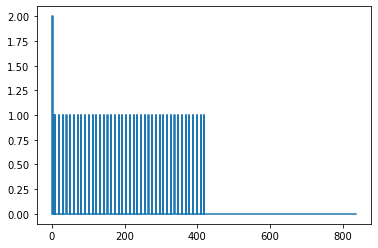

2 5 420 420 10.24 5.12 2.56 1


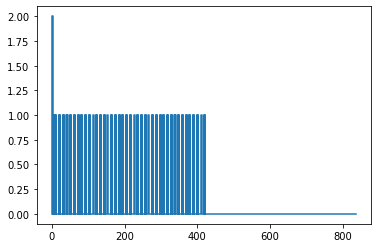

2 5 420 420 10.24 7.68 2.56 1


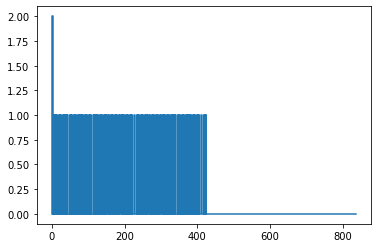

2 5 420 420 10.24 10.24 2.56 1


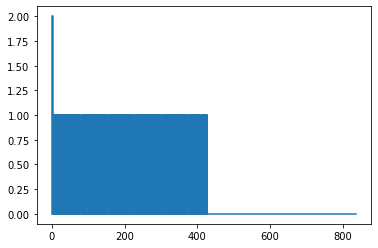

2 5 420 420 20.48 12.8 2.56 1


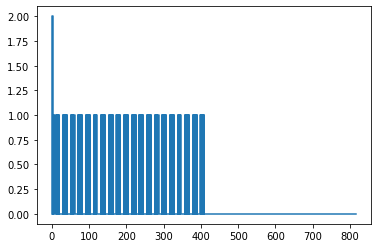

2 5 420 420 20.48 15.36 2.56 1


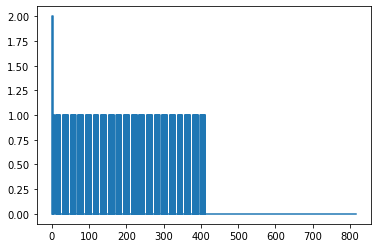

2 5 420 420 20.48 17.92 2.56 1


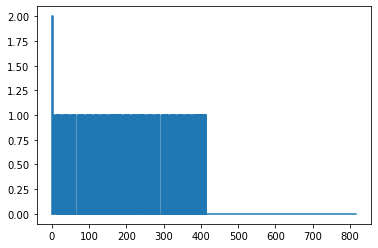

2 5 420 420 20.48 20.48 2.56 1


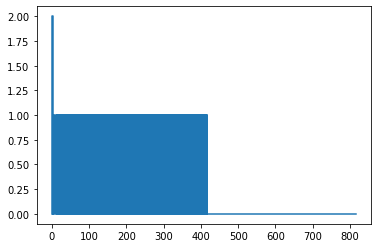

2 5 420 420 40.96 23.04 2.56 1


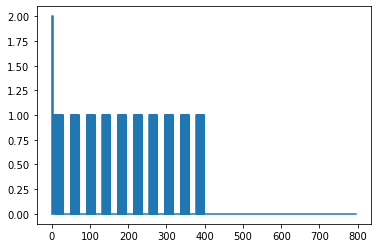

2 5 420 420 40.96 25.6 2.56 1


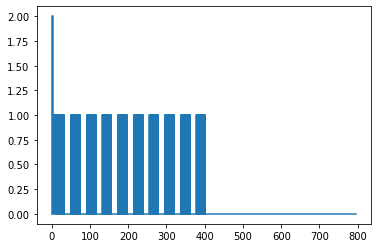

2 5 420 420 40.96 28.16 2.56 1


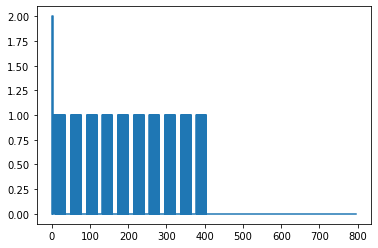

2 5 420 420 40.96 30.72 2.56 1


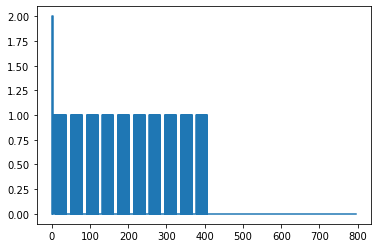

2 5 420 420 40.96 33.28 2.56 1


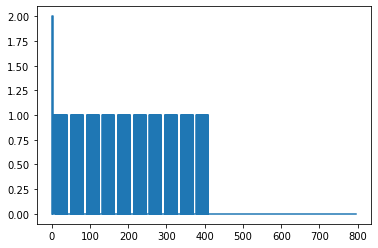

2 5 420 420 40.96 35.84 2.56 1


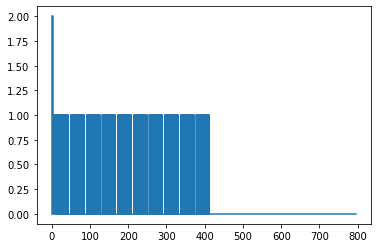

2 5 420 420 40.96 38.4 2.56 1


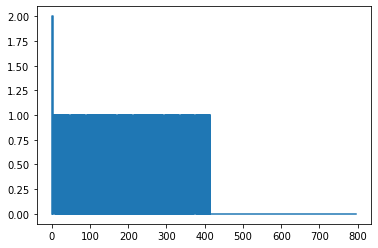

2 5 420 420 40.96 40.96 2.56 1


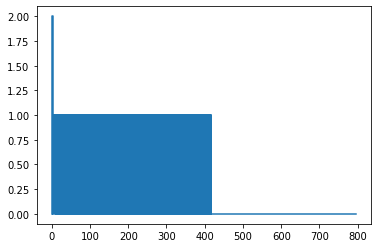

2 5 600 600 10.24 2.56 2.56 1


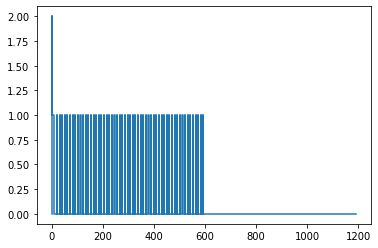

2 5 600 600 10.24 5.12 2.56 1


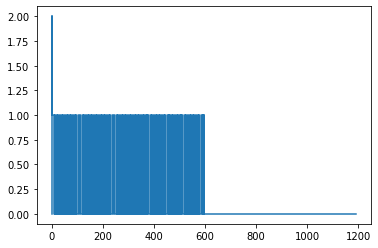

2 5 600 600 10.24 7.68 2.56 1


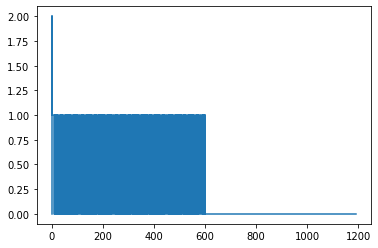

2 5 600 600 10.24 10.24 2.56 1


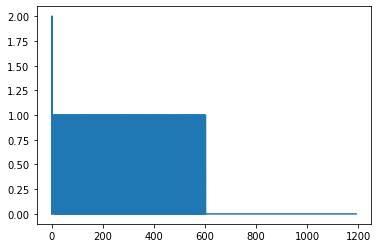

2 5 600 600 20.48 12.8 2.56 1


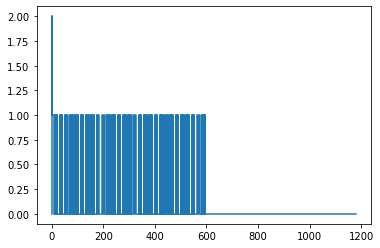

2 5 600 600 20.48 15.36 2.56 1


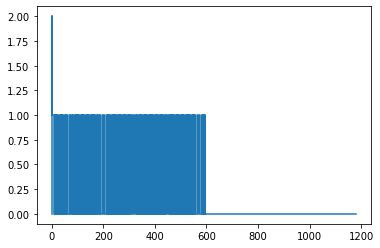

2 5 600 600 20.48 17.92 2.56 1


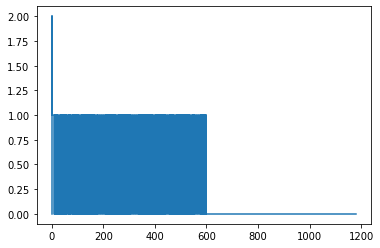

2 5 600 600 20.48 20.48 2.56 1


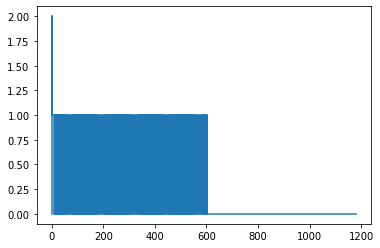

2 5 600 600 40.96 23.04 2.56 1


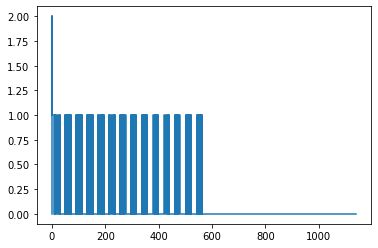

2 5 600 600 40.96 25.6 2.56 1


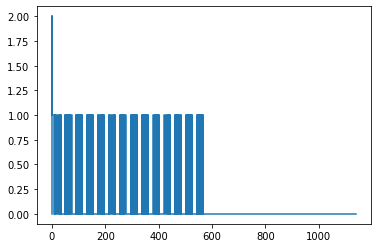

2 5 600 600 40.96 28.16 2.56 1


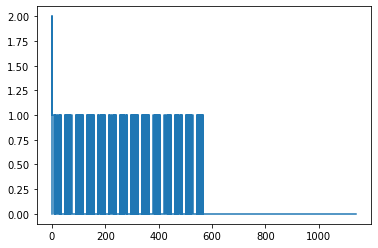

2 5 600 600 40.96 30.72 2.56 1


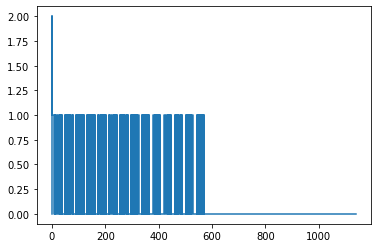

2 5 600 600 40.96 33.28 2.56 1


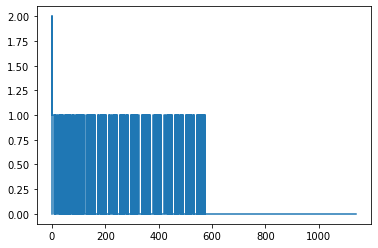

2 5 600 600 40.96 35.84 2.56 1


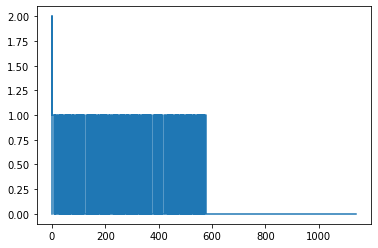

2 5 600 600 40.96 38.4 2.56 1


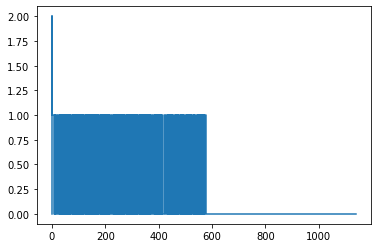

2 5 600 600 40.96 40.96 2.56 1


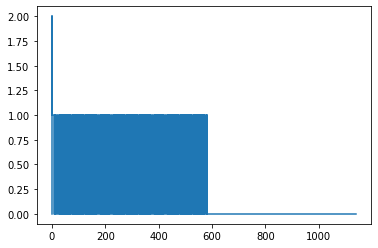

2 5 1200 720 10.24 2.56 2.56 1


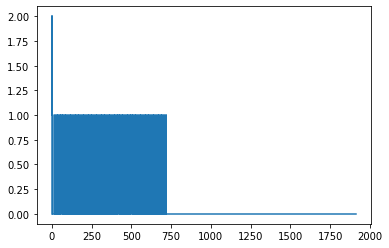

2 5 1200 720 10.24 5.12 2.56 1


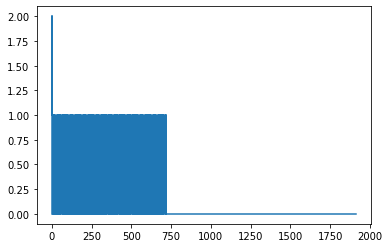

2 5 1200 720 10.24 7.68 2.56 1


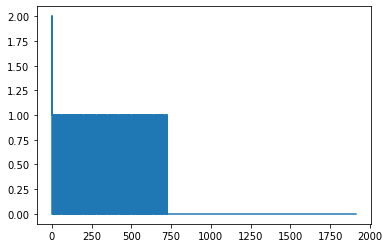

2 5 1200 720 10.24 10.24 2.56 1


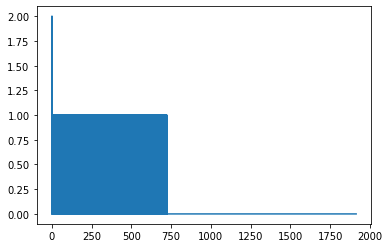

2 5 1200 720 20.48 12.8 2.56 1


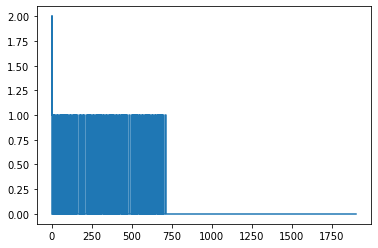

2 5 1200 720 20.48 15.36 2.56 1


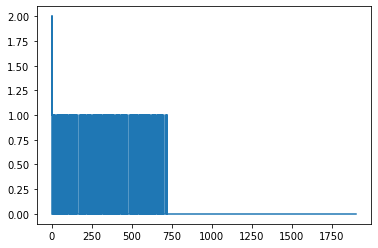

2 5 1200 720 20.48 17.92 2.56 1


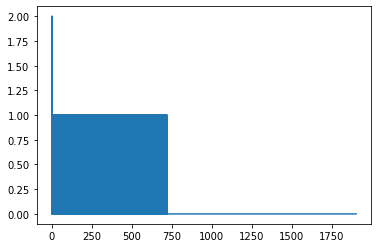

2 5 1200 720 20.48 20.48 2.56 1


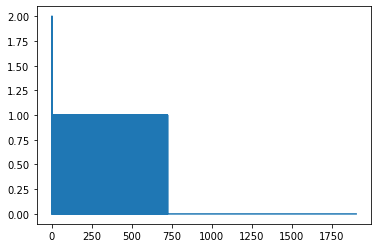

2 5 1200 720 40.96 23.04 2.56 1


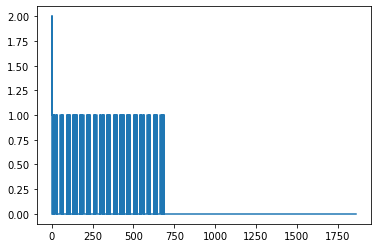

2 5 1200 720 40.96 25.6 2.56 1


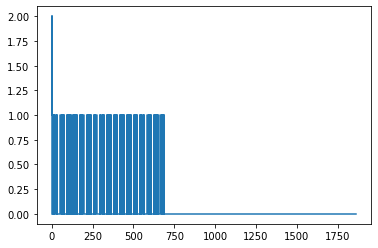

2 5 1200 720 40.96 28.16 2.56 1


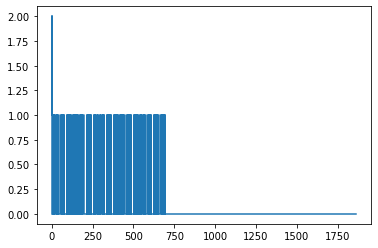

2 5 1200 720 40.96 30.72 2.56 1


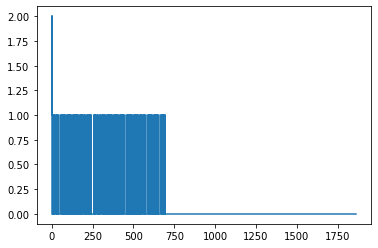

2 5 1200 720 40.96 33.28 2.56 1


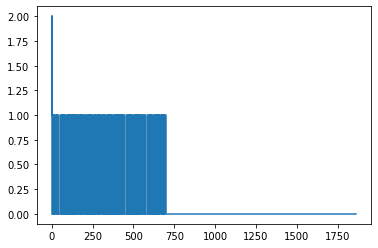

2 5 1200 720 40.96 35.84 2.56 1


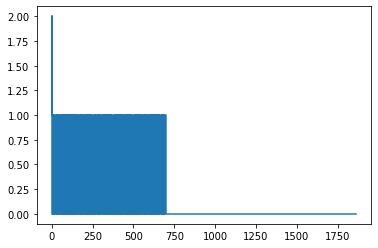

2 5 1200 720 40.96 38.4 2.56 1


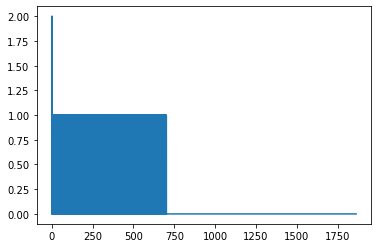

2 5 1200 720 40.96 40.96 2.56 1


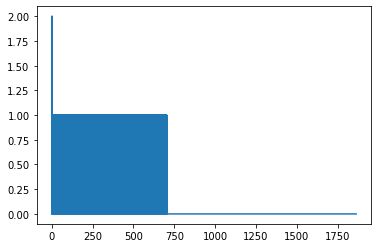

2 5 1200 1080 10.24 2.56 2.56 1


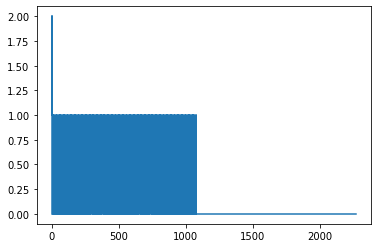

2 5 1200 1080 10.24 5.12 2.56 1


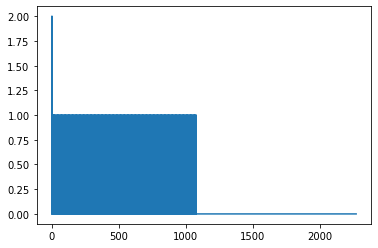

2 5 1200 1080 10.24 7.68 2.56 1


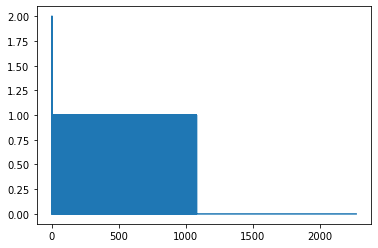

2 5 1200 1080 10.24 10.24 2.56 1


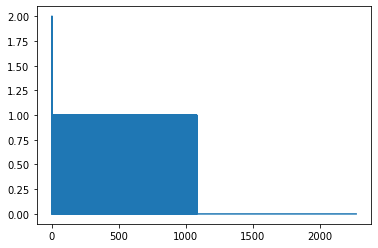

2 5 1200 1080 20.48 2.56 2.56 1


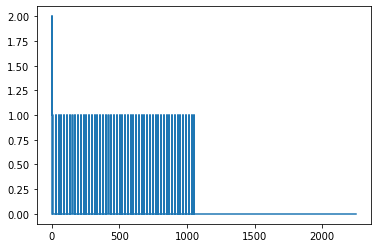

2 5 1200 1080 20.48 5.12 2.56 1


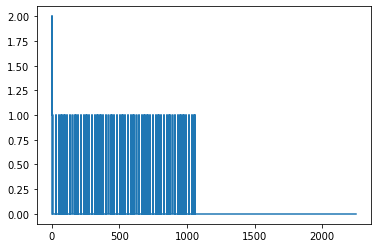

2 5 1200 1080 20.48 7.68 2.56 1


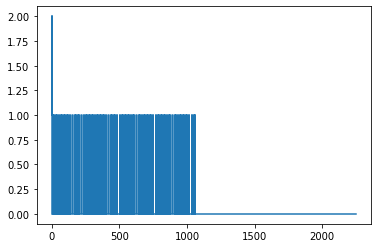

2 5 1200 1080 20.48 10.24 2.56 1


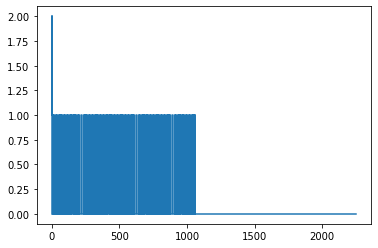

2 5 1200 1080 20.48 12.8 2.56 1


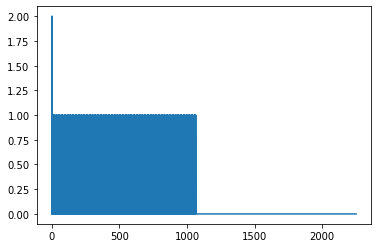

2 5 1200 1080 20.48 15.36 2.56 1


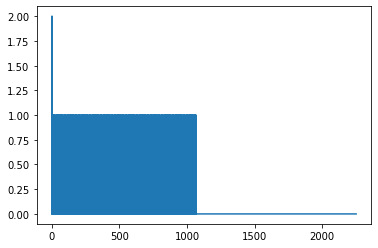

2 5 1200 1080 20.48 17.92 2.56 1


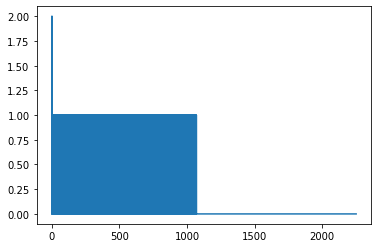

2 5 1200 1080 20.48 20.48 2.56 1


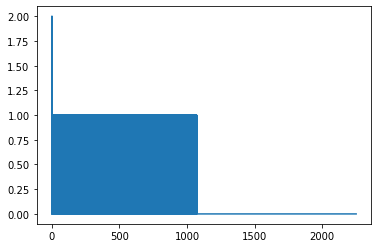

2 5 1200 1080 40.96 2.56 2.56 1


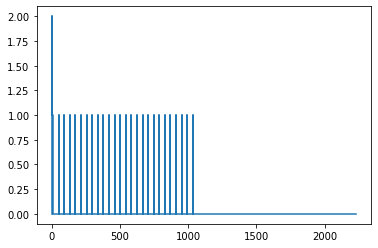

2 5 1200 1080 40.96 5.12 2.56 1


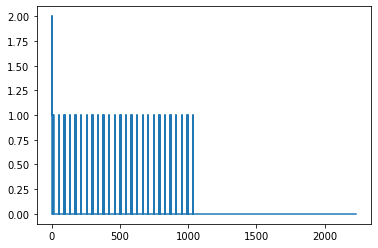

2 5 1200 1080 40.96 7.68 2.56 1


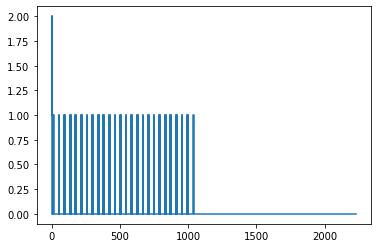

2 5 1200 1080 40.96 10.24 2.56 1


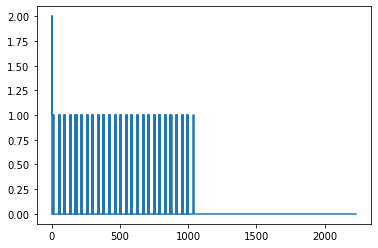

2 5 1200 1080 40.96 12.8 2.56 1


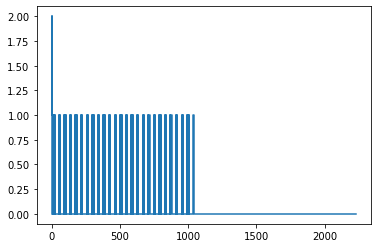

2 5 1200 1080 40.96 15.36 2.56 1


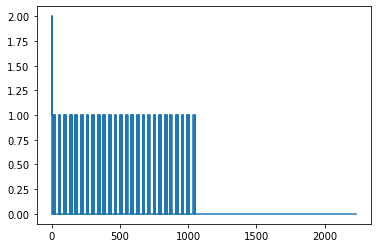

2 5 1200 1080 40.96 17.92 2.56 1


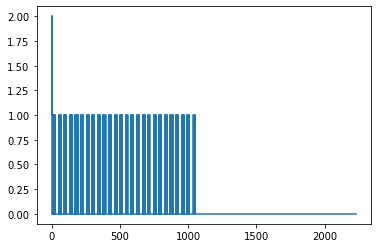

2 5 1200 1080 40.96 20.48 2.56 1


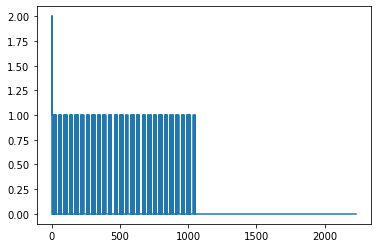

2 5 1200 1080 40.96 23.04 2.56 1


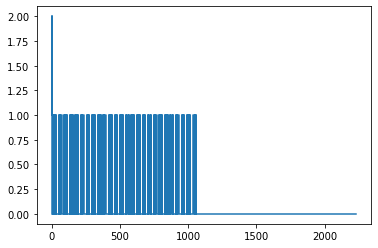

2 5 1200 1080 40.96 25.6 2.56 1


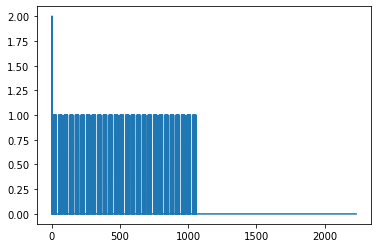

2 5 1200 1080 40.96 28.16 2.56 1


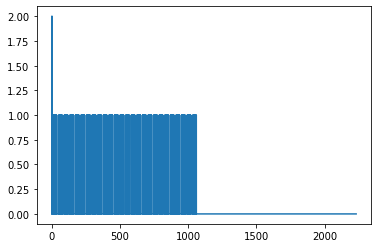

2 5 1200 1080 40.96 30.72 2.56 1


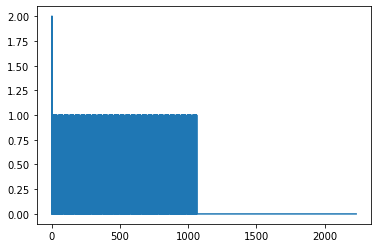

2 5 1200 1080 40.96 33.28 2.56 1


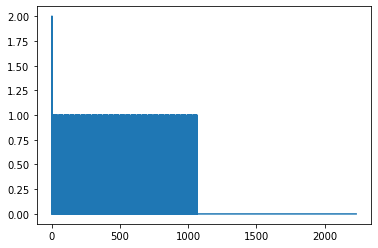

2 5 1200 1080 40.96 35.84 2.56 1


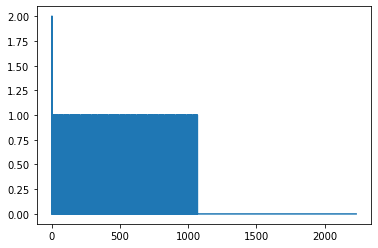

2 5 1200 1080 40.96 38.4 2.56 1


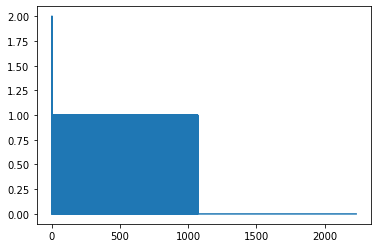

2 5 1200 1080 40.96 40.96 2.56 1


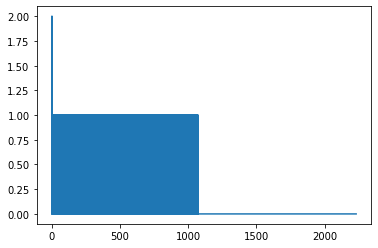

2 5 1200 1080 81.92 2.56 2.56 1


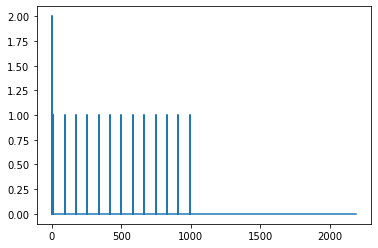

2 5 1200 1080 81.92 5.12 2.56 1


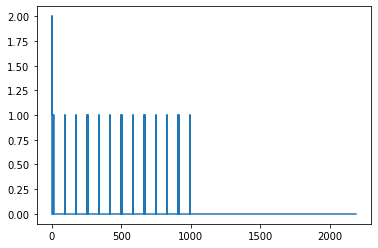

2 5 1200 1080 81.92 7.68 2.56 1


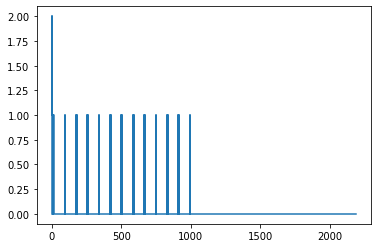

2 5 1200 1080 81.92 10.24 2.56 1


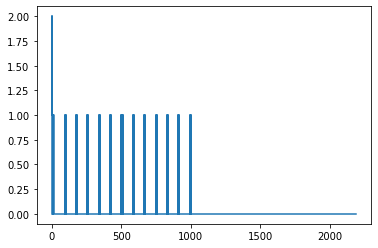

2 5 1200 1080 81.92 12.8 2.56 1


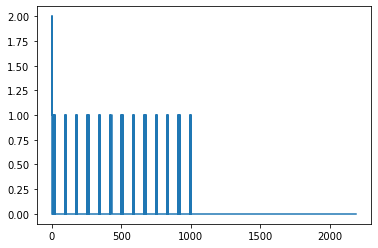

2 5 1200 1080 81.92 15.36 2.56 1


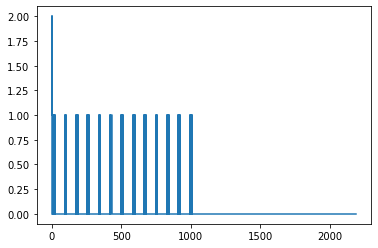

2 5 1200 1080 81.92 17.92 2.56 1


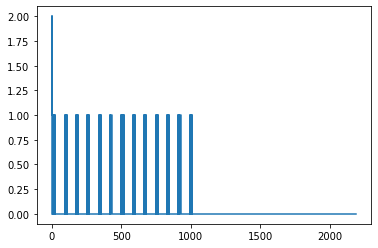

2 5 1200 1080 81.92 20.48 2.56 1


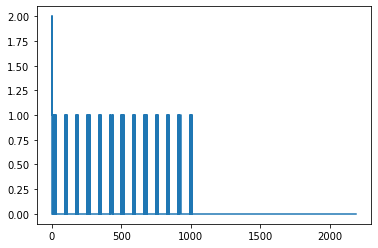

2 5 1200 1080 81.92 23.04 2.56 1


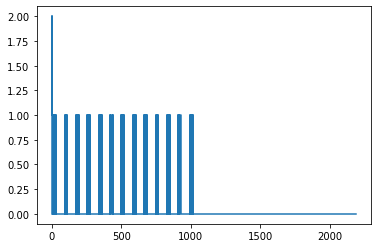

2 5 1200 1080 81.92 25.6 2.56 1


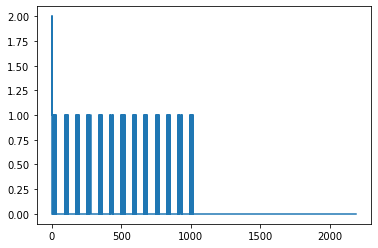

2 5 1200 1080 81.92 28.16 2.56 1


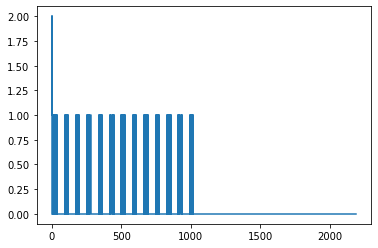

2 5 1200 1080 81.92 30.72 2.56 1


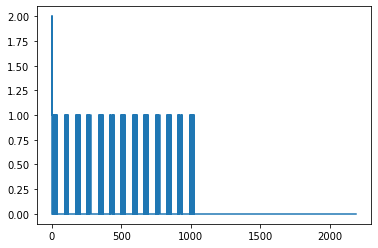

2 5 1200 1080 81.92 33.28 2.56 1


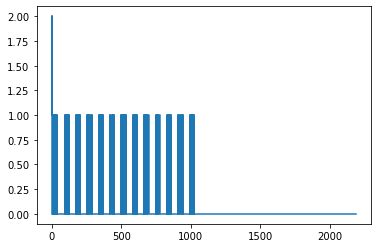

2 5 1200 1080 81.92 35.84 2.56 1


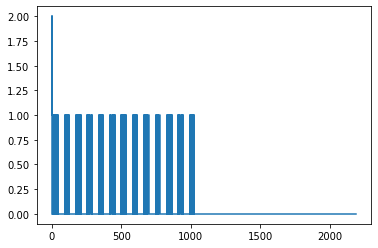

2 5 1200 1080 81.92 38.4 2.56 1


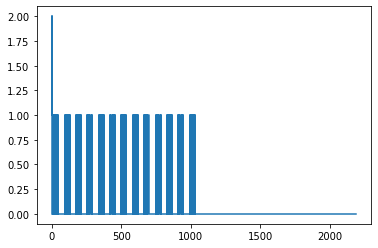

2 5 1200 1080 81.92 40.96 2.56 1


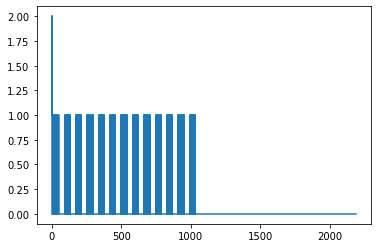

2 5 1200 1080 163.84 2.56 2.56 1


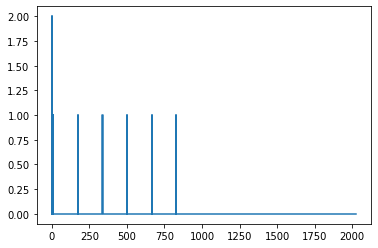

2 5 1200 1080 163.84 5.12 2.56 1


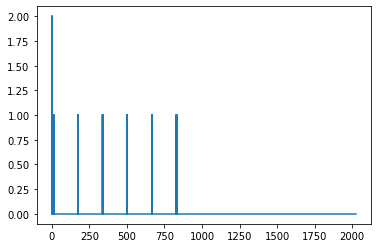

2 5 1200 1080 163.84 7.68 2.56 1


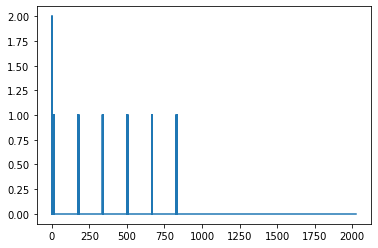

2 5 1200 1080 163.84 10.24 2.56 1


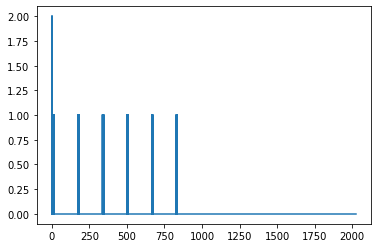

2 5 1200 1080 163.84 12.8 2.56 1


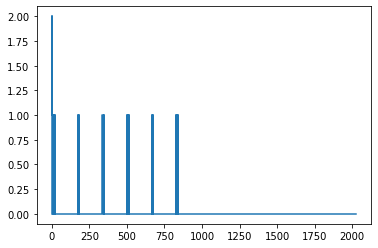

2 5 1200 1080 163.84 15.36 2.56 1


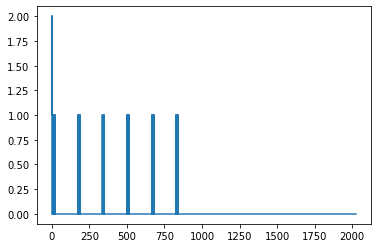

2 5 1200 1080 163.84 17.92 2.56 1


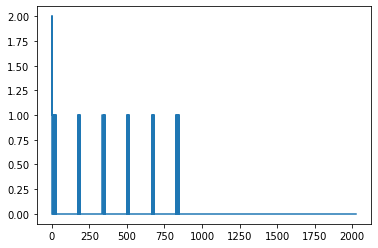

2 5 1200 1080 163.84 20.48 2.56 1


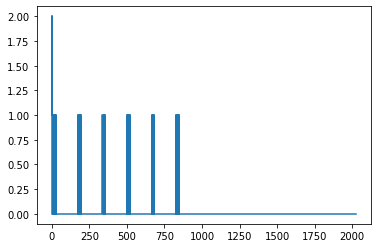

2 5 1200 1080 163.84 23.04 2.56 1


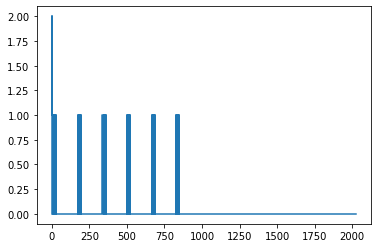

2 5 1200 1080 163.84 25.6 2.56 1


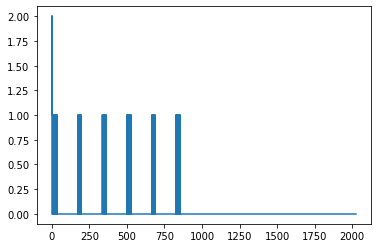

2 5 1200 1080 163.84 28.16 2.56 1


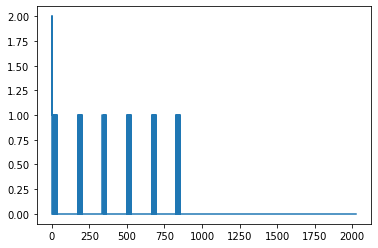

2 5 1200 1080 163.84 30.72 2.56 1


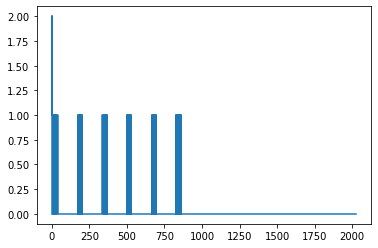

2 5 1200 1080 163.84 33.28 2.56 1


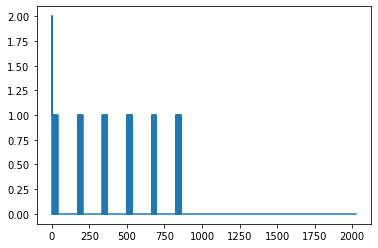

2 5 1200 1080 163.84 35.84 2.56 1


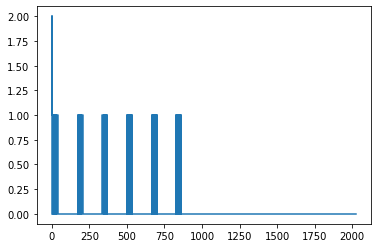

2 5 1200 1080 163.84 38.4 2.56 1


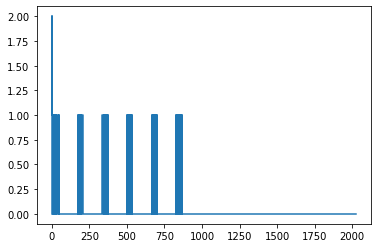

2 5 1200 1080 163.84 40.96 2.56 1


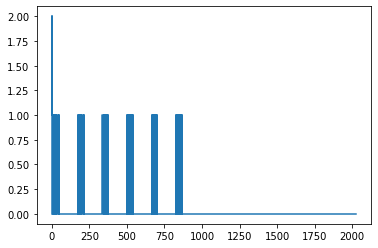

2 5 1200 1200 10.24 2.56 2.56 1


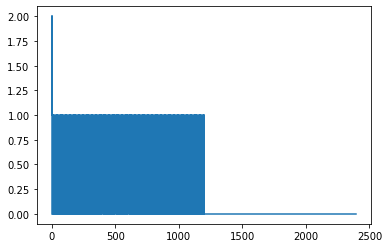

2 5 1200 1200 10.24 5.12 2.56 1


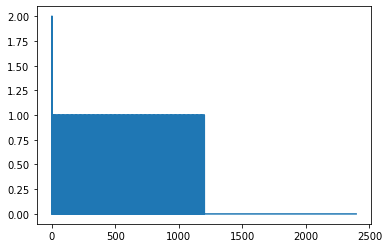

2 5 1200 1200 10.24 7.68 2.56 1


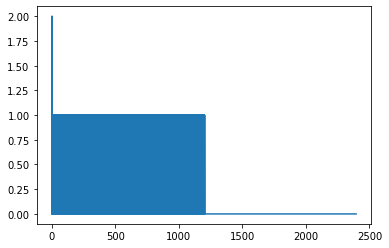

2 5 1200 1200 10.24 10.24 2.56 1


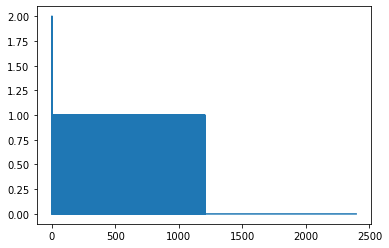

2 5 1200 1200 20.48 12.8 2.56 1


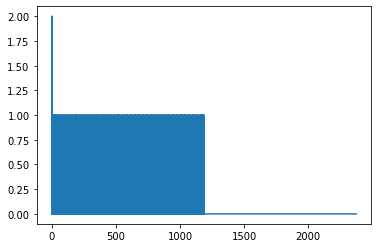

2 5 1200 1200 20.48 15.36 2.56 1


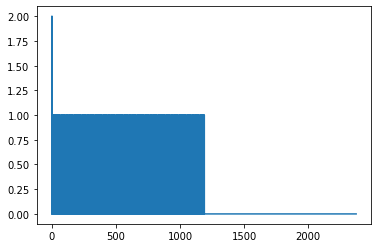

2 5 1200 1200 20.48 17.92 2.56 1


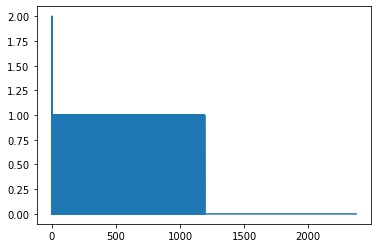

2 5 1200 1200 20.48 20.48 2.56 1


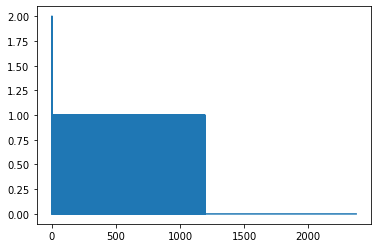

2 5 1200 1200 40.96 23.04 2.56 1


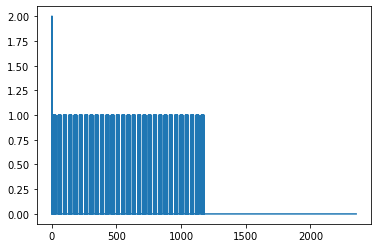

2 5 1200 1200 40.96 25.6 2.56 1


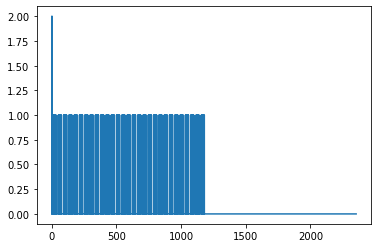

2 5 1200 1200 40.96 28.16 2.56 1


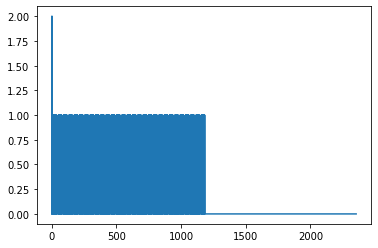

2 5 1200 1200 40.96 30.72 2.56 1


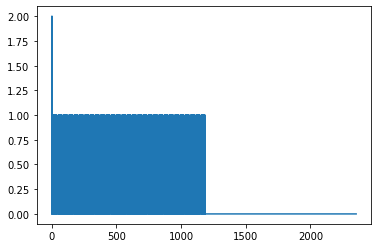

2 5 1200 1200 40.96 33.28 2.56 1


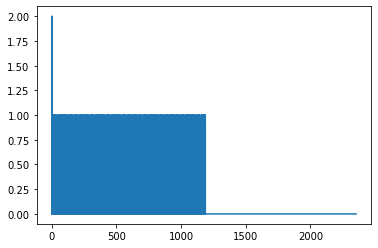

2 5 1200 1200 40.96 35.84 2.56 1


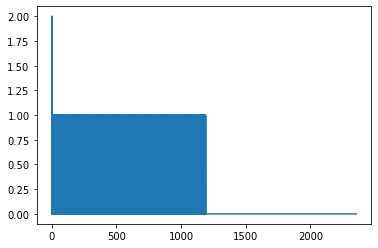

2 5 1200 1200 40.96 38.4 2.56 1


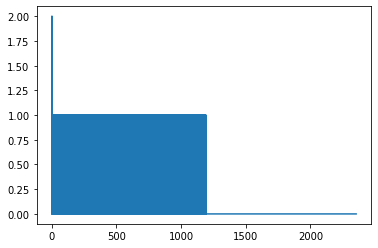

2 5 1200 1200 40.96 40.96 2.56 1


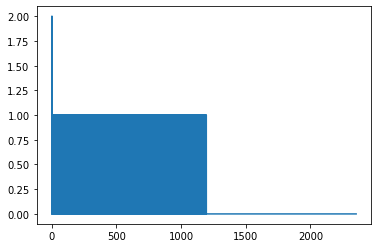

2 5 1800 1440 10.24 2.56 2.56 1


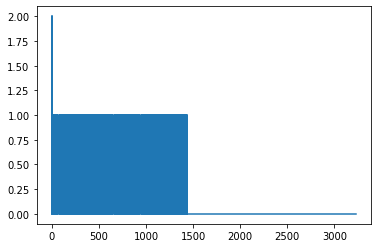

2 5 1800 1440 10.24 5.12 2.56 1


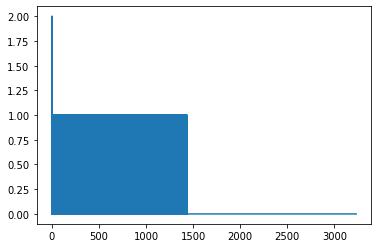

2 5 1800 1440 10.24 7.68 2.56 1


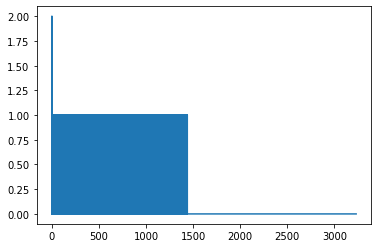

2 5 1800 1440 10.24 10.24 2.56 1


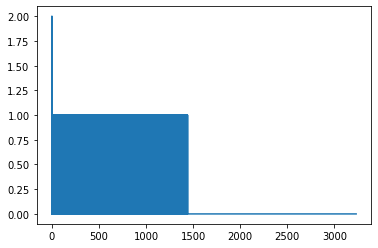

2 5 1800 1440 20.48 12.8 2.56 1


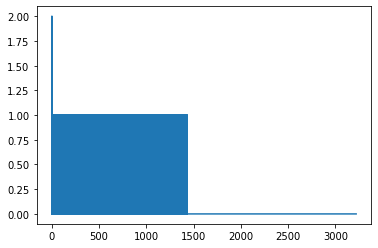

2 5 1800 1440 20.48 15.36 2.56 1


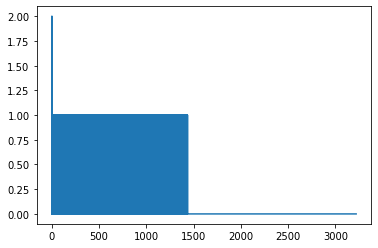

2 5 1800 1440 20.48 17.92 2.56 1


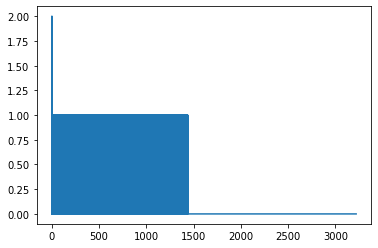

2 5 1800 1440 20.48 20.48 2.56 1


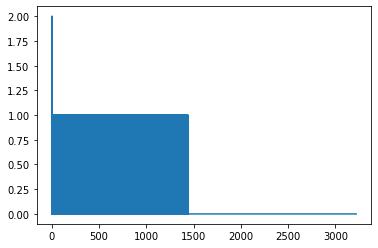

2 5 1800 1440 40.96 23.04 2.56 1


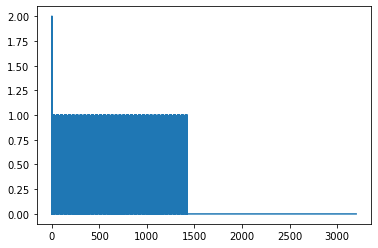

2 5 1800 1440 40.96 25.6 2.56 1


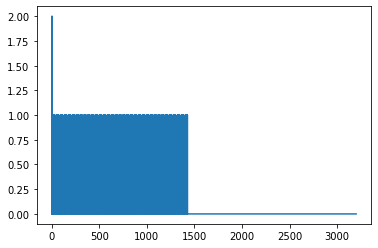

2 5 1800 1440 40.96 28.16 2.56 1


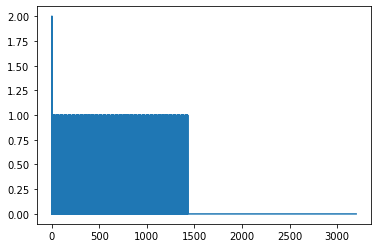

2 5 1800 1440 40.96 30.72 2.56 1


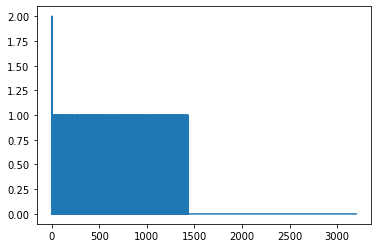

2 5 1800 1440 40.96 33.28 2.56 1


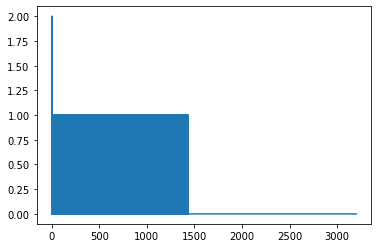

2 5 1800 1440 40.96 35.84 2.56 1


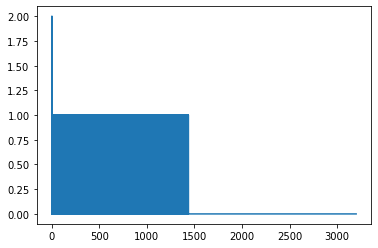

2 5 1800 1440 40.96 38.4 2.56 1


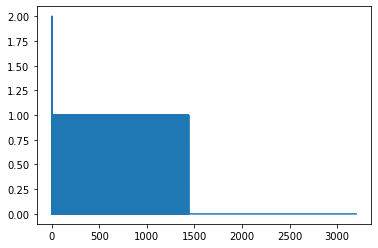

2 5 1800 1440 40.96 40.96 2.56 1


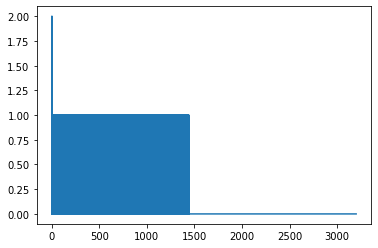

2 5 1800 1800 10.24 2.56 2.56 1


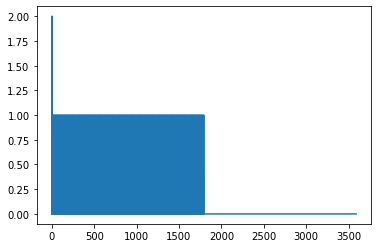

2 5 1800 1800 10.24 5.12 2.56 1


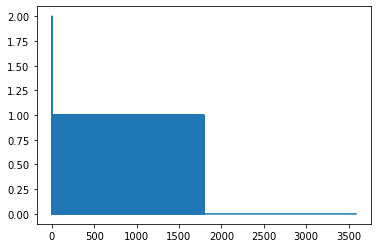

2 5 1800 1800 10.24 7.68 2.56 1


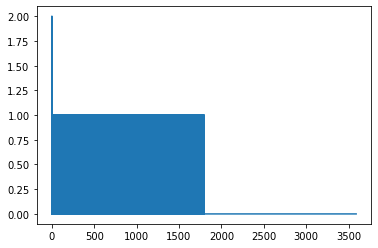

2 5 1800 1800 10.24 10.24 2.56 1


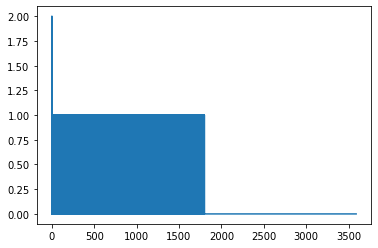

2 5 1800 1800 20.48 2.56 2.56 1


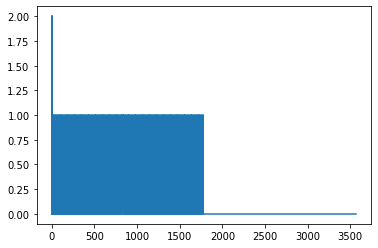

2 5 1800 1800 20.48 5.12 2.56 1


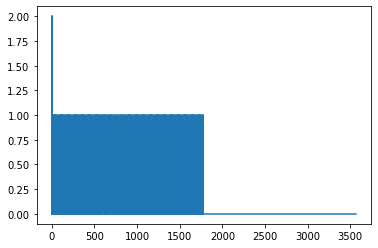

2 5 1800 1800 20.48 7.68 2.56 1


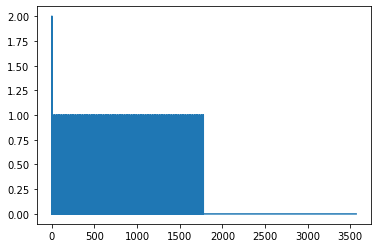

2 5 1800 1800 20.48 10.24 2.56 1


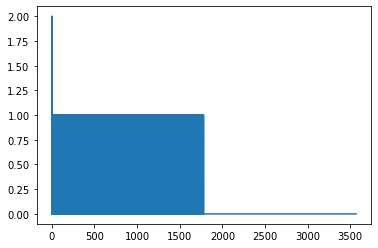

2 5 1800 1800 20.48 12.8 2.56 1


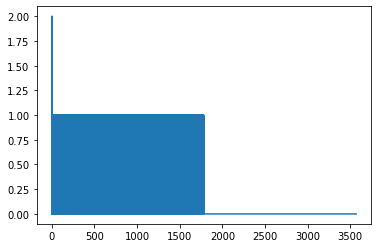

2 5 1800 1800 20.48 15.36 2.56 1


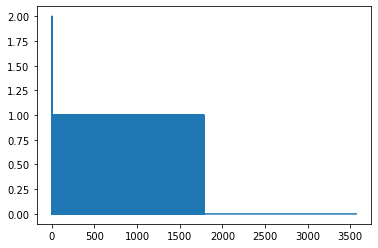

2 5 1800 1800 20.48 17.92 2.56 1


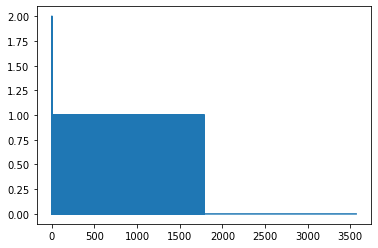

2 5 1800 1800 20.48 20.48 2.56 1


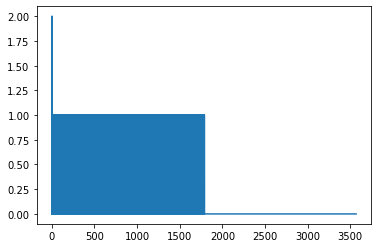

2 5 1800 1800 40.96 2.56 2.56 1


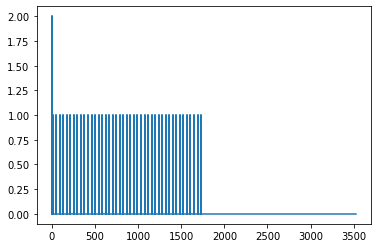

2 5 1800 1800 40.96 5.12 2.56 1


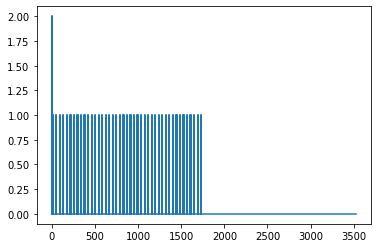

2 5 1800 1800 40.96 7.68 2.56 1


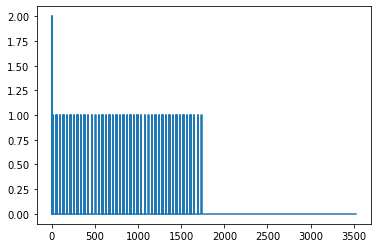

2 5 1800 1800 40.96 10.24 2.56 1


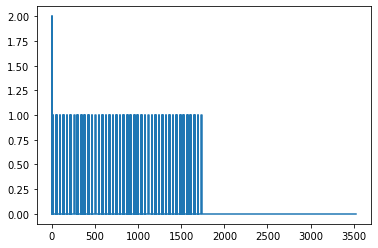

2 5 1800 1800 40.96 12.8 2.56 1


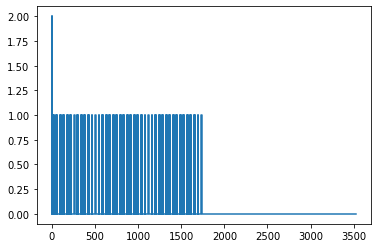

2 5 1800 1800 40.96 15.36 2.56 1


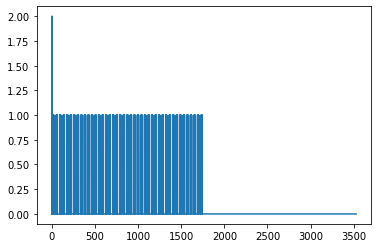

2 5 1800 1800 40.96 17.92 2.56 1


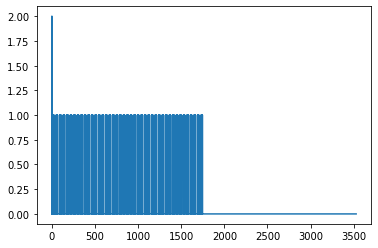

2 5 1800 1800 40.96 20.48 2.56 1


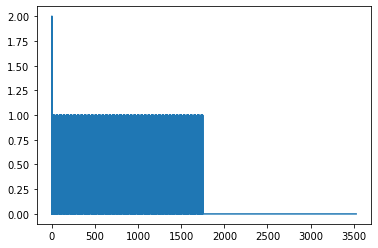

2 5 1800 1800 40.96 23.04 2.56 1


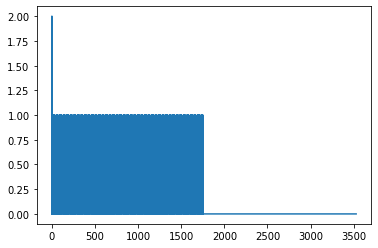

2 5 1800 1800 40.96 25.6 2.56 1


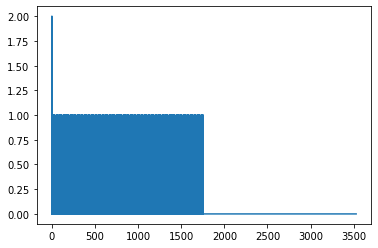

2 5 1800 1800 40.96 28.16 2.56 1


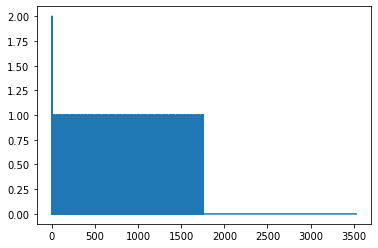

2 5 1800 1800 40.96 30.72 2.56 1


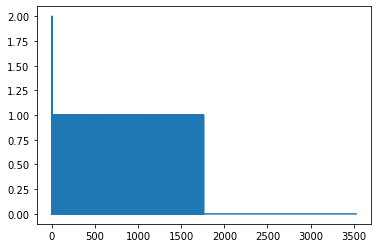

2 5 1800 1800 40.96 33.28 2.56 1


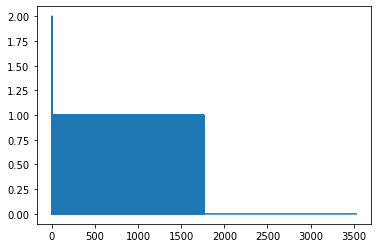

2 5 1800 1800 40.96 35.84 2.56 1


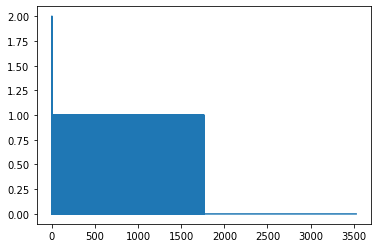

2 5 1800 1800 40.96 38.4 2.56 1


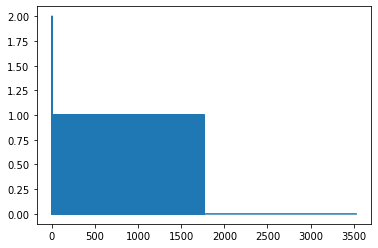

2 5 1800 1800 40.96 40.96 2.56 1


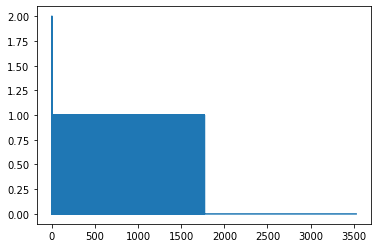

2 5 1800 1800 81.92 2.56 2.56 1


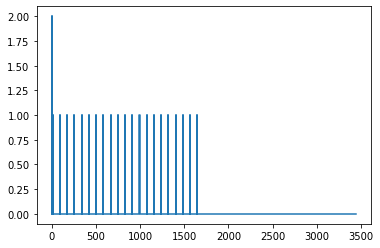

2 5 1800 1800 81.92 5.12 2.56 1


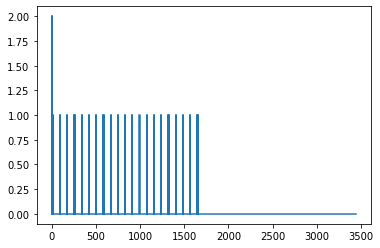

2 5 1800 1800 81.92 7.68 2.56 1


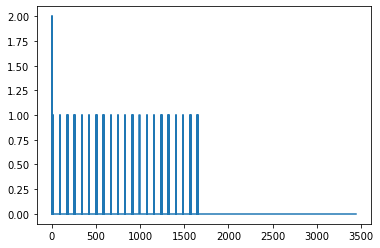

2 5 1800 1800 81.92 10.24 2.56 1


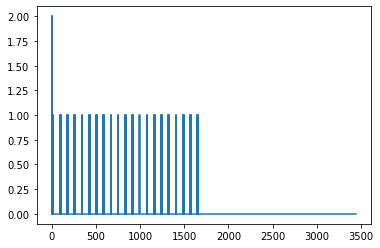

2 5 1800 1800 81.92 12.8 2.56 1


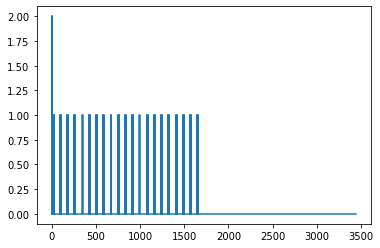

2 5 1800 1800 81.92 15.36 2.56 1


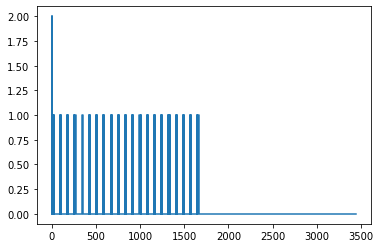

2 5 1800 1800 81.92 17.92 2.56 1


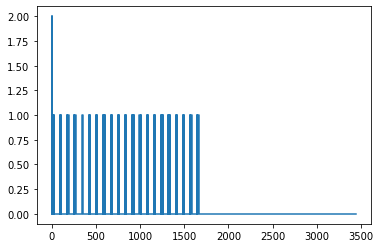

2 5 1800 1800 81.92 20.48 2.56 1


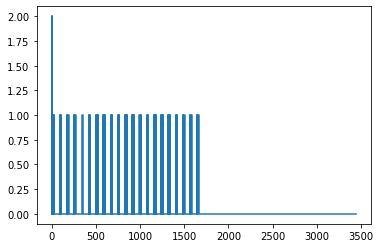

2 5 1800 1800 81.92 23.04 2.56 1


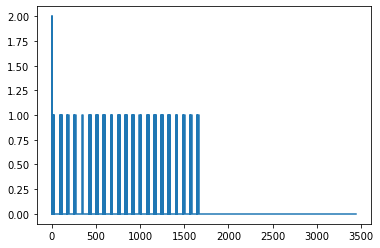

2 5 1800 1800 81.92 25.6 2.56 1


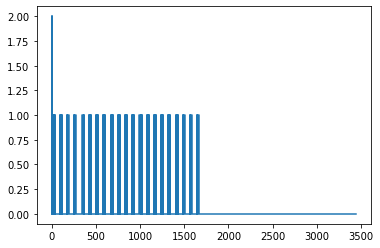

2 5 1800 1800 81.92 28.16 2.56 1


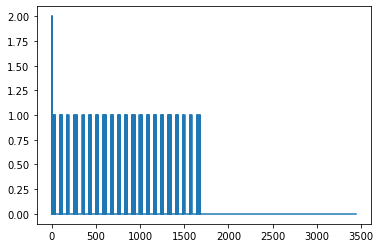

2 5 1800 1800 81.92 30.72 2.56 1


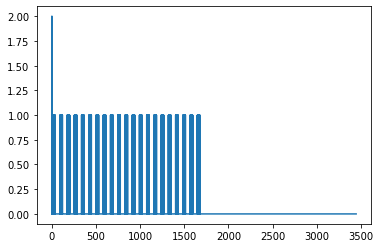

2 5 1800 1800 81.92 33.28 2.56 1


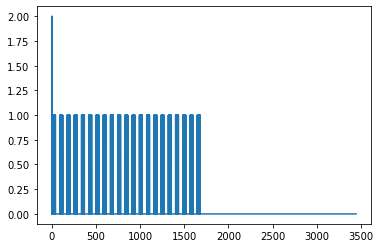

2 5 1800 1800 81.92 35.84 2.56 1


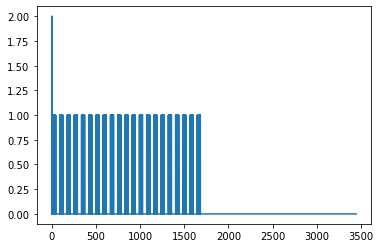

2 5 1800 1800 81.92 38.4 2.56 1


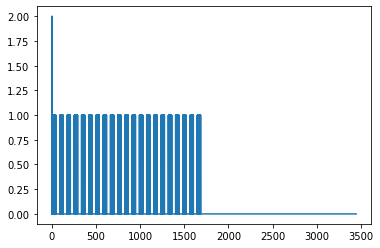

2 5 1800 1800 81.92 40.96 2.56 1


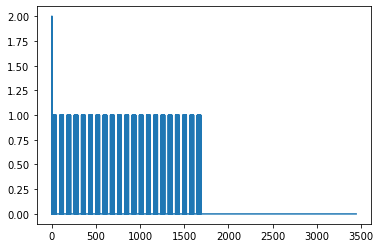

2 5 2400 2160 10.24 2.56 2.56 1


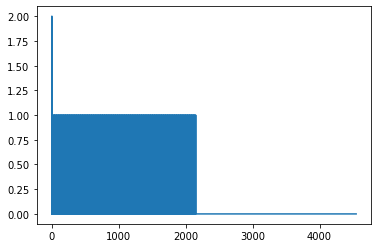

2 5 2400 2160 10.24 5.12 2.56 1


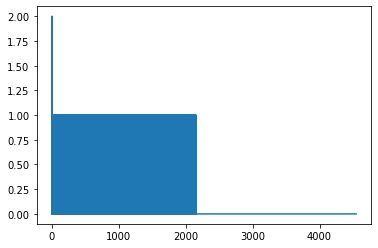

2 5 2400 2160 10.24 7.68 2.56 1


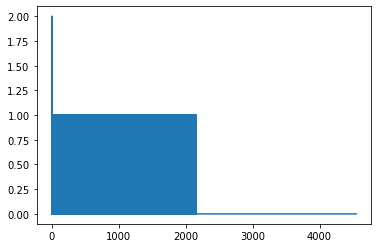

2 5 2400 2160 10.24 10.24 2.56 1


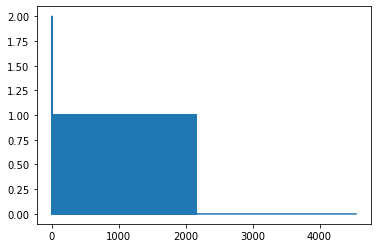

2 5 2400 2160 20.48 12.8 2.56 1


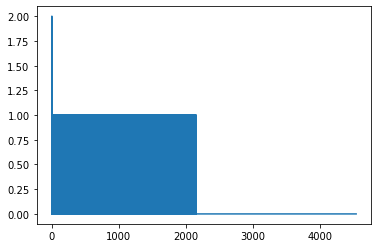

2 5 2400 2160 20.48 15.36 2.56 1


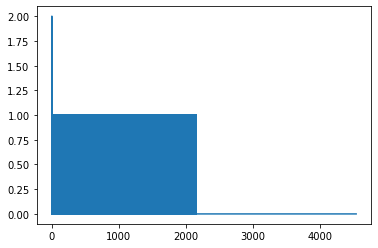

2 5 2400 2160 20.48 17.92 2.56 1


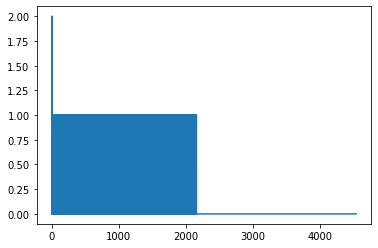

2 5 2400 2160 20.48 20.48 2.56 1


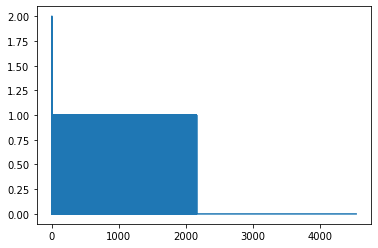

2 5 2400 2160 40.96 23.04 2.56 1


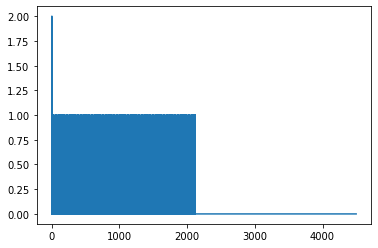

2 5 2400 2160 40.96 25.6 2.56 1


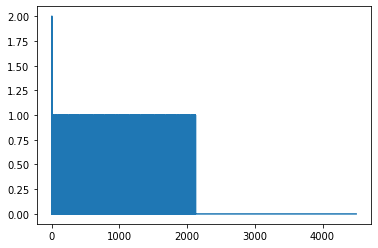

2 5 2400 2160 40.96 28.16 2.56 1


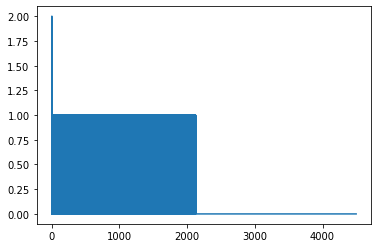

2 5 2400 2160 40.96 30.72 2.56 1


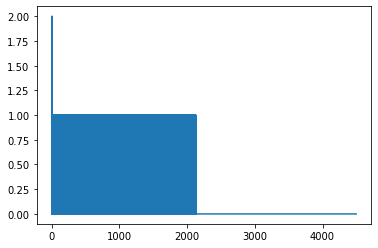

2 5 2400 2160 40.96 33.28 2.56 1


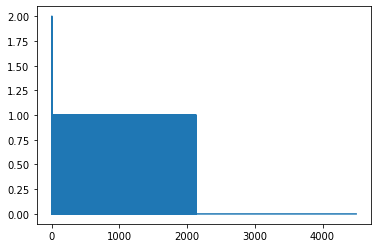

2 5 2400 2160 40.96 35.84 2.56 1


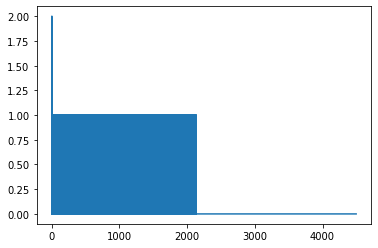

2 5 2400 2160 40.96 38.4 2.56 1


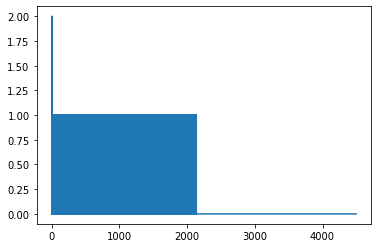

2 5 2400 2160 40.96 40.96 2.56 1


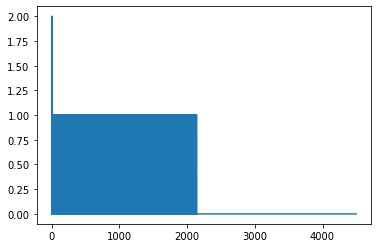

2 5 2400 2400 10.24 2.56 2.56 1


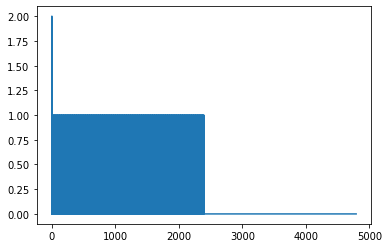

2 5 2400 2400 10.24 5.12 2.56 1


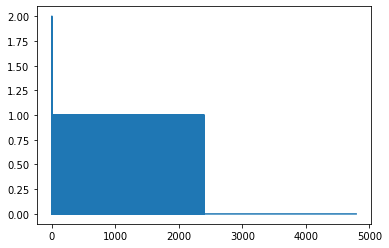

2 5 2400 2400 10.24 7.68 2.56 1


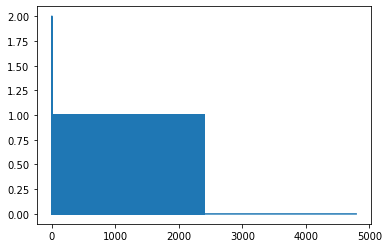

2 5 2400 2400 10.24 10.24 2.56 1


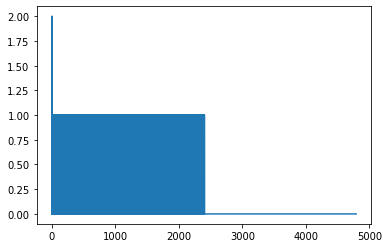

2 5 2400 2400 20.48 12.8 2.56 1


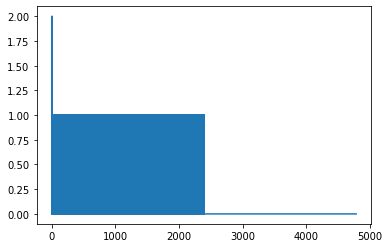

2 5 2400 2400 20.48 15.36 2.56 1


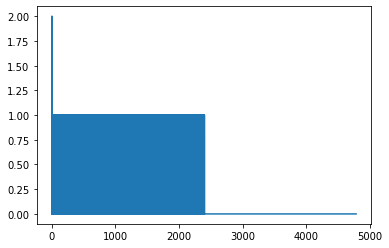

2 5 2400 2400 20.48 17.92 2.56 1


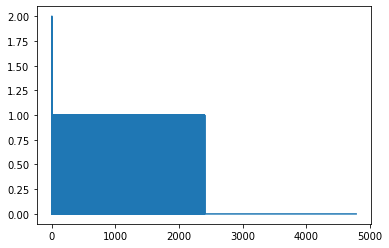

2 5 2400 2400 20.48 20.48 2.56 1


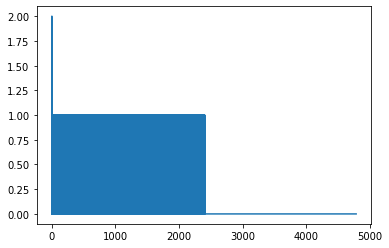

2 5 2400 2400 40.96 23.04 2.56 1


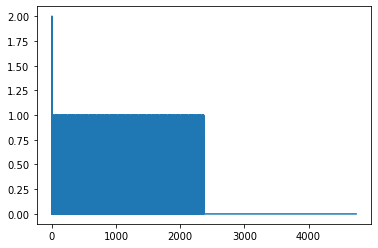

2 5 2400 2400 40.96 25.6 2.56 1


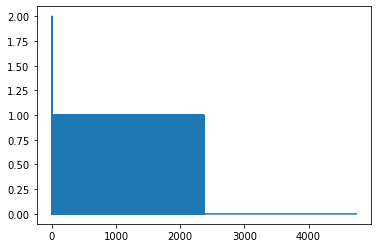

2 5 2400 2400 40.96 28.16 2.56 1


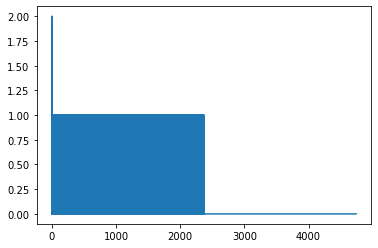

2 5 2400 2400 40.96 30.72 2.56 1


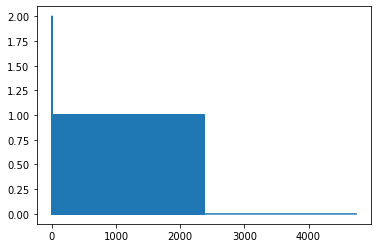

2 5 2400 2400 40.96 33.28 2.56 1


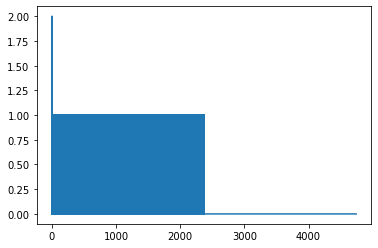

2 5 2400 2400 40.96 35.84 2.56 1


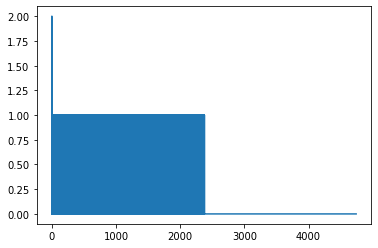

2 5 2400 2400 40.96 38.4 2.56 1


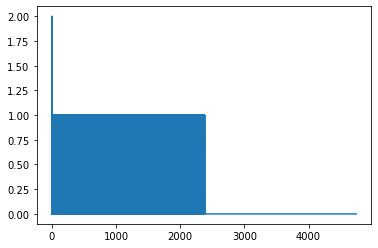

2 5 2400 2400 40.96 40.96 2.56 1


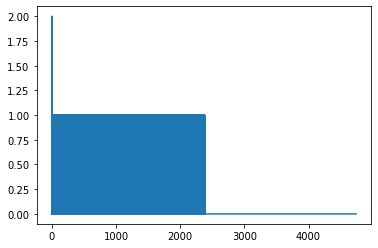

2 5 3000 2520 10.24 2.56 2.56 1


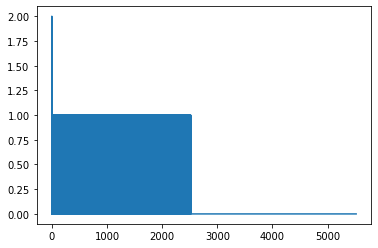

2 5 3000 2520 10.24 5.12 2.56 1


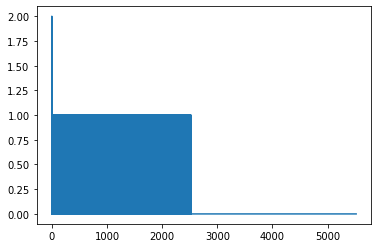

2 5 3000 2520 10.24 7.68 2.56 1


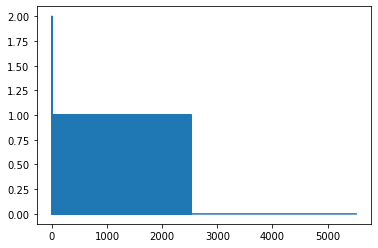

2 5 3000 2520 10.24 10.24 2.56 1


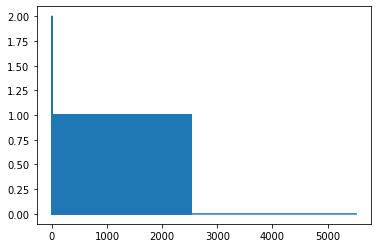

2 5 3000 2520 20.48 2.56 2.56 1


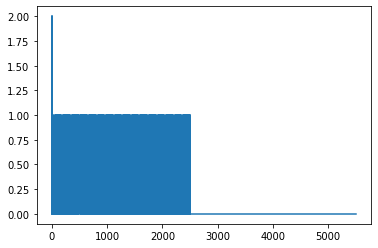

2 5 3000 2520 20.48 5.12 2.56 1


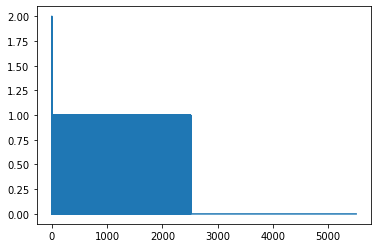

2 5 3000 2520 20.48 7.68 2.56 1


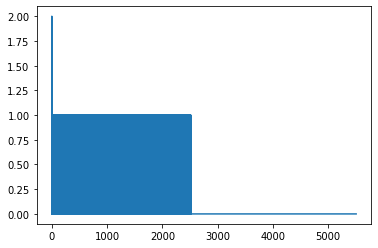

2 5 3000 2520 20.48 10.24 2.56 1


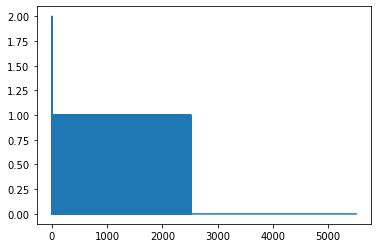

2 5 3000 2520 20.48 12.8 2.56 1


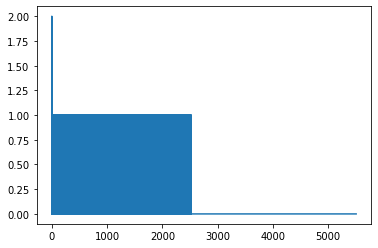

2 5 3000 2520 20.48 15.36 2.56 1


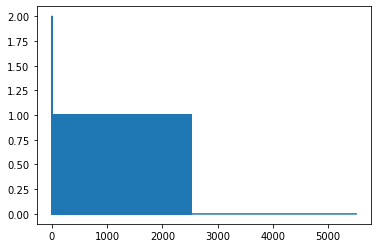

2 5 3000 2520 20.48 17.92 2.56 1


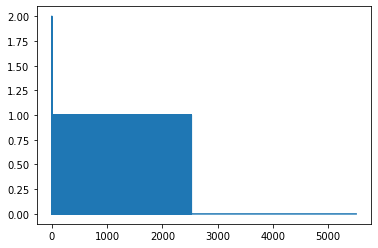

2 5 3000 2520 20.48 20.48 2.56 1


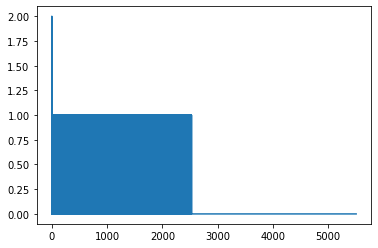

2 5 3000 2520 40.96 2.56 2.56 1


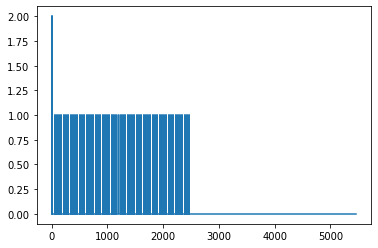

2 5 3000 2520 40.96 5.12 2.56 1


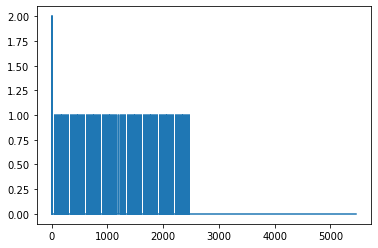

2 5 3000 2520 40.96 7.68 2.56 1


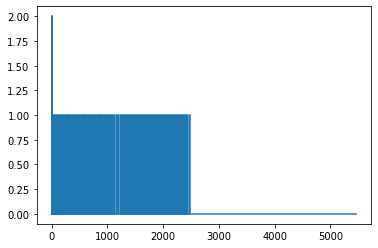

2 5 3000 2520 40.96 10.24 2.56 1


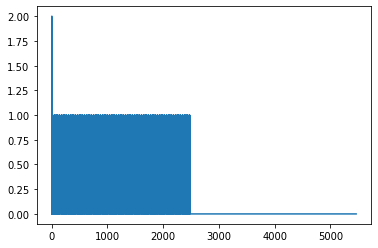

2 5 3000 2520 40.96 12.8 2.56 1


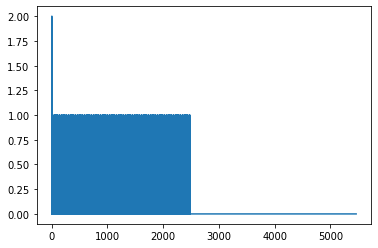

2 5 3000 2520 40.96 15.36 2.56 1


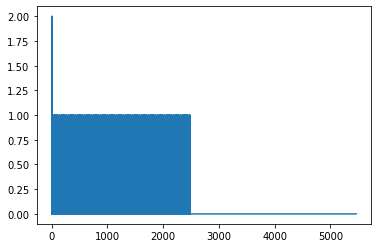

2 5 3000 2520 40.96 17.92 2.56 1


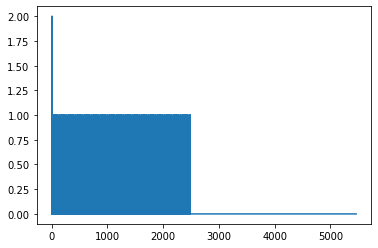

2 5 3000 2520 40.96 20.48 2.56 1


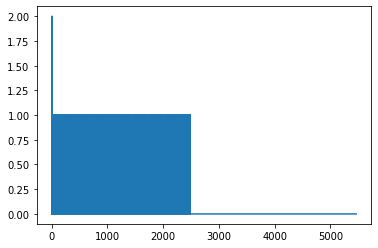

2 5 3000 2520 40.96 23.04 2.56 1


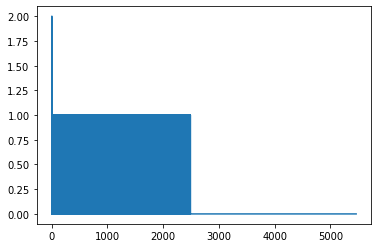

2 5 3000 2520 40.96 25.6 2.56 1


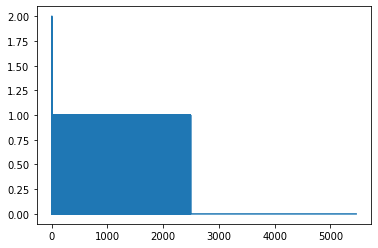

2 5 3000 2520 40.96 28.16 2.56 1


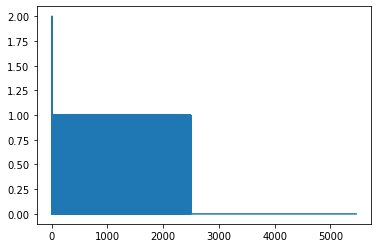

2 5 3000 2520 40.96 30.72 2.56 1


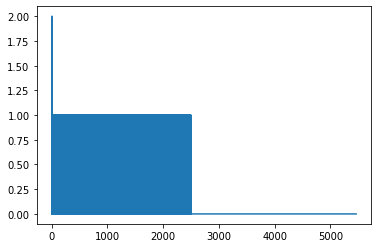

2 5 3000 2520 40.96 33.28 2.56 1


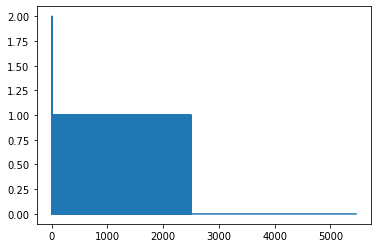

2 5 3000 2520 40.96 35.84 2.56 1


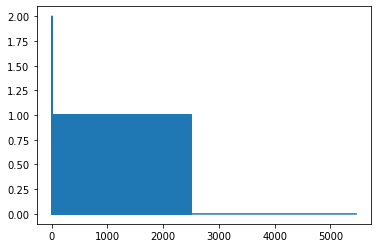

2 5 3000 2520 40.96 38.4 2.56 1


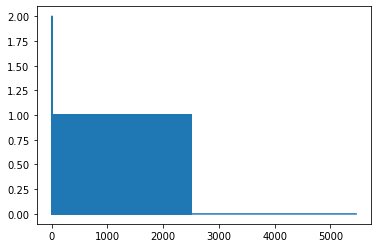

2 5 3000 2520 40.96 40.96 2.56 1


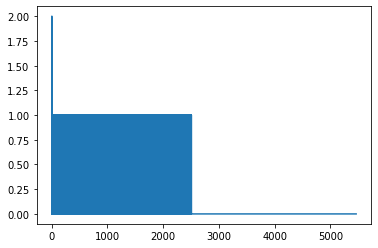

2 5 3000 2520 81.92 2.56 2.56 1


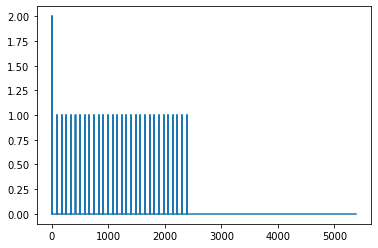

2 5 3000 2520 81.92 5.12 2.56 1


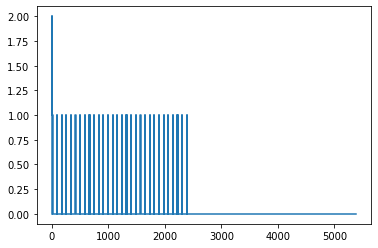

2 5 3000 2520 81.92 7.68 2.56 1


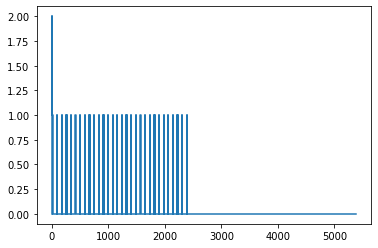

2 5 3000 2520 81.92 10.24 2.56 1


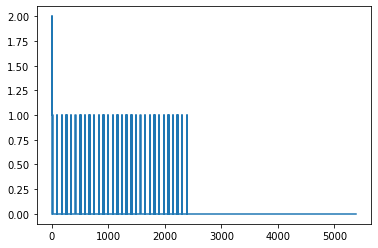

2 5 3000 2520 81.92 12.8 2.56 1


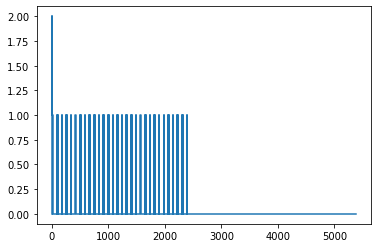

2 5 3000 2520 81.92 15.36 2.56 1


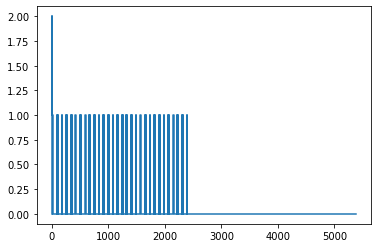

2 5 3000 2520 81.92 17.92 2.56 1


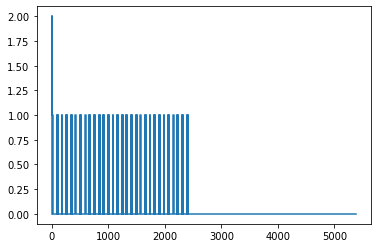

2 5 3000 2520 81.92 20.48 2.56 1


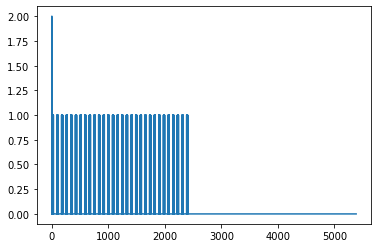

2 5 3000 2520 81.92 23.04 2.56 1


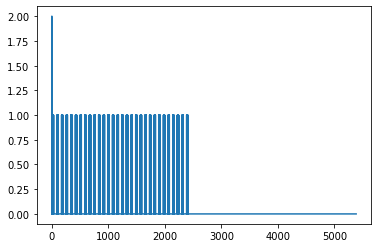

2 5 3000 2520 81.92 25.6 2.56 1


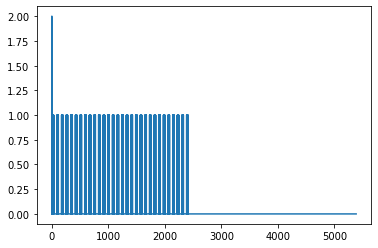

2 5 3000 2520 81.92 28.16 2.56 1


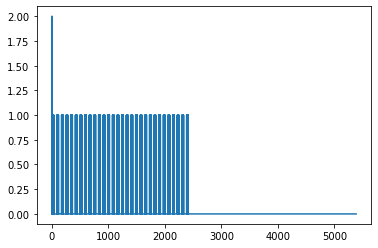

2 5 3000 2520 81.92 30.72 2.56 1


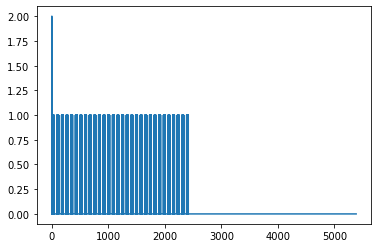

2 5 3000 2520 81.92 33.28 2.56 1


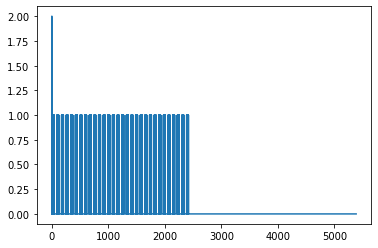

2 5 3000 2520 81.92 35.84 2.56 1


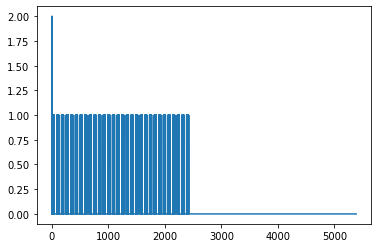

2 5 3000 2520 81.92 38.4 2.56 1


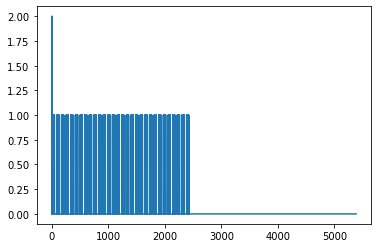

2 5 3000 2520 81.92 40.96 2.56 1


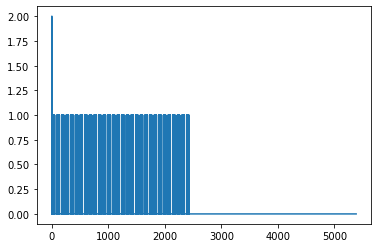

2 5 3000 2520 163.84 2.56 2.56 1


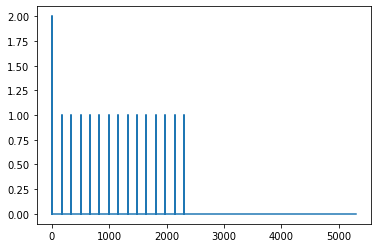

2 5 3000 2520 163.84 5.12 2.56 1


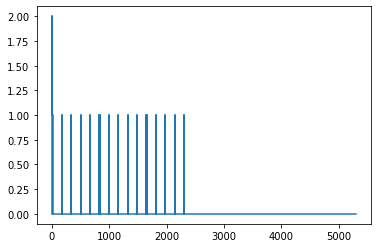

2 5 3000 2520 163.84 7.68 2.56 1


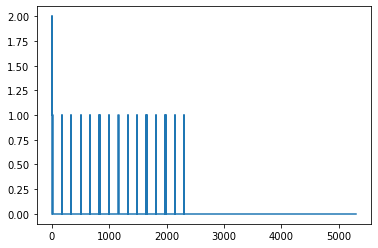

2 5 3000 2520 163.84 10.24 2.56 1


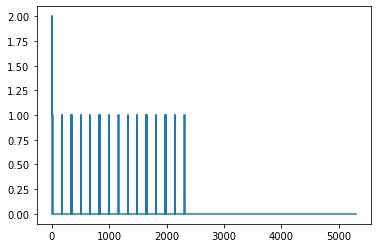

2 5 3000 2520 163.84 12.8 2.56 1


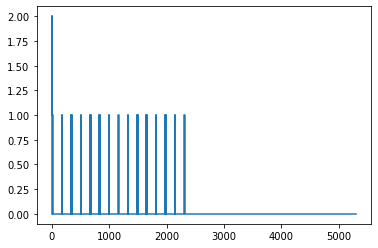

2 5 3000 2520 163.84 15.36 2.56 1


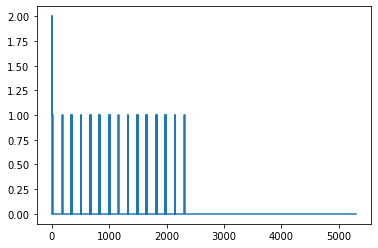

2 5 3000 2520 163.84 17.92 2.56 1


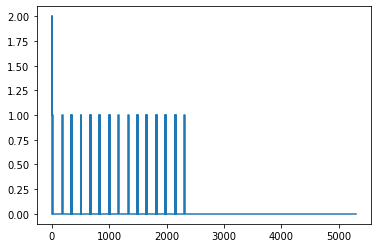

2 5 3000 2520 163.84 20.48 2.56 1


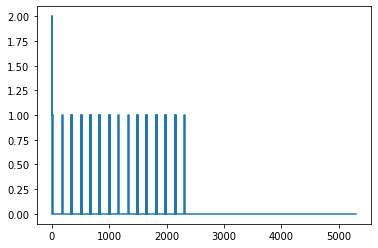

2 5 3000 2520 163.84 23.04 2.56 1


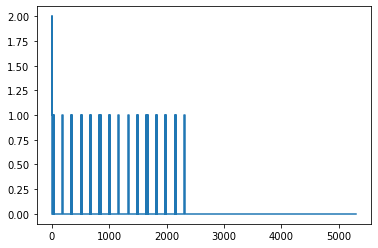

2 5 3000 2520 163.84 25.6 2.56 1


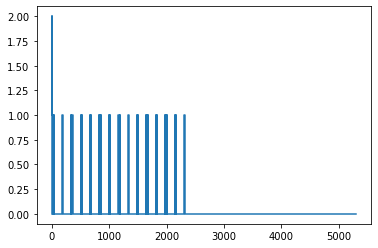

2 5 3000 2520 163.84 28.16 2.56 1


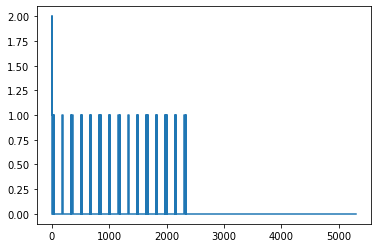

2 5 3000 2520 163.84 30.72 2.56 1


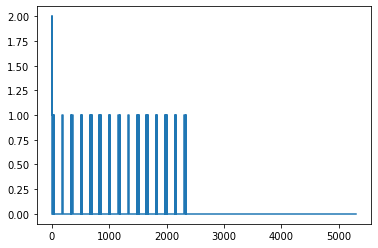

2 5 3000 2520 163.84 33.28 2.56 1


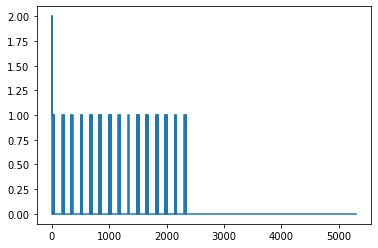

2 5 3000 2520 163.84 35.84 2.56 1


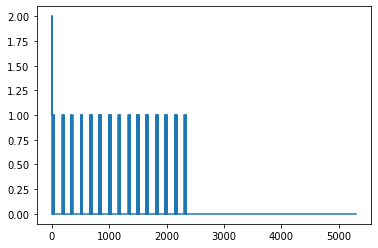

2 5 3000 2520 163.84 38.4 2.56 1


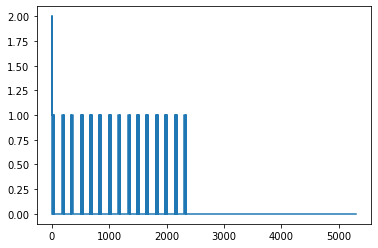

2 5 3000 2520 163.84 40.96 2.56 1


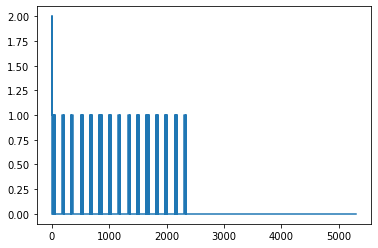

In [245]:
e = edrx()
# e.test()
# e.param(2, 30, 60, 30, 20, 10, 2.5, 2)
e.types()

In [435]:
tMO_MT = (2,2)
tInactivity = (1, 30)

def edrx(tM, tI):
    print(tI[0], tI[1])
    
edrx(tInactivity)

TypeError: edrx() missing 1 required positional argument: 'tI'

## Martinez tests

In [27]:
## doesn't work yet

from numpy import genfromtxt

def view(file, skiph=1, skipf=1):
    # genfromtxt?
    data = genfromtxt(file, delimiter=',', names=True, skip_header=skiph, skip_footer=skipf)
    # np.set_printoptions(precision=1, suppress=True)
    # np.set_printoptions(suppress=True, formatter={'float_kind':'{:10.0f}'.format}, linewidth=130)
    print(data)
    names = data.dtype.names
    print(names)
    for n in names:
        # print(data[n])
        plt.figure()
        plt.title(n)
        plt.plot(data[n])

# view('logs/4secPtau')
view('logs/test_logs/output.1.txt', 0, 0)#  names=True

ValueError: Some errors were detected !
    Line #3 (got 42 columns instead of 1)
    Line #5 (got 42 columns instead of 1)
    Line #7 (got 42 columns instead of 1)

In [715]:
## unecessary functions

def viewDict(dt):
    for key in dt:
        # print(data[n])
        plt.figure()
        plt.title(key)
        plt.plot(dt[key])

def viewDict2(dt1, dt2):
    for k1, k2 in zip(dt1, dt2):
        # print(data[n])
        plotDict(dt1, dt2, k1, k2)

def plotDict(dt1, dt2, k1, k2):
    plt.figure()
    plt.title(k1)
    t1 = np.arange(0, len(dt1[k1]), 1)
    t2 = np.arange(0, len(dt2[k2]), 1)
    plt.plot(t1, dt1[k1], 'g-', t2, dt2[k2], 'r-')
    
def subplotDict(dt1, dt2):
    h = len(dt1)/2
    plt.figure(figsize=(h,h))
    i = 1
    for k1, k2 in zip(dt1, dt2):
        plt.subplot(h,2,i)
        plt.title(k1)
        t1 = np.arange(0, len(dt1[k1]), 1)
        t2 = np.arange(0, len(dt2[k2]), 1)
        plt.plot(t1, dt1[k1], 'g-')
        plt.plot(t2, dt2[k2], 'r-')
        i += 1
    #     plt.xlabel('min')
    plt.show()

['index' 'idleTime' 'txTime' 'totalTime' 'energy' 'maxCurrent' 'Signal power' 'Total power' 'TX power' 'TX time' 'RX time'
 'Cell ID' 'ECL' 'SNR' 'EARFCN' 'PCI' 'RSRQ' 'RLC UL BLER' 'RLC DL BLER' 'MAC UL BLER' 'MAC DL BLER' 'Total TX bytes'
 'Total RX bytes' 'Total TX blocks' 'Total RX blocks' 'Total RTX blocks' 'Total ACK/NACK RX' 'RLC UL' 'RLC DL' 'MAC UL' 'MAC DL'
 'Current Allocated' 'Total Free' 'Max Free' 'Num Allocs' 'Num Frees' 'primary_cell' 'rsrp' 'rsrq' 'rssi' 'snr' '']


c:\users\d7rob\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


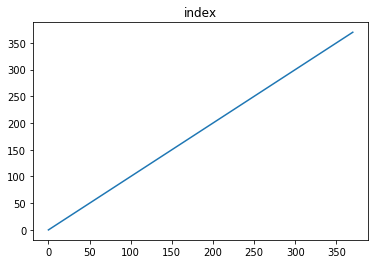

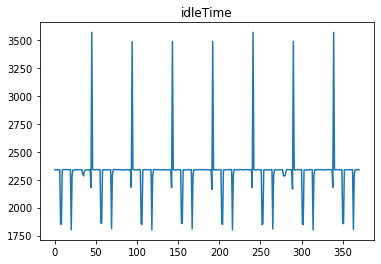

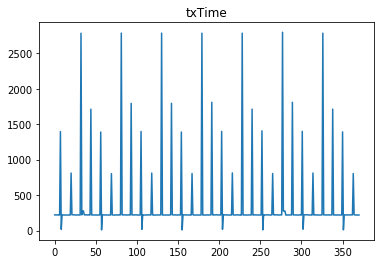

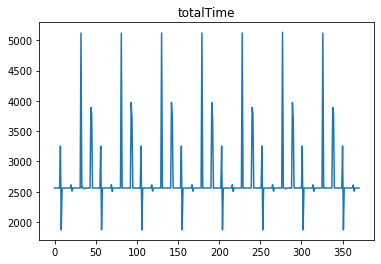

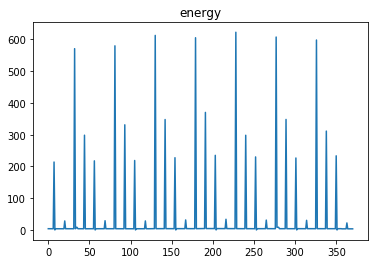

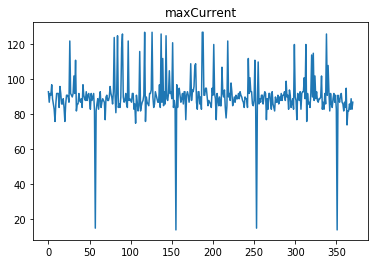

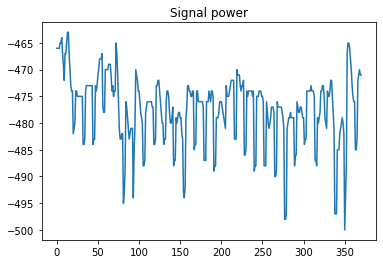

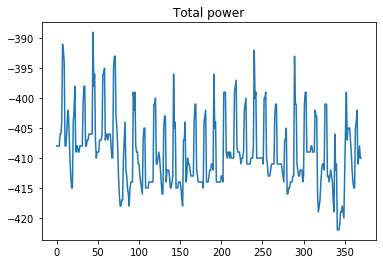

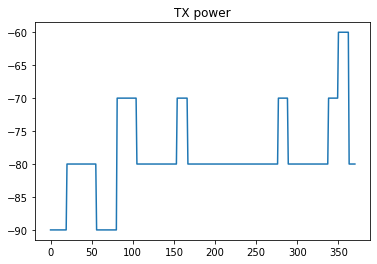

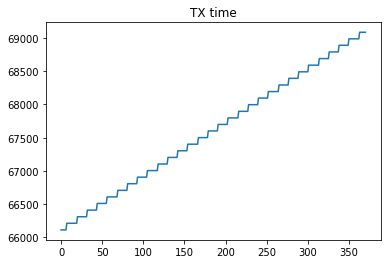

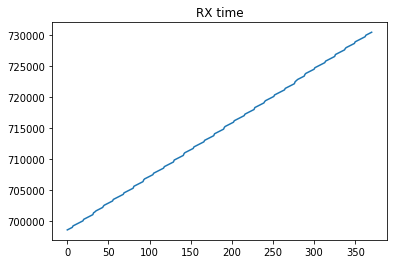

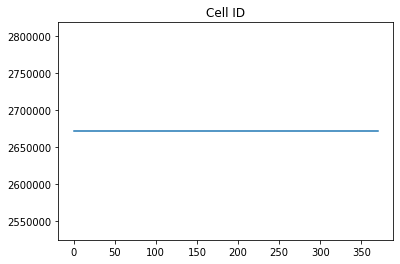

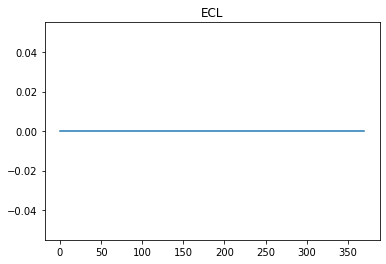

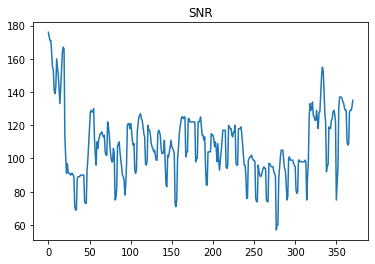

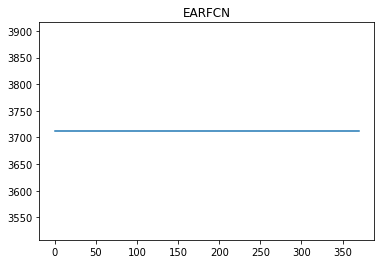

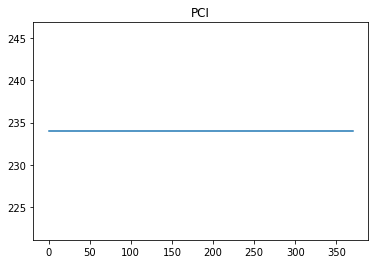

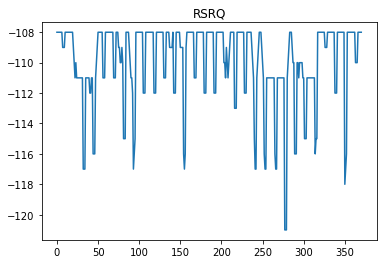

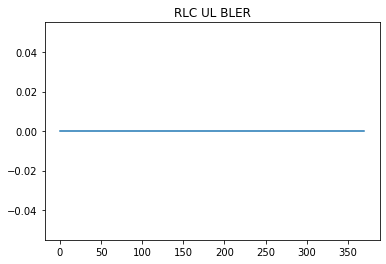

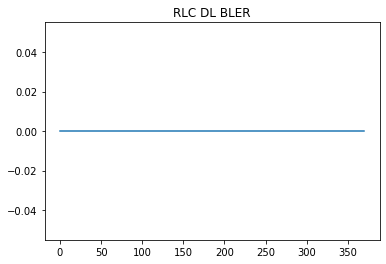

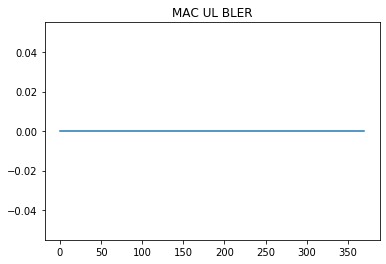

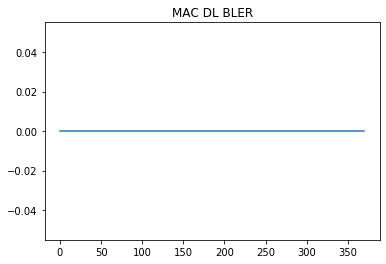

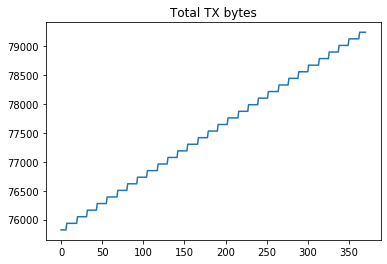

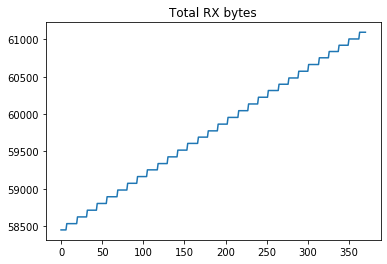

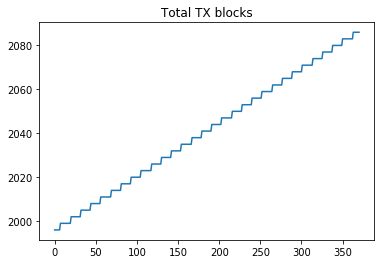

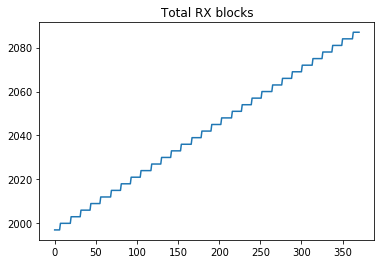

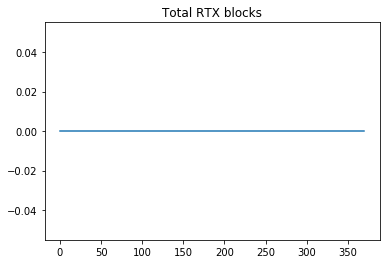

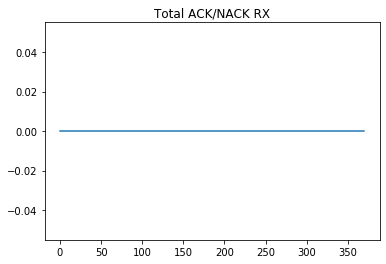

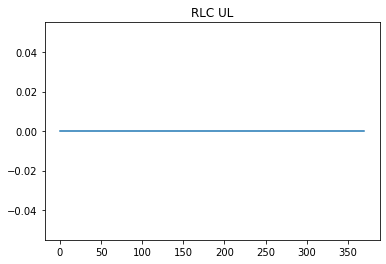

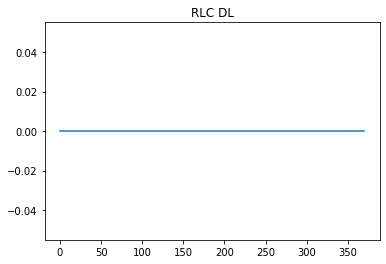

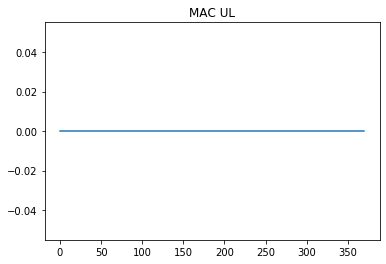

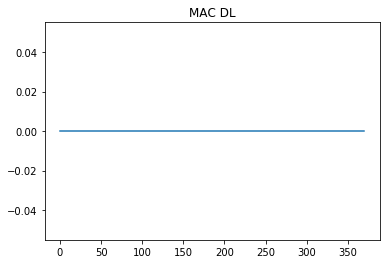

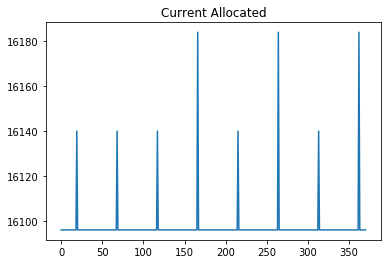

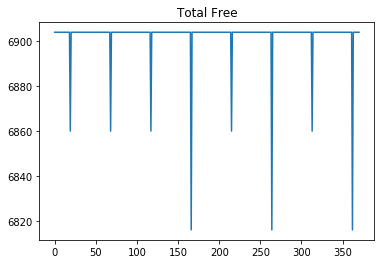

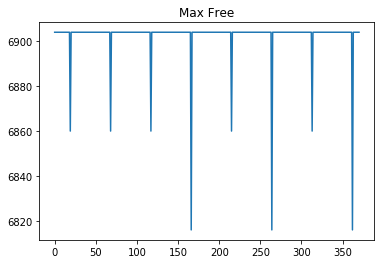

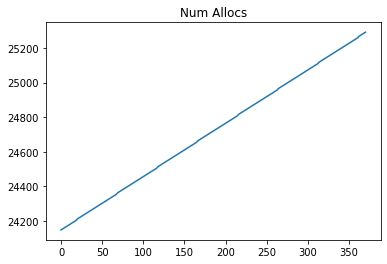

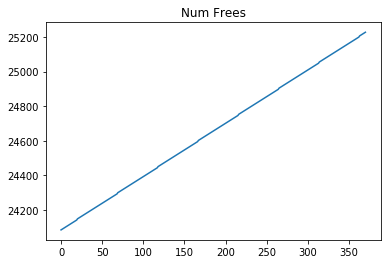

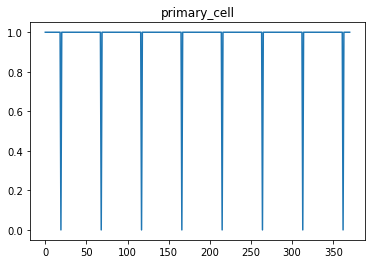

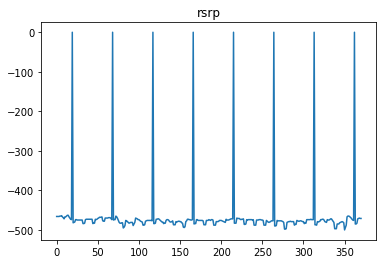

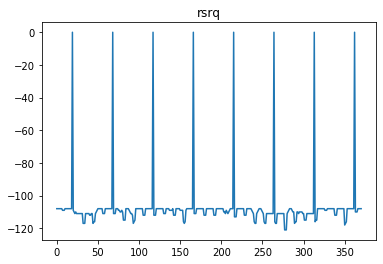

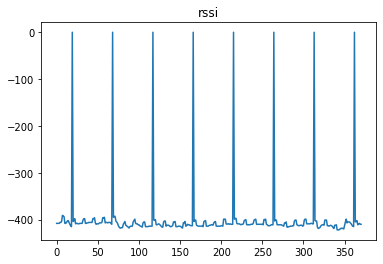

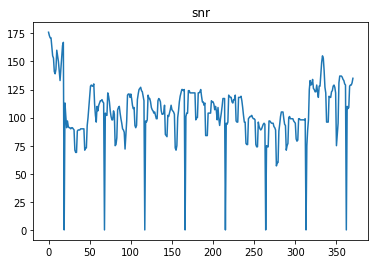

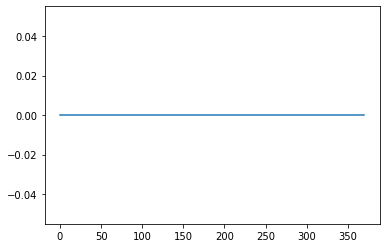

In [709]:
viewDict(data1)

['index' 'idleTime' 'txTime' 'totalTime' 'energy' 'maxCurrent' 'Signal power' 'Total power' 'TX power' 'TX time' 'RX time'
 'Cell ID' 'ECL' 'SNR' 'EARFCN' 'PCI' 'RSRQ' 'RLC UL BLER' 'RLC DL BLER' 'MAC UL BLER' 'MAC DL BLER' 'Total TX bytes'
 'Total RX bytes' 'Total TX blocks' 'Total RX blocks' 'Total RTX blocks' 'Total ACK/NACK RX' 'RLC UL' 'RLC DL' 'MAC UL' 'MAC DL'
 'Current Allocated' 'Total Free' 'Max Free' 'Num Allocs' 'Num Frees' 'primary_cell' 'rsrp' 'rsrq' 'rssi' 'snr' '']


c:\users\d7rob\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


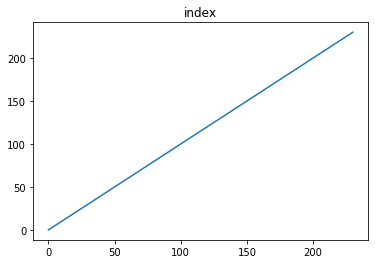

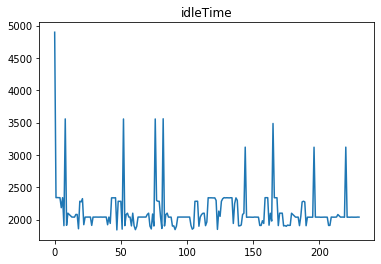

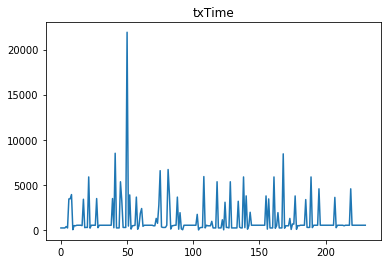

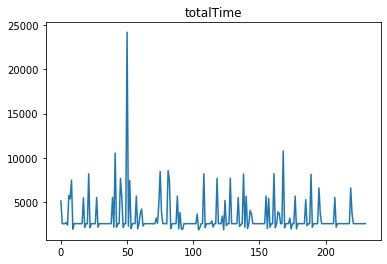

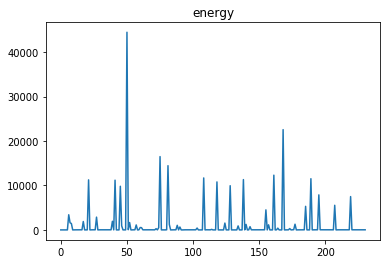

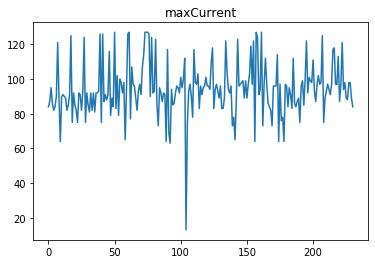

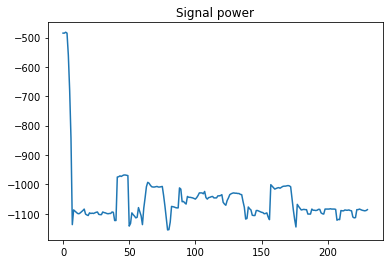

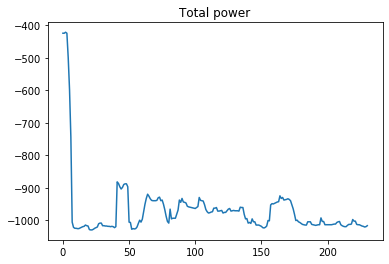

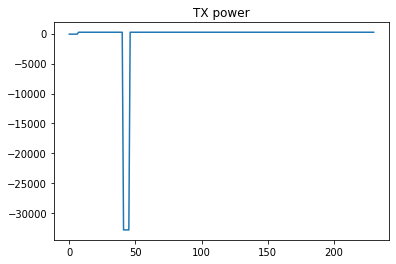

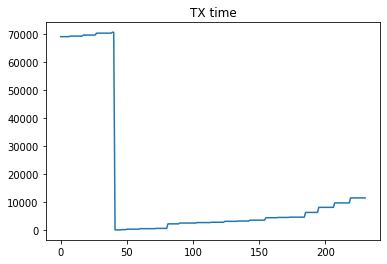

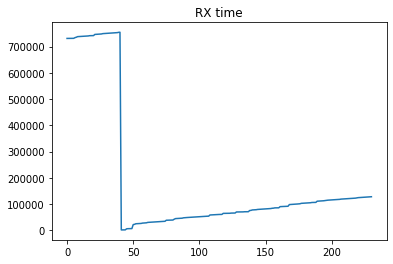

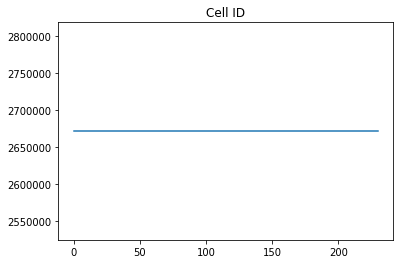

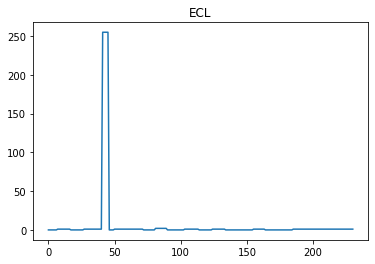

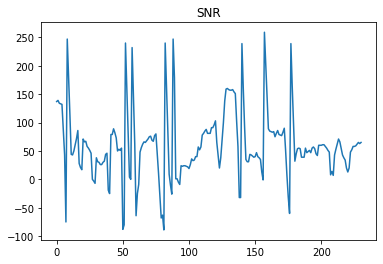

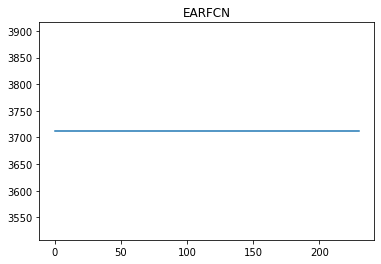

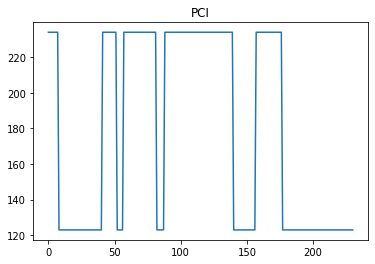

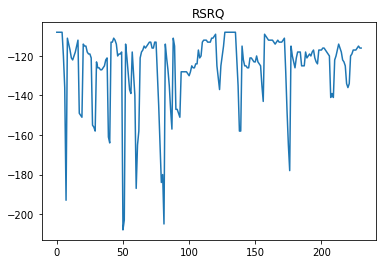

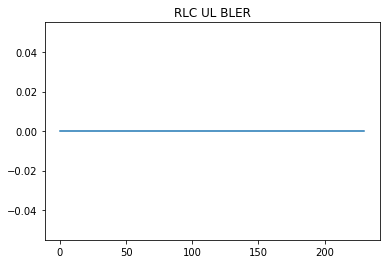

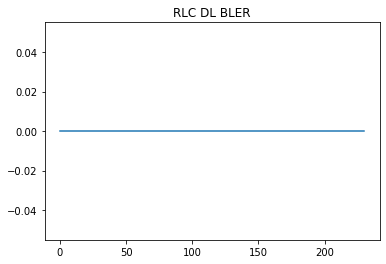

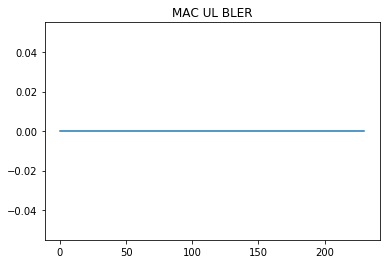

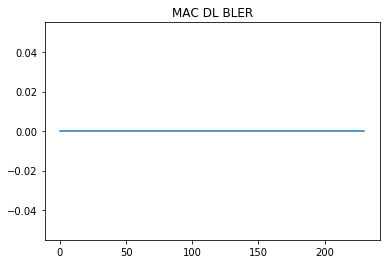

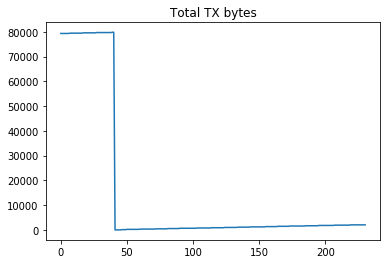

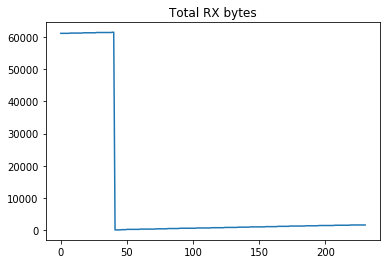

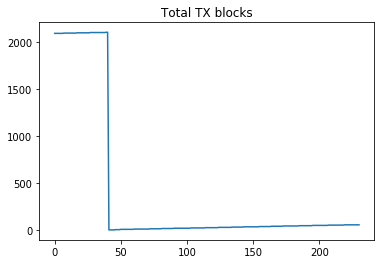

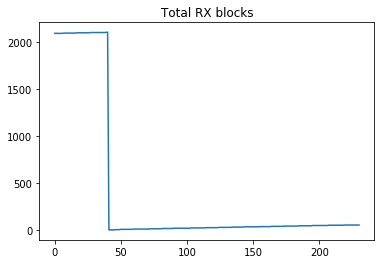

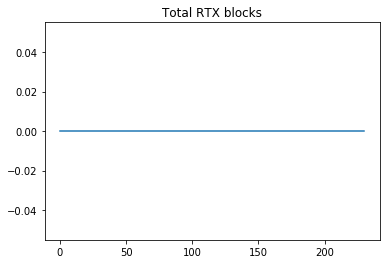

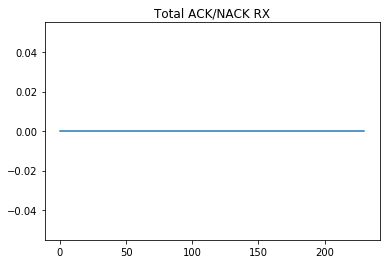

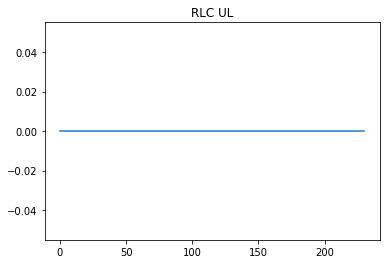

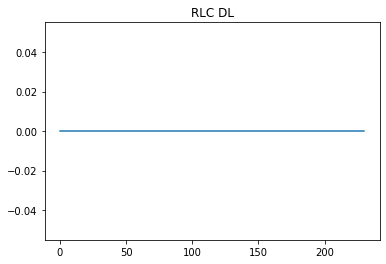

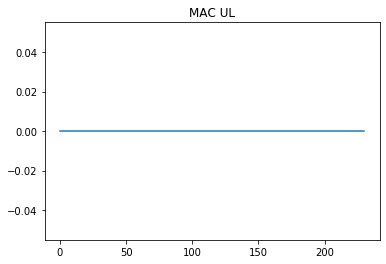

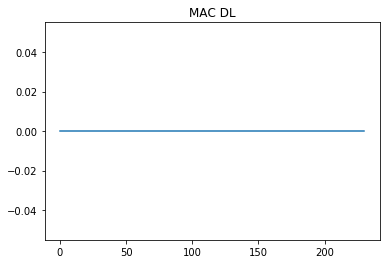

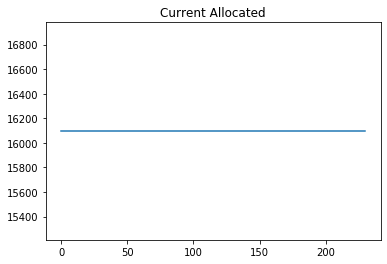

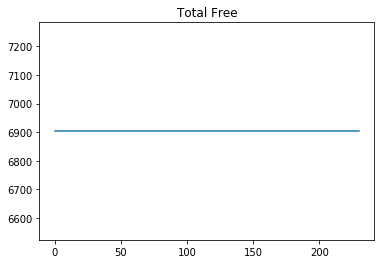

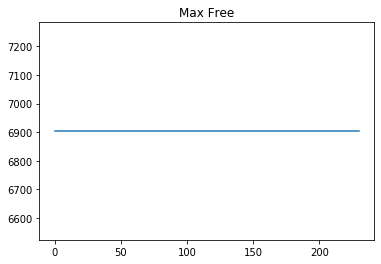

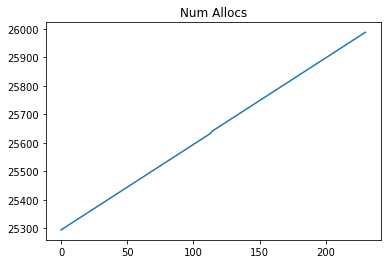

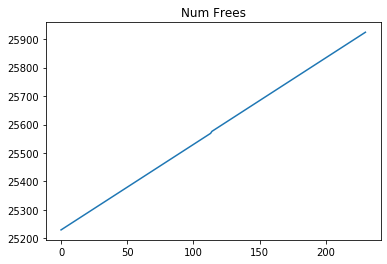

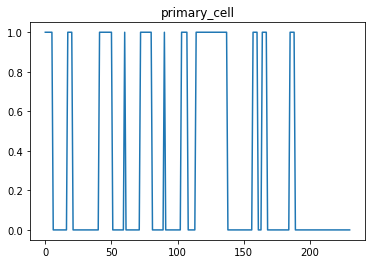

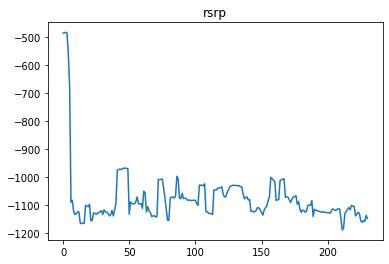

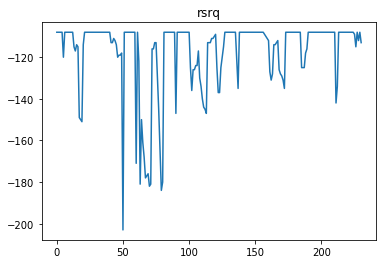

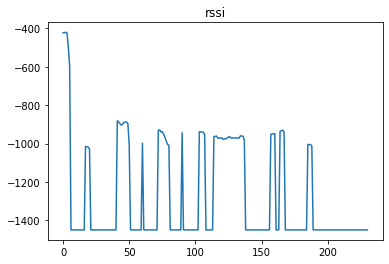

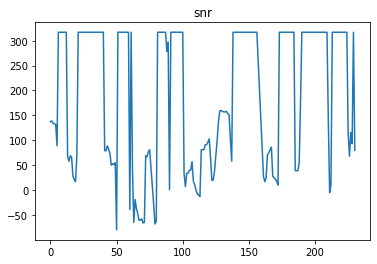

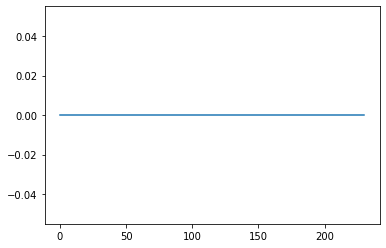

In [710]:
viewDict(data2)

In [ ]:
viewDict2(data1, data2)

In [874]:
# csv to {}
def csvToDict(file):
    dt = {}
    data = []
    header = []
    ready = False
    
    # test file encoding
    enc = 'utf-16-le'
    try:
        with open(file, 'r', encoding=enc) as f:
            for l in f:
                pass
            if 'CAPTURE' not in f.readlines()[:20]:
                enc = None
    except UnicodeDecodeError as e:
        print(UnicodeDecodeError)
        enc = None
    
    
    with open(file, 'r', encoding=enc) as f:
        for line in f:
            if 'CAPTURE START' in line:
                ready = True
            if ',' in line and ready:
                if 'index' in line:
                    header = np.array([v for v in line.strip().split(",")[:-1]])
                    print(header)
                else:
                    data.append([float(v) for v in line.strip().split(",")[:-1]])
    rows = len(data)
    cols = len(header)
    
    # populate empty values with zeroes.
    nump = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            try:
                nump[i][j] = data[i][j]
            except IndexError:
                pass
            
    # print(nump.shape)
    # print(nump.T)
    for n, d in zip(header, nump.T):
        dt[n] = d
    return dt

# post processing csv {} data
def dataProcess(dt):
    dt['time'] = [0]
    for k in dt:
        for i, v in enumerate(dt[k]):
            if k == 'ECL':
                if v > 2:
                    dt[k][i] = -1
            if k == 'idleTime':
                if i > 0:
                    dt['time'].append(v + dt['txTime'][i-1] + dt['time'][i-1])
            else:
                break
    return dt

In [824]:
# data = csvToDict('logs/4secPtau')
data1 = dataProcess(csvToDict('logs/output.txt'))
data2 = dataProcess(csvToDict('logs/output_noantenna.txt')

['index' 'idleTime' 'txTime' 'totalTime' 'energy' 'maxCurrent' 'Signal power' 'Total power' 'TX power' 'TX time' 'RX time'
 'Cell ID' 'ECL' 'SNR' 'EARFCN' 'PCI' 'RSRQ' 'RLC UL BLER' 'RLC DL BLER' 'MAC UL BLER' 'MAC DL BLER' 'Total TX bytes'
 'Total RX bytes' 'Total TX blocks' 'Total RX blocks' 'Total RTX blocks' 'Total ACK/NACK RX' 'RLC UL' 'RLC DL' 'MAC UL' 'MAC DL'
 'Current Allocated' 'Total Free' 'Max Free' 'Num Allocs' 'Num Frees' 'primary_cell' 'rsrp' 'rsrq' 'rssi' 'snr']
['index' 'idleTime' 'txTime' 'totalTime' 'energy' 'maxCurrent' 'Signal power' 'Total power' 'TX power' 'TX time' 'RX time'
 'Cell ID' 'ECL' 'SNR' 'EARFCN' 'PCI' 'RSRQ' 'RLC UL BLER' 'RLC DL BLER' 'MAC UL BLER' 'MAC DL BLER' 'Total TX bytes'
 'Total RX bytes' 'Total TX blocks' 'Total RX blocks' 'Total RTX blocks' 'Total ACK/NACK RX' 'RLC UL' 'RLC DL' 'MAC UL' 'MAC DL'
 'Current Allocated' 'Total Free' 'Max Free' 'Num Allocs' 'Num Frees' 'primary_cell' 'rsrp' 'rsrq' 'rssi' 'snr']


In [877]:
def datasetPlot(dt, length=1000):
    h = len(dt[0])/2 + 1
    rainbow = ['g-', 'r-', 'b-', 'y-', 'k', 'm', 'c']
    plt.figure(figsize=(h,h))
    i = 1
    for k in dt[0]:
        
        # check for data changes
        if len(dt) > 1:
            diff = np.mean(dt[0][k])
            for d in dt:
                if np.mean(d[k]) != diff:
                    break
                diff = np.mean(d[k])
            else:
                continue
        
        plt.subplot(h,2,i)
        plt.title(k)  
        for j, d in enumerate(dt):
            l = min(len(d[k]), length)
            t = np.arange(0, l, 1)
            plt.plot(d['time'][:l], d[k][:l], rainbow[j])
        i += 1
    plt.show()

Antenna and no antenna test in medialab

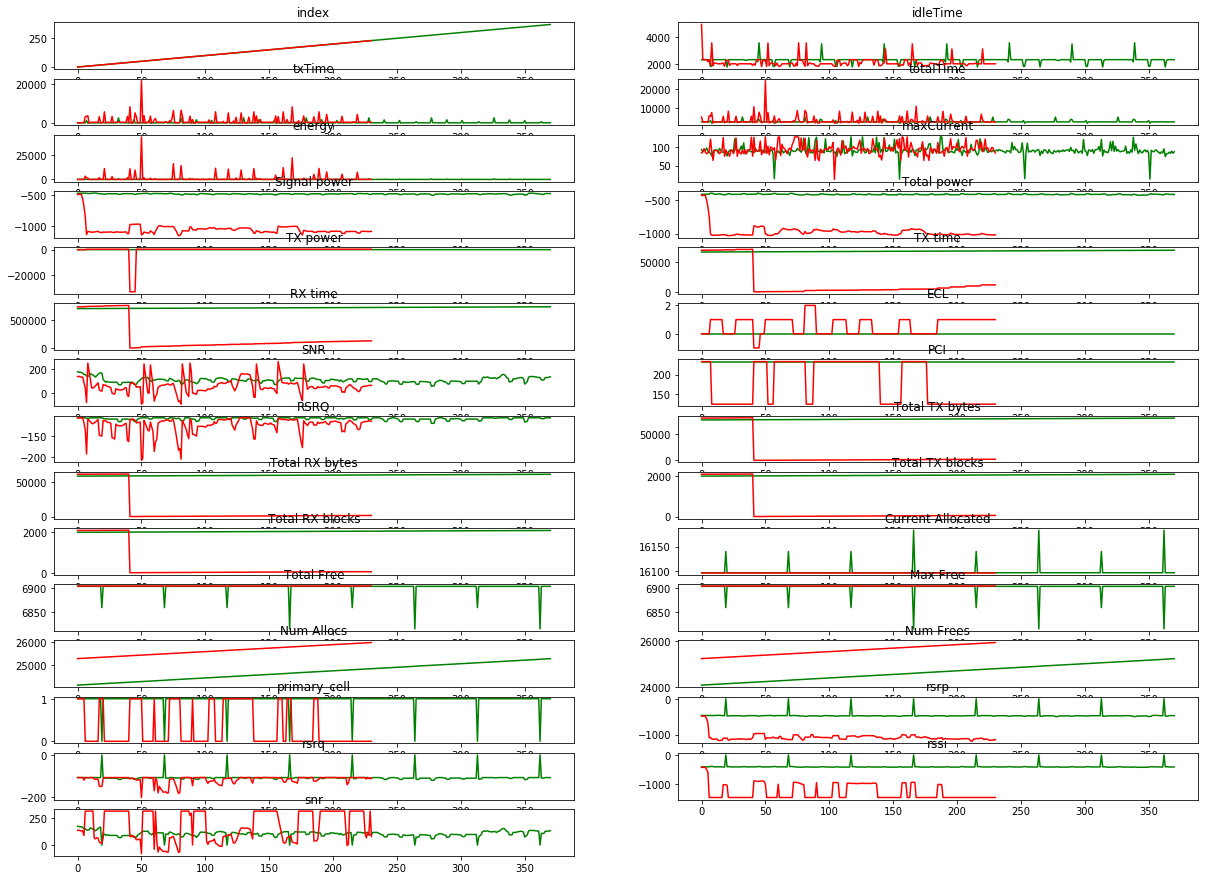

In [825]:
dt = []
dt.append(data1)
dt.append(data2)
datasetPlot(dt)

# UE/NW behavior

In [876]:
data = [dataProcess(csvToDict('logs/2.2621.10.20'))]
# data[0]['time']

['index' 'idleTime' 'txTime' 'totalTime' 'energy' 'maxCurrent' 'Signal power' 'Total power' 'TX power' 'TX time' 'RX time'
 'Cell ID' 'ECL' 'SNR' 'EARFCN' 'PCI' 'RSRQ']


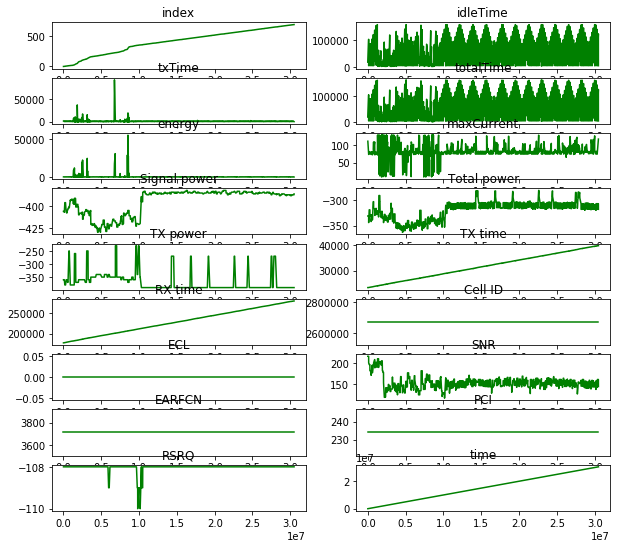

In [883]:
datasetPlot(data, 700)

# energy
## ptau
## drx
## 

In [30]:
1+6

7

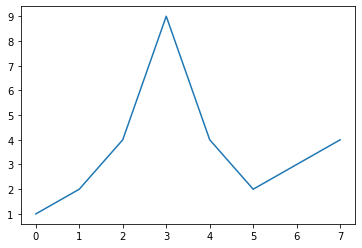

In [32]:
plt.plot([1,2,4,9,4,2,3,4])